<a href="https://colab.research.google.com/github/TriannaHappy/WeatherForecastwithLSTM/blob/main/Meteorological_Station_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.linear_model import LinearRegression

# Data Loading

## BMKG

There are 4 existing stations near Garut regency :
- Stasiun Geofisika Ckajang
- Stasiun Meteorologi Kertajati
- Pos Meteorologi Penggung
- Stasiun Meteorologi Tunggul Wulung

In [ ]:
# list all files
path='D:/dayatani/data/bmkg data/'
data_excel=glob.glob(path+'/*.xlsx')
data_excel

['D:/dayatani/data/bmkg data\\Pos Meteorologi Penggung 2000-2024.xlsx',
 'D:/dayatani/data/bmkg data\\Stasiun Geofisika Bandung 2000-2024.xlsx',
 'D:/dayatani/data/bmkg data\\Stasiun Meteorologi Kertajati 2000-2024.xlsx',
 'D:/dayatani/data/bmkg data\\Stasiun Meteorologi Tunggul Wulung 2000-2024.xlsx']

### Check 1 sample of data

Check one of the weather station.

In [ ]:
tmp_bmkg=pd.read_excel(data_excel[0])
tmp_bmkg

Unnamed: 0        ID WMO  \
0                                               NaN  Nama Stasiun   
1                                               NaN       Lintang   
2                                               NaN         Bujur   
3                                               NaN       Elevasi   
4                                               NaN           NaN   
...                                             ...           ...   
2728          ss: Lamanya penyinaran matahari (jam)           NaN   
2729           ff_x: Kecepatan angin maksimum (m/s)           NaN   
2730  ddd_x: Arah angin saat kecepatan maksimum (°)           NaN   
2731        ff_avg: Kecepatan angin rata-rata (m/s)           NaN   
2732              ddd_car: Arah angin terbanyak (°)           NaN   

                         :  96793 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0     :  Pos Meteorologi Penggung        NaN        NaN        NaN        NaN   
1                     :  -6.75530        NaN        NaN        NaN        NaN   
2                    :  108.53904        NaN        NaN        NaN        NaN   
3                           :  23        NaN        NaN        NaN        NaN   
4                             NaN        NaN        NaN        NaN        NaN   
...                           ...        ...        ...        ...        ...   
2728                          NaN        NaN        NaN        NaN        NaN   
2729                          NaN        NaN        NaN        NaN        NaN   
2730                          NaN        NaN        NaN        NaN        NaN   
2731                          NaN        NaN        NaN        NaN        NaN   
2732                          NaN        NaN        NaN        NaN        NaN   

     Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  
0           NaN        NaN        NaN         NaN  
1           NaN        NaN        NaN         NaN  
2           NaN        NaN        NaN         NaN  
3           NaN        NaN        NaN         NaN  
4           NaN        NaN        NaN         NaN  
...         ...        ...        ...         ...  
2728        NaN        NaN        NaN         NaN  
2729        NaN        NaN        NaN         NaN  
2730        NaN        NaN        NaN         NaN  
2731        NaN        NaN        NaN         NaN  
2732        NaN        NaN        NaN         NaN  

[2733 rows x 11 columns]

In [ ]:
sta_name=tmp_bmkg.iloc[0,2][3:]
lat=float(tmp_bmkg.iloc[1,2][3:])
lon=float(tmp_bmkg.iloc[2,2][3:])
elev=float(tmp_bmkg.iloc[3,2][3:])

sta_name, lat, lon, elev

('Pos Meteorologi Penggung', -6.7553, 108.53904, 23.0)

In [ ]:
tmp_met=tmp_bmkg.iloc[8:-16,:]
tmp_met.columns=tmp_bmkg.iloc[7]
tmp_met.reset_index(drop=True, inplace=True)

tmp_met

7        Tanggal    Tn    Tx  Tavg RH_avg    RR   ss ff_x ddd_x ff_avg ddd_car
0     01-09-2016    25   NaN  28.3     83    18  NaN    9    80      5      E 
1     02-09-2016    25   NaN  28.9     81     0  NaN    7   120      4      NE
2     03-09-2016    25   NaN  28.1     81     0  NaN    8    60      4      E 
3     04-09-2016    25   NaN  28.1     84   NaN  NaN    8    80      4      E 
4     05-09-2016    25   NaN  28.1     81     0  NaN    6    70      5      E 
...          ...   ...   ...   ...    ...   ...  ...  ...   ...    ...     ...
2704  27-01-2024    24  32.8  29.1     79    39  NaN   10    20      6      NW
2705  28-01-2024    25  31.8  29.1     80   2.3  NaN    6   300      4      W 
2706  29-01-2024    25    31  28.4     82  10.5  NaN    6   300      4      NW
2707  30-01-2024  25.4    33  29.8     75     0  NaN    7   290      3      NW
2708  31-01-2024  25.2  31.8  27.1     85   3.5  NaN    5   300      2      W 

[2709 rows x 11 columns]

In [ ]:
# description for each column name
tmp_bmkg.iloc[-13:,0]

2720                                         Keterangan :
2721                             8888: data tidak terukur
2722    9999: Tidak Ada Data (tidak dilakukan pengukuran)
2723                        Tn: Temperatur minimum\t (°C)
2724                         Tx: Temperatur maksimum (°C)
2725                      Tavg: Temperatur rata-rata (°C)
2726                     RH_avg: Kelembapan rata-rata (%)
2727                                 RR: Curah hujan (mm)
2728                ss: Lamanya penyinaran matahari (jam)
2729                 ff_x: Kecepatan angin maksimum (m/s)
2730        ddd_x: Arah angin saat kecepatan maksimum (°)
2731              ff_avg: Kecepatan angin rata-rata (m/s)
2732                    ddd_car: Arah angin terbanyak (°)
Name: Unnamed: 0, dtype: object

In [ ]:
tmp_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  2709 non-null   object
 1   Tn       2516 non-null   object
 2   Tx       2400 non-null   object
 3   Tavg     2549 non-null   object
 4   RH_avg   2549 non-null   object
 5   RR       2194 non-null   object
 6   ss       0 non-null      object
 7   ff_x     2654 non-null   object
 8   ddd_x    2654 non-null   object
 9   ff_avg   2654 non-null   object
 10  ddd_car  2655 non-null   object
dtypes: object(11)
memory usage: 232.9+ KB


`ddd_car` column should be the one and only column with dtype object, and `Tanggal` should in datetime dtype while the rest column should be float.

In [ ]:
for column in tmp_met.columns[1:-1]:
    tmp_met[column]=pd.to_numeric(tmp_met[column])
    tmp_met[column].replace(8888, np.nan, inplace=True)
    tmp_met[column].replace(9999, np.nan, inplace=True)

tmp_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  2709 non-null   object 
 1   Tn       2516 non-null   float64
 2   Tx       2400 non-null   float64
 3   Tavg     2549 non-null   float64
 4   RH_avg   2549 non-null   float64
 5   RR       2079 non-null   float64
 6   ss       0 non-null      float64
 7   ff_x     2654 non-null   float64
 8   ddd_x    2654 non-null   float64
 9   ff_avg   2654 non-null   float64
 10  ddd_car  2655 non-null   object 
dtypes: float64(9), object(2)
memory usage: 232.9+ KB


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2889000700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_met[column]=pd.to_numeric(tmp_met[column])
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2889000700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmp_met[column].r

In [ ]:
tmp_met.describe()

7               Tn           Tx         Tavg       RH_avg           RR   ss  \
count  2516.000000  2400.000000  2549.000000  2549.000000  2079.000000  0.0   
mean     24.392369    33.234458    28.098902    78.114947     8.865127  NaN   
std       1.132037     1.673836     1.338656     9.735500    18.636461  NaN   
min      19.000000    25.400000    24.300000    43.000000     0.000000  NaN   
25%      23.800000    32.400000    27.200000    72.000000     0.000000  NaN   
50%      24.200000    33.200000    28.000000    80.000000     0.500000  NaN   
75%      25.000000    34.200000    28.800000    86.000000     8.750000  NaN   
max      28.000000    38.600000    33.000000    97.000000   158.000000  NaN   

7             ff_x        ddd_x       ff_avg  
count  2654.000000  2654.000000  2654.000000  
mean      5.953278   142.511680     3.169932  
std       2.210570    95.800921     1.406511  
min       0.000000     0.000000     0.000000  
25%       5.000000    60.000000     2.000000  
50%       6.000000   110.000000     3.000000  
75%       7.000000   200.000000     4.000000  
max      38.000000   360.000000    12.000000

In [ ]:
tmp_met.isnull().mean()*100

7
Tanggal      0.000000
Tn           7.124400
Tx          11.406423
Tavg         5.906238
RH_avg       5.906238
RR          23.255814
ss         100.000000
ff_x         2.030269
ddd_x        2.030269
ff_avg       2.030269
ddd_car      1.993355
dtype: float64

### Check for all stations

In [ ]:
# Function which returns last word
def firstWord(string):

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[0]

In [ ]:
# Function which returns last word
def lastWord(string):

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[length-1]

In [ ]:
sta=[]
lat=[]
lon=[]
elev=[]

for excel in data_excel:
    tmp=pd.read_excel(excel)

    sta_name=lastWord(tmp.iloc[0,2][3:])
    sta.append(tmp.iloc[0,2][3:])
    lat.append(float(tmp.iloc[1,2][3:]))
    lon.append(float(tmp.iloc[2,2][3:]))
    elev.append(float(tmp.iloc[3,2][3:]))

    print(sta_name+'_met')

    globals()[sta_name+'_met']=tmp.iloc[8:-16,:]
    globals()[sta_name+'_met'].columns=tmp.iloc[7]
    globals()[sta_name+'_met'].reset_index(drop=True, inplace=True)

    globals()[sta_name+'_met']['Tanggal']=pd.to_datetime(globals()[sta_name+'_met']['Tanggal'], format='%d-%m-%Y')
    for column in globals()[sta_name+'_met'].columns[1:-1]:
        globals()[sta_name+'_met'][column]=pd.to_numeric(globals()[sta_name+'_met'][column])
        globals()[sta_name+'_met'][column].replace(8888, np.nan, inplace=True)
        globals()[sta_name+'_met'][column].replace(9999, np.nan, inplace=True)

Wulung_met=Wulung_met.loc[Wulung_met['Tanggal'].between('01-01-2000','31-01-2024')]

Penggung_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met']['Tanggal']=pd.to_datetime(globals()[sta_name+'_met']['Tanggal'], format='%d-%m-%Y')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met'][column]=pd.to_numeric(globals()[sta_name+'_met'][column])
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:24: FutureWarning: A value 

Bandung_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met']['Tanggal']=pd.to_datetime(globals()[sta_name+'_met']['Tanggal'], format='%d-%m-%Y')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met'][column]=pd.to_numeric(globals()[sta_name+'_met'][column])
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:24: FutureWarning: A value 

Kertajati_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met']['Tanggal']=pd.to_datetime(globals()[sta_name+'_met']['Tanggal'], format='%d-%m-%Y')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met'][column]=pd.to_numeric(globals()[sta_name+'_met'][column])
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:24: FutureWarning: A value 

Wulung_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met']['Tanggal']=pd.to_datetime(globals()[sta_name+'_met']['Tanggal'], format='%d-%m-%Y')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[sta_name+'_met'][column]=pd.to_numeric(globals()[sta_name+'_met'][column])
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4015183715.py:24: FutureWarning: A value 

In [ ]:
meta_data=pd.DataFrame({'Station':sta, 'Latitude':lat, 'Longitude':lon, 'Elevation':elev})
meta_data

Station  Latitude  Longitude  Elevation
0            Pos Meteorologi Penggung  -6.75530  108.53904       23.0
1           Stasiun Geofisika Bandung  -6.88356  107.59733      791.0
2       Stasiun Meteorologi Kertajati  -6.73440  108.26300       85.0
3  Stasiun Meteorologi Tunggul Wulung  -7.71890  109.01490        8.0

## IOT

Get the coordinates of IOT stations data.

In [ ]:
# get path of IOT data
path_IOT='D:/dayatani/data/iot_data/fix'

# get coordinates and elevation of IOT devices
coor_IOT=pd.read_excel(path_IOT+'/koor/koordinat_farm.xlsx')
coor_IOT

Station  Latitude   Longitude  Elevation
0  Sirnajaya #1 - Device 15 -7.286354  107.787659     1206.0
1   Cikajang #1 - Device 19 -7.376867  107.844459     1374.8
2      Tasik #1 - Device 21 -7.000000  108.000000      652.0

`IMPORTANT NOTE:` The GPS devices have an error margin of approximately 10 meters for coordinates and 50 meters for elevation

There are 5 existing stations from our IOT team's devices :
- Sirnajaya #1 - Device 15
- Cikajang #1 - Device 19
- Tasik #1 - Device 21
- Chili farm E
- Chili farm N

Unfortunately, our devices in chili farm E and N don't have GPS on them. But it's located near Dayatani Basecamp in Garut (approximately, latitude=~ 107.78394236931925, longitude=~-7.285305801049848) and near Sirnajaya station.

In [ ]:
# List all the IOT files
listfile_IOT=glob.glob(path_IOT+'/*.xlsx')
listfile_IOT

['D:/dayatani/data/iot_data/fix\\Chilly_Farm_E .xlsx',
 'D:/dayatani/data/iot_data/fix\\Chilly_Farm_N .xlsx',
 'D:/dayatani/data/iot_data/fix\\Cikajang #1 - Device 19.xlsx',
 'D:/dayatani/data/iot_data/fix\\Sirnajaya #1 - Device 15.xlsx',
 'D:/dayatani/data/iot_data/fix\\Tasik #1 - Device 21.xlsx']

### Check 1 sampel of data

- Air pressure are measured in hPa
- Temperature are measured in Celcius degree
- rainfall are measured in mm

In [ ]:
tmp_iot=pd.read_excel(listfile_IOT[0])
tmp_iot

Timestamp  Air Pressure  Battery %  Humidity  Leaf Moisture %  \
0    2023-11-16 09:41:54        886.90        280        45              -89   
1    2023-11-16 16:19:40        883.91        382        80              -88   
2    2023-11-16 16:24:43        884.01        380        80              -90   
3    2023-11-16 16:34:43        884.11        379        82              -90   
4    2023-11-16 16:44:43        884.18        378        83              -89   
...                  ...           ...        ...       ...              ...   
2820 2023-12-13 15:30:49        881.33        337        56              -95   
2821 2023-12-13 15:40:55        881.36        337        59              -96   
2822 2023-12-13 15:51:01        881.39        337        53              -96   
2823 2023-12-13 16:00:11        881.30        335        59              -96   
2824 2023-12-13 16:10:17        881.31        334        61              -95   

      Rain Fall ml  Rain Fall Counter  Read ID  Soil Moisture %  Temperature  \
0              0.0                  0        0              216        33.28   
1              0.0                  0        0              215        23.34   
2              0.0                  0        1              216        23.52   
3              0.0                  0        2              216        23.00   
4              0.0                  0        3              216        22.83   
...            ...                ...      ...              ...          ...   
2820           0.0                  0      326              217        27.94   
2821           0.0                  0      327              217        28.48   
2822           0.0                  0      328              217        29.54   
2823           0.0                  0      329              217        27.78   
2824           0.0                  0      330              217        27.11   

      Unnamed: 10  Unnamed: 11  
0             NaN    23.413703  
1             NaN          NaN  
2             NaN          NaN  
3             NaN          NaN  
4             NaN          NaN  
...           ...          ...  
2820          NaN          NaN  
2821          NaN          NaN  
2822          NaN          NaN  
2823          NaN          NaN  
2824          NaN          NaN  

[2825 rows x 12 columns]

there is no relative humidity. To calculate relative humidity, we need measurement of actual vapor pressure and saturation vapor pressure. To calculate these, we need measurement of dew point temperature, but we don't have it, so we will go with temperature and rainfall only.<br>
https://www.rhs.com/wp-content/uploads/2021/03/RH_WMO.pdf<br>
https://study.com/academy/lesson/what-is-relative-humidity-definition-equation-calculation.html#:~:text=Find%20the%20relative%20humidity%20using,%2F%20(saturation%20point)%20x%20100

Check the information, describe of data, and missing data.

In [ ]:
tmp_iot_met=tmp_iot[['Timestamp', 'Air Pressure', 'Rain Fall ml', 'Temperature']]
tmp_iot_met

Timestamp  Air Pressure  Rain Fall ml  Temperature
0    2023-11-16 09:41:54        886.90           0.0        33.28
1    2023-11-16 16:19:40        883.91           0.0        23.34
2    2023-11-16 16:24:43        884.01           0.0        23.52
3    2023-11-16 16:34:43        884.11           0.0        23.00
4    2023-11-16 16:44:43        884.18           0.0        22.83
...                  ...           ...           ...          ...
2820 2023-12-13 15:30:49        881.33           0.0        27.94
2821 2023-12-13 15:40:55        881.36           0.0        28.48
2822 2023-12-13 15:51:01        881.39           0.0        29.54
2823 2023-12-13 16:00:11        881.30           0.0        27.78
2824 2023-12-13 16:10:17        881.31           0.0        27.11

[2825 rows x 4 columns]

In [ ]:
tmp_iot_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     2825 non-null   datetime64[ns]
 1   Air Pressure  2823 non-null   float64       
 2   Rain Fall ml  2825 non-null   float64       
 3   Temperature   2825 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 88.4 KB


In [ ]:
tmp_iot_met.describe()

Timestamp  Air Pressure  Rain Fall ml  Temperature
count                           2825   2823.000000   2825.000000  2825.000000
mean   2023-11-30 17:44:04.424070912    883.612795      0.001487    23.413703
min              2023-11-16 09:41:54    880.490000      0.000000    12.520000
25%              2023-11-21 23:30:54    882.675000      0.000000    18.710000
50%              2023-12-02 16:41:23    883.620000      0.000000    21.010000
75%              2023-12-07 14:12:07    884.600000      0.000000    29.510000
max              2023-12-13 16:10:17    886.900000      0.900000    36.050000
std                              NaN      1.301551      0.031900     6.112885

In [ ]:
tmp_iot_met.isnull().mean()*100

Timestamp       0.000000
Air Pressure    0.070796
Rain Fall ml    0.000000
Temperature     0.000000
dtype: float64

<Axes: xlabel='Timestamp'>

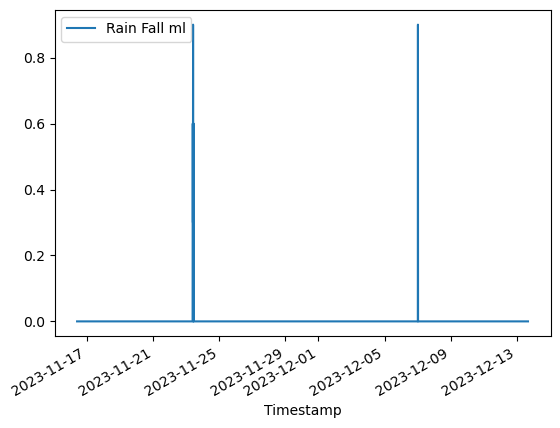

In [ ]:
tmp_iot_met.plot(x='Timestamp', y='Rain Fall ml')

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3046087279.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tmp_iot_met['Rain Fall ml'][tmp_iot_met['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3046087279.p

<Axes: xlabel='Timestamp'>

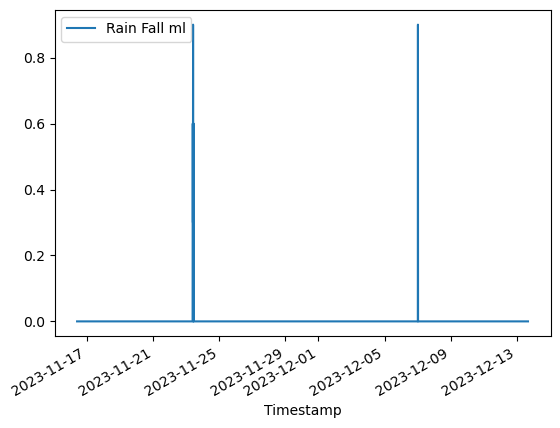

In [ ]:
tmp_iot_met['Rain Fall ml'][tmp_iot_met['Rain Fall ml']>250]=np.nan
tmp_iot_met.plot(x='Timestamp', y='Rain Fall ml')

### Check for all stasions

In [ ]:
for excel in listfile_IOT:
    tmp=pd.read_excel(excel)

    sta_name=firstWord(excel[30:-5])
    print(sta_name+'_met')
    globals()[sta_name+'_met']=tmp[['Timestamp', 'Air Pressure', 'Rain Fall ml', 'Temperature', 'Humidity']]
    globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan

Chilly_Farm_E_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3729278579.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Te

Chilly_Farm_N_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3729278579.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Te

Cikajang_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3729278579.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Te

Sirnajaya_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3729278579.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Te

Tasik_met


C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3729278579.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  globals()[sta_name+'_met']['Rain Fall ml'][globals()[sta_name+'_met']['Rain Fall ml']>250]=np.nan
C:\Users\sashu\AppData\Local\Te

# Data Cleaning and Preprocessing

## BMKG

In [ ]:
# description for each column name
tmp_bmkg.iloc[-13:,0]

2720                                         Keterangan :
2721                             8888: data tidak terukur
2722    9999: Tidak Ada Data (tidak dilakukan pengukuran)
2723                        Tn: Temperatur minimum\t (°C)
2724                         Tx: Temperatur maksimum (°C)
2725                      Tavg: Temperatur rata-rata (°C)
2726                     RH_avg: Kelembapan rata-rata (%)
2727                                 RR: Curah hujan (mm)
2728                ss: Lamanya penyinaran matahari (jam)
2729                 ff_x: Kecepatan angin maksimum (m/s)
2730        ddd_x: Arah angin saat kecepatan maksimum (°)
2731              ff_avg: Kecepatan angin rata-rata (m/s)
2732                    ddd_car: Arah angin terbanyak (°)
Name: Unnamed: 0, dtype: object

### Penggung

In [ ]:
Penggung_met.isnull().mean()*100

7
Tanggal      0.000000
Tn           7.124400
Tx          11.406423
Tavg         5.906238
RH_avg       5.906238
RR          23.255814
ss         100.000000
ff_x         2.030269
ddd_x        2.030269
ff_avg       2.030269
ddd_car      1.993355
dtype: float64

- Tavg
- Tn
- Tx
- RH_avg
- RR

In [ ]:
Penggung_met.Tanggal.min(), Penggung_met.Tanggal.max()

(Timestamp('2016-09-01 00:00:00'), Timestamp('2024-01-31 00:00:00'))

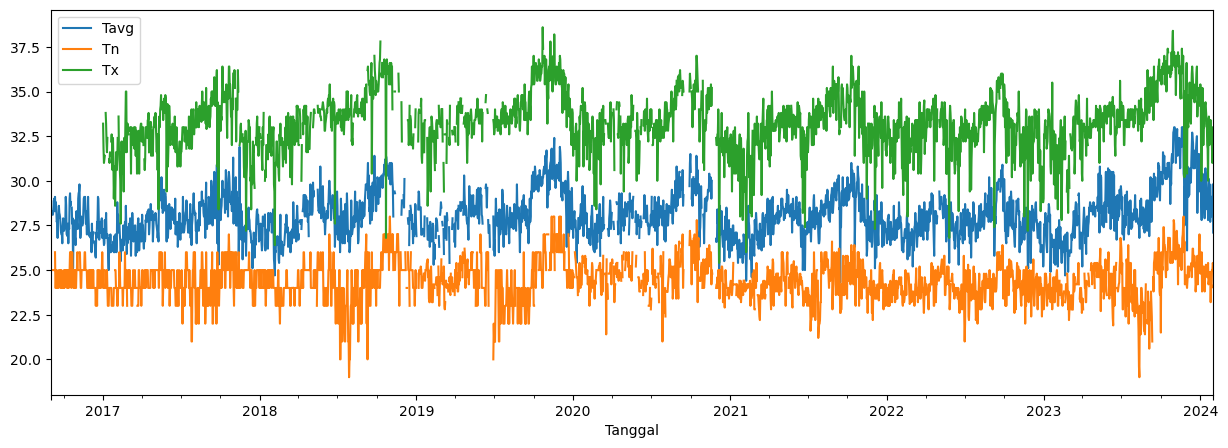

In [ ]:
Penggung_met.set_index('Tanggal')['Tavg'].plot(figsize=(15,5))
Penggung_met.set_index('Tanggal')['Tn'].plot(figsize=(15,5))
Penggung_met.set_index('Tanggal')['Tx'].plot(figsize=(15,5))
plt.legend()

<Axes: xlabel='Tanggal'>

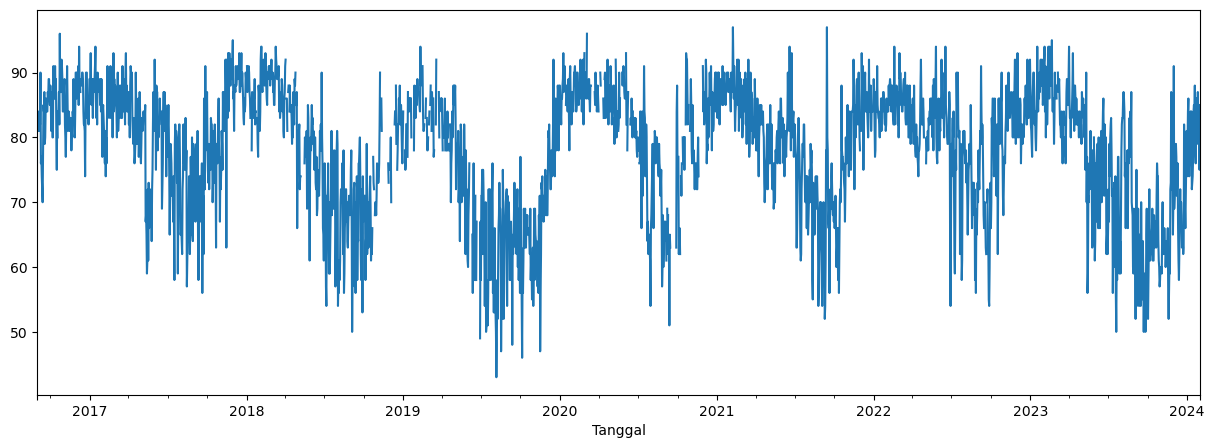

In [ ]:
Penggung_met.set_index('Tanggal')['RH_avg'].plot(figsize=(15,5))

<Axes: xlabel='Tanggal'>

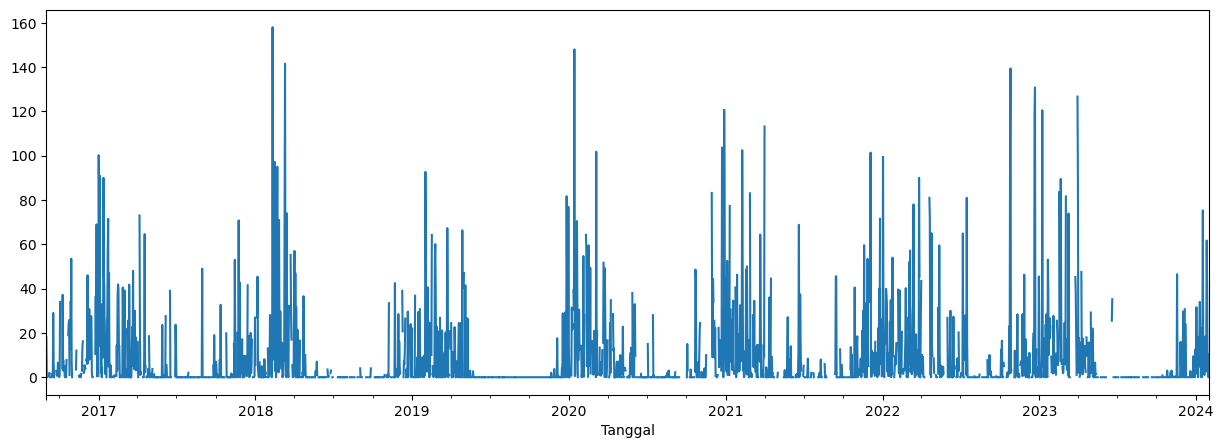

In [ ]:
Penggung_met.set_index('Tanggal')['RR'].plot(figsize=(15,5))

#### Handling Missing value

- Handling missing value in temperature and RH with interpolation. Smoother the graph. Besides, temperature does not change much and affected most by seasonal and trend.
- Handling the rainfall data by replacing it with zero values. Using zero for missing rainfall data is a conservative approach that tends to underestimate rather than overestimate rainfall. This approach minimizes the risk of inflating rainfall estimates, especially in regions where rainfall is sporadic or infrequent.

In [ ]:
Penggung_met_copy=Penggung_met.set_index('Tanggal')

In [ ]:
Penggung_met_copy['Tavg'] = Penggung_met_copy['Tavg'].interpolate(method='time')
Penggung_met_copy['Tx'] = Penggung_met_copy['Tx'].interpolate(method='time')
Penggung_met_copy['Tn'] = Penggung_met_copy['Tn'].interpolate(method='time')
Penggung_met_copy['RH_avg'] = Penggung_met_copy['RH_avg'].interpolate(method='time')
Penggung_met_copy['RR'] = Penggung_met_copy['RR'].fillna(0)
Penggung_met_copy.isnull().mean()*100

7
Tn           0.000000
Tx           4.503507
Tavg         0.000000
RH_avg       0.000000
RR           0.000000
ss         100.000000
ff_x         2.030269
ddd_x        2.030269
ff_avg       2.030269
ddd_car      1.993355
dtype: float64

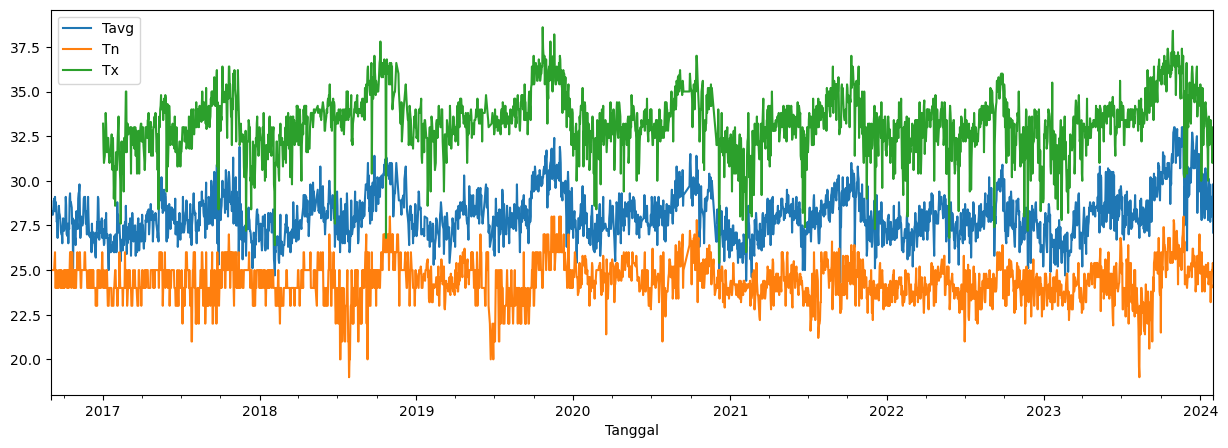

In [ ]:
Penggung_met_copy['Tavg'].plot(figsize=(15,5))
Penggung_met_copy['Tn'].plot(figsize=(15,5))
Penggung_met_copy['Tx'].plot(figsize=(15,5))
plt.legend()

<Axes: xlabel='Tanggal'>

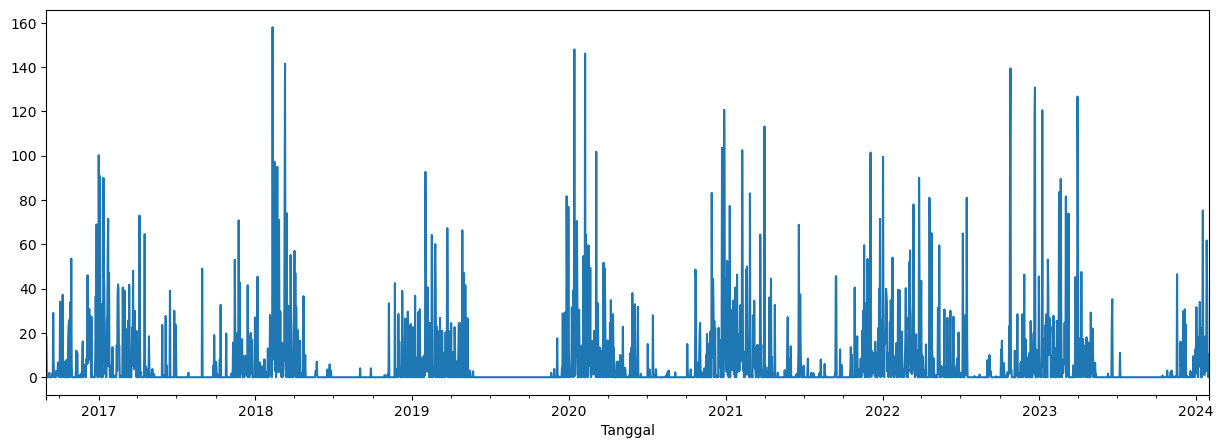

In [ ]:
Penggung_met_copy['RR'].plot(figsize=(15,5))

### Bandung

In [ ]:
Bandung_met.isnull().mean()*100

7
Tanggal     0.000000
Tn          4.387859
Tx          3.751279
Tavg        1.807434
RH_avg      3.455724
RR         14.675458
ss          4.581107
ff_x        1.352734
ddd_x       1.466409
ff_avg      1.318631
ddd_car     3.217006
dtype: float64

- Tavg
- Tn
- Tx
- RH_avg
- RR

<Axes: xlabel='Tanggal'>

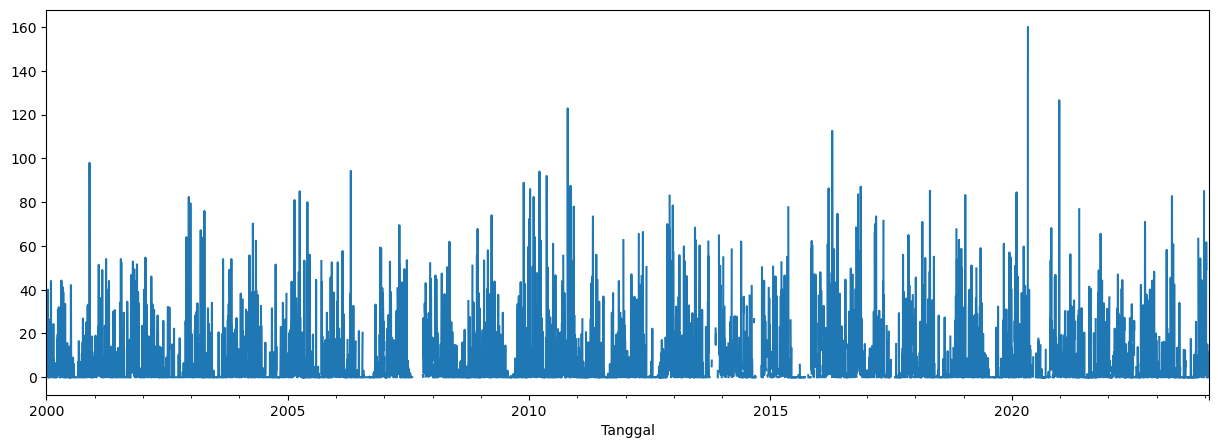

In [ ]:
Bandung_met.set_index('Tanggal')['RR'].plot(figsize=(15,5))

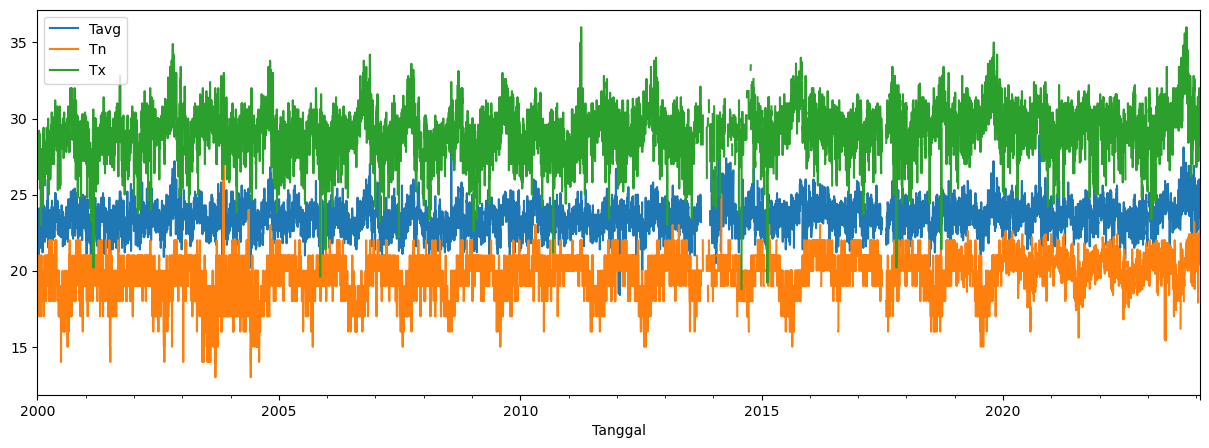

In [ ]:
Bandung_met.set_index('Tanggal')['Tavg'].plot(figsize=(15,5))
Bandung_met.set_index('Tanggal')['Tn'].plot(figsize=(15,5))
Bandung_met.set_index('Tanggal')['Tx'].plot(figsize=(15,5))
plt.legend()

#### Handling Missing Value

In [ ]:
Bandung_met_copy=Bandung_met.set_index('Tanggal')
Bandung_met_copy['Tavg'] = Bandung_met_copy['Tavg'].interpolate(method='time')
Bandung_met_copy['Tx'] = Bandung_met_copy['Tx'].interpolate(method='time')
Bandung_met_copy['Tn'] = Bandung_met_copy['Tn'].interpolate(method='time')
Bandung_met_copy['RH_avg'] = Bandung_met_copy['RH_avg'].interpolate(method='time')
Bandung_met_copy['RR'] = Bandung_met_copy['RR'].fillna(0)
Bandung_met_copy.isnull().mean()*100

7
Tn         0.000000
Tx         0.000000
Tavg       0.000000
RH_avg     0.000000
RR         0.000000
ss         4.581107
ff_x       1.352734
ddd_x      1.466409
ff_avg     1.318631
ddd_car    3.217006
dtype: float64

<Axes: xlabel='Tanggal'>

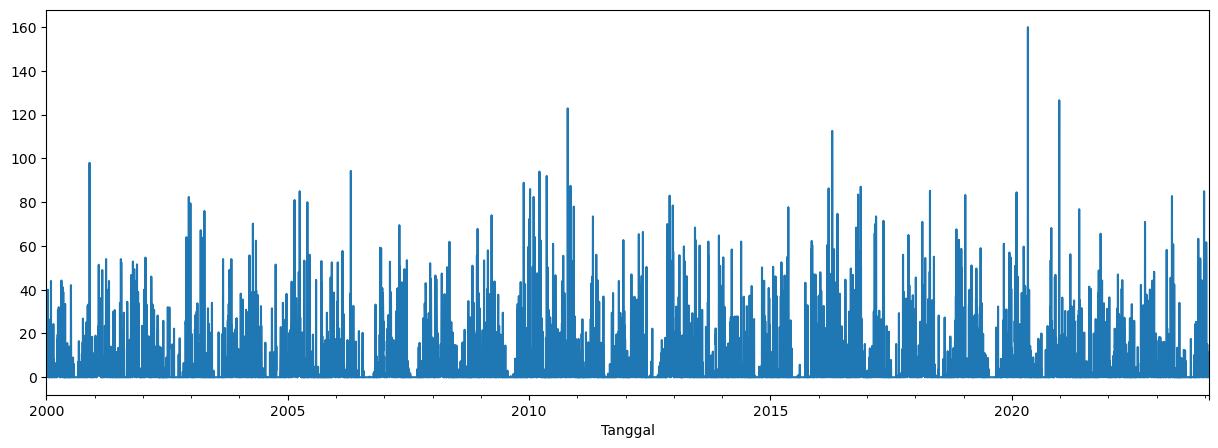

In [ ]:
Bandung_met_copy['RR'].plot(figsize=(15,5))

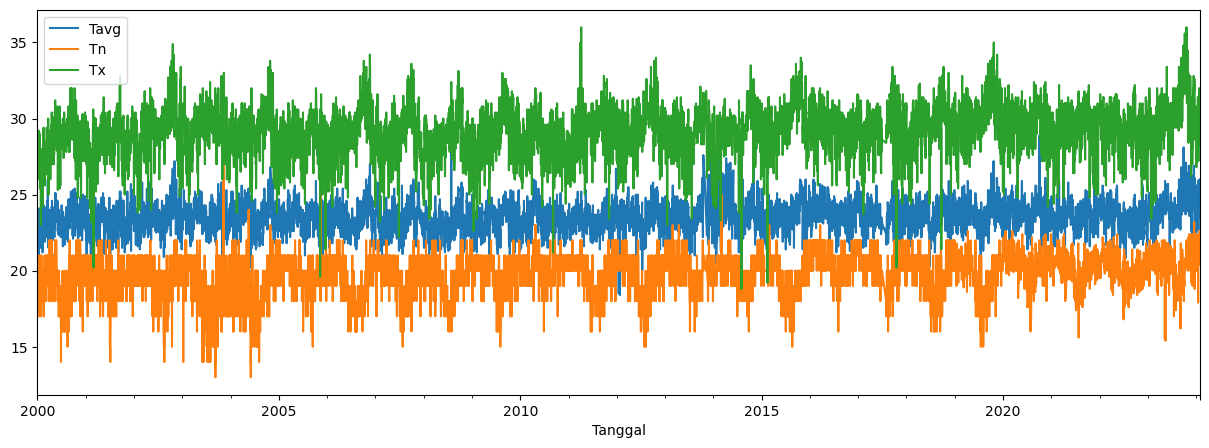

In [ ]:
Bandung_met_copy['Tavg'].plot(figsize=(15,5))
Bandung_met_copy['Tn'].plot(figsize=(15,5))
Bandung_met_copy['Tx'].plot(figsize=(15,5))
plt.legend()

#### Handling Outlier

In [ ]:
Bandung_met_copy[Bandung_met_copy['RH_avg']<60]['RH_avg']=np.nan
Bandung_met_copy['RH_avg'] = Bandung_met_copy['RH_avg'].where(Bandung_met_copy['RH_avg'] >= 60, np.nan)
Bandung_met_copy['RH_avg'] = Bandung_met_copy['RH_avg'].interpolate(method='time')
Bandung_met_copy.isnull().mean()*100

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\601755255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bandung_met_copy[Bandung_met_copy['RH_avg']<60]['RH_avg']=np.nan


7
Tn         0.000000
Tx         0.000000
Tavg       0.000000
RH_avg     0.000000
RR         0.000000
ss         4.581107
ff_x       1.352734
ddd_x      1.466409
ff_avg     1.318631
ddd_car    3.217006
dtype: float64

<Axes: xlabel='Tanggal'>

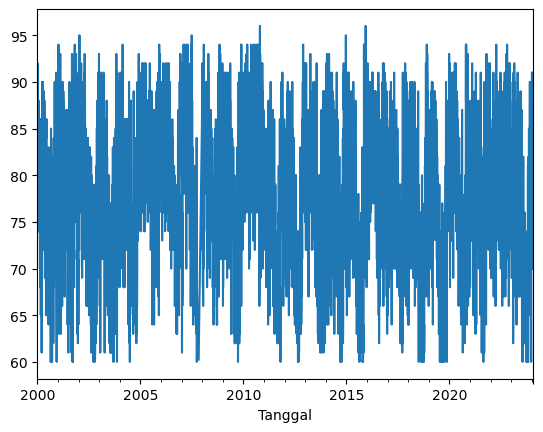

In [ ]:
Bandung_met_copy['RH_avg'].plot()

### Kertajati

In [ ]:
Kertajati_met.isnull().mean()*100

7
Tanggal     0.000000
Tn          4.944868
Tx          7.695805
Tavg        1.489144
RH_avg      4.967603
RR          6.013414
ss         26.463567
ff_x        7.877686
ddd_x       7.900421
ff_avg      7.786745
ddd_car     7.889053
dtype: float64

- Tavg
- Tn
- Tx
- RH_avg
- RR

<Axes: xlabel='Tanggal'>

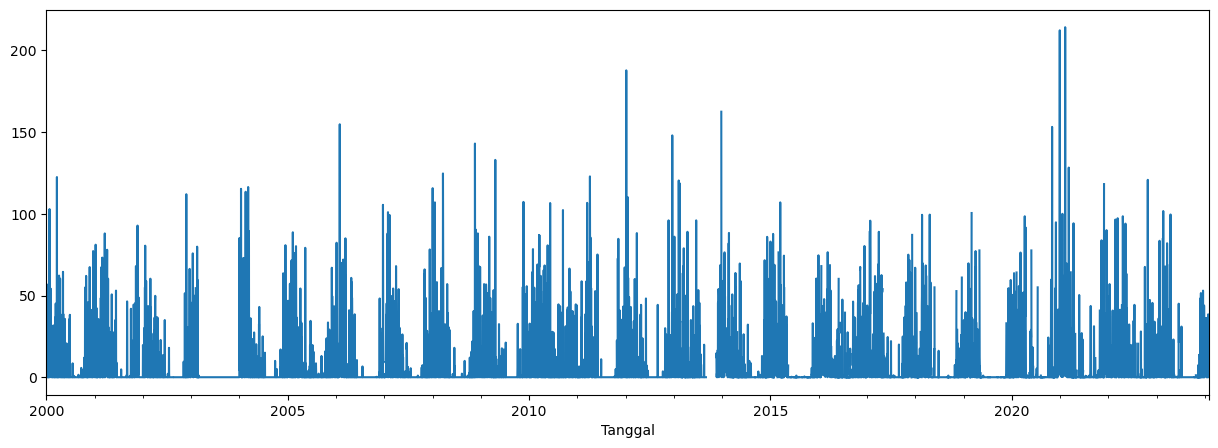

In [ ]:
Kertajati_met.set_index('Tanggal')['RR'].plot(figsize=(15,5))

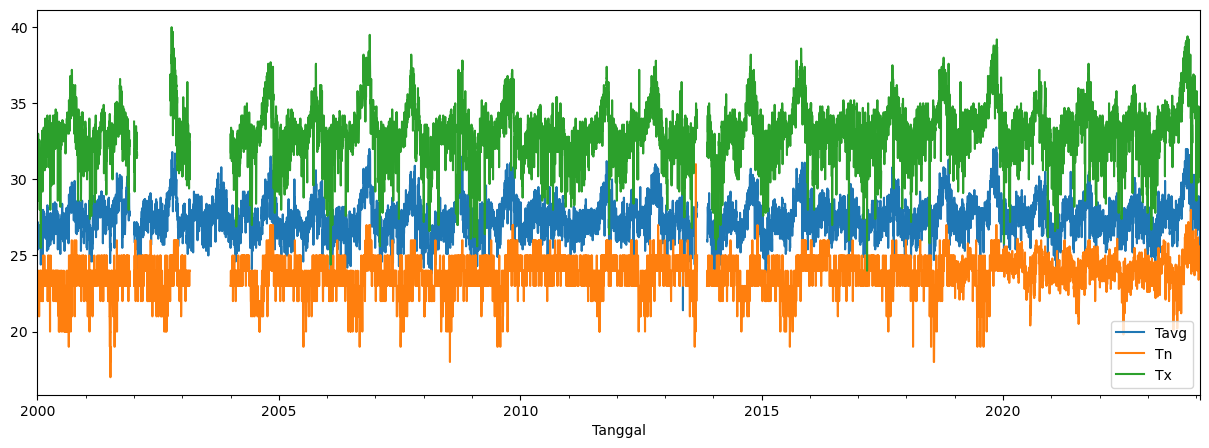

In [ ]:
Kertajati_met.set_index('Tanggal')['Tavg'].plot(figsize=(15,5))
Kertajati_met.set_index('Tanggal')['Tn'].plot(figsize=(15,5))
Kertajati_met.set_index('Tanggal')['Tx'].plot(figsize=(15,5))
plt.legend()

#### Handling Missing Value

First, select the data from the most recent year without extensive missing data.

7
Tn          0.624491
Tx          0.434428
Tavg        0.407277
RH_avg      0.407277
RR         11.729568
ss          0.705946
ff_x        0.380125
ddd_x       0.380125
ff_avg      0.380125
ddd_car     0.380125
dtype: float64

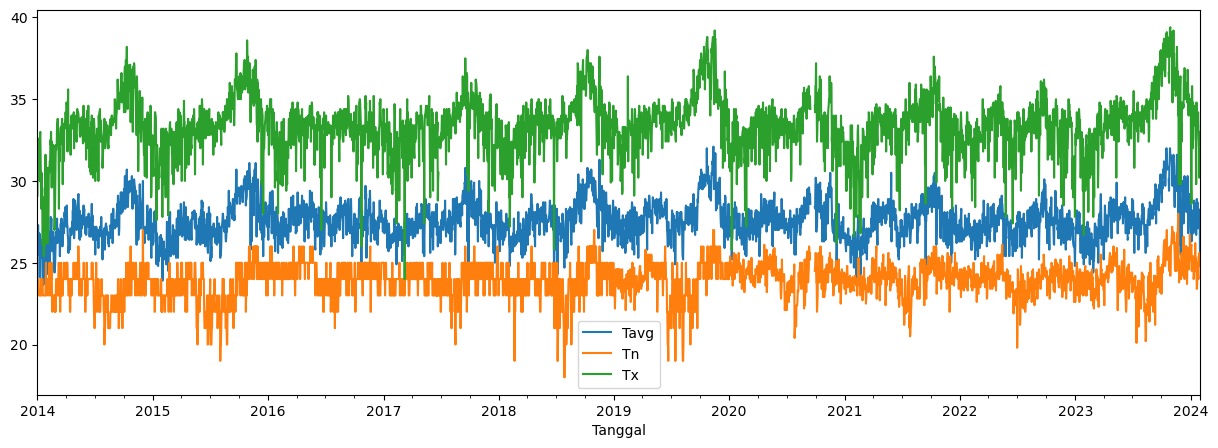

In [ ]:
Kertajati_met_copy=Kertajati_met.loc[Kertajati_met['Tanggal'].between('01-01-2014','31-01-2024')]
Kertajati_met_copy.set_index('Tanggal', inplace=True)

# check the copy data
Kertajati_met_copy['Tavg'].plot(figsize=(15,5))
Kertajati_met_copy['Tn'].plot(figsize=(15,5))
Kertajati_met_copy['Tx'].plot(figsize=(15,5))
plt.legend()
Kertajati_met_copy.isnull().mean()*100

In [ ]:
Kertajati_met_copy['Tavg'] = Kertajati_met_copy['Tavg'].interpolate(method='time')
Kertajati_met_copy['Tx'] = Kertajati_met_copy['Tx'].interpolate(method='time')
Kertajati_met_copy['Tn'] = Kertajati_met_copy['Tn'].interpolate(method='time')
Kertajati_met_copy['RH_avg'] = Kertajati_met_copy['RH_avg'].interpolate(method='time')
Kertajati_met_copy['RR'] = Kertajati_met_copy['RR'].fillna(0)
Kertajati_met_copy.isnull().mean()*100

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3424060258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kertajati_met_copy['Tavg'] = Kertajati_met_copy['Tavg'].interpolate(method='time')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3424060258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kertajati_met_copy['Tx'] = Kertajati_met_copy['Tx'].interpolate(method='time')
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3424060258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

7
Tn         0.000000
Tx         0.000000
Tavg       0.000000
RH_avg     0.000000
RR         0.000000
ss         0.705946
ff_x       0.380125
ddd_x      0.380125
ff_avg     0.380125
ddd_car    0.380125
dtype: float64

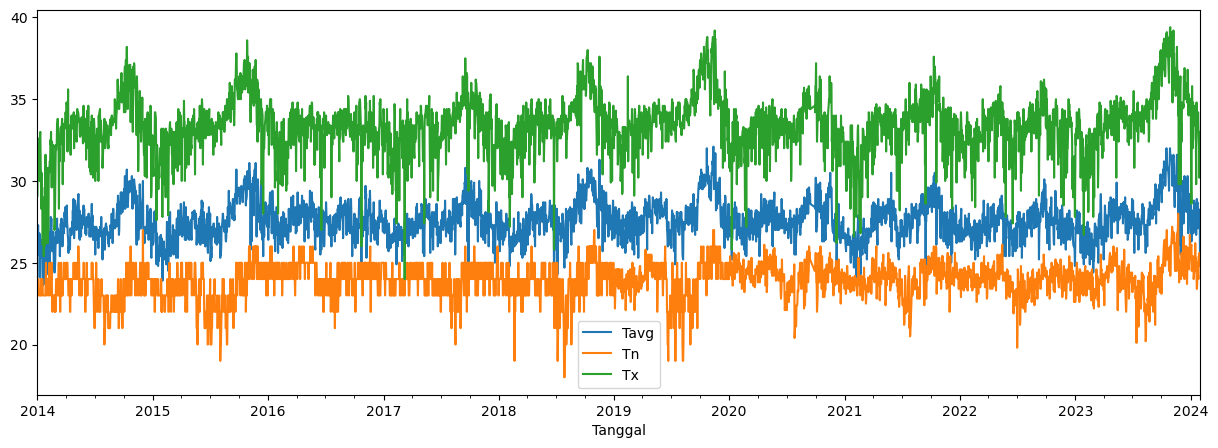

In [ ]:
Kertajati_met_copy['Tavg'].plot(figsize=(15,5))
Kertajati_met_copy['Tn'].plot(figsize=(15,5))
Kertajati_met_copy['Tx'].plot(figsize=(15,5))
plt.legend()

### Wulung

In [ ]:
Wulung_met.isnull().mean()*100

7
Tanggal     0.000000
Tn          7.593498
Tx          5.013073
Tavg        3.035126
RH_avg      3.319313
RR         22.143913
ss          8.616574
ff_x        2.159827
ddd_x       2.205297
ff_avg      2.148460
ddd_car     2.148460
dtype: float64

- Tavg
- Tn
- Tx
- RH_avg
- RR

In [ ]:
Wulung_met.loc[Wulung_met['Tx']<10]

7       Tanggal    Tn   Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
6342 2017-05-13  25.0  3.6  27.6    79.0  19.4  8.3   7.0  130.0     2.0   

7    ddd_car  
6342      E

In [ ]:
Wulung_met.loc[Wulung_met['Tx']>40]

7       Tanggal    Tn     Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
7496 2020-07-10   NaN  330.0  26.6    84.0  14.7  5.3   6.0   90.0     3.0   
8202 2022-06-16  25.0  310.2  26.7    90.0   NaN  4.3   3.0  320.0     1.0   

7    ddd_car  
7496      E   
8202      NW

- It's unlikely for maximum temperature (Tx) to be below 10. There might be a misplaced comma, so it will be replaced with a more reasonable value, assuming data recorders misplaced the comma between 3 and 6.
- Temperature in Indonesia is unlikely to reach 300. It's likely a similar case of misplaced comma, so it will be adjusted to a more reasonable value by dividing this outlier by 10.

In [ ]:
Wulung_met.replace(3.6, 36, inplace=True)
Wulung_met.replace(330, 33, inplace=True)
Wulung_met.replace(310.2, 31.2, inplace=True)

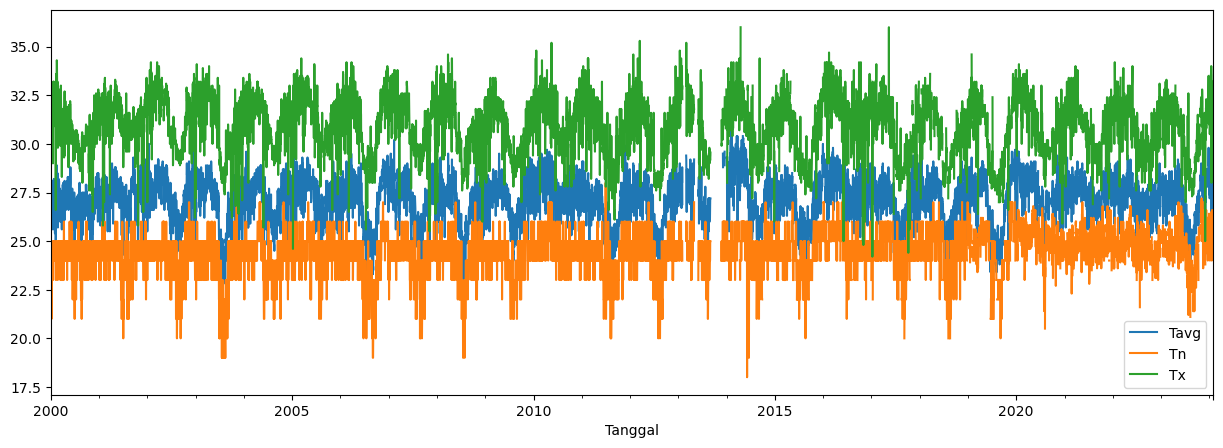

In [ ]:
Wulung_met.set_index('Tanggal')['Tavg'].plot(figsize=(15,5))
Wulung_met.set_index('Tanggal')['Tn'].plot(figsize=(15,5))
Wulung_met.set_index('Tanggal')['Tx'].plot(figsize=(15,5))
plt.legend()

#### Handling Missing Value

First, select the data from the most recent year without extensive missing data.

In [ ]:
Wulung_met_copy=Wulung_met.loc[Wulung_met['Tanggal'].between('01-01-2014','31-01-2024')]
Wulung_met_copy.set_index('Tanggal', inplace=True)

In [ ]:
Wulung_met_copy

7             Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg ddd_car
Tanggal                                                                     
2014-01-01  25.0   NaN   NaN     NaN   9.7  NaN   4.0  220.0     0.0      N 
2014-01-02  25.0   NaN  29.3    77.0   3.1  NaN   5.0  210.0     1.0      N 
2014-01-03  25.0  32.2  29.3    76.0   9.9  NaN   4.0  160.0     1.0      N 
2014-01-04  25.0   NaN  28.5    78.0   3.7  NaN   5.0  250.0     2.0      W 
2014-01-05  26.0  28.0  25.5    91.0  28.1  NaN   4.0  240.0     1.0      N 
...          ...   ...   ...     ...   ...  ...   ...    ...     ...     ...
2024-01-27  26.0  33.0  27.2    85.0   0.0  9.0   4.0  200.0     1.0      C 
2024-01-28  24.6  31.8  27.7    84.0  15.6  4.3   3.0  130.0     1.0      E 
2024-01-29  24.8  32.1  27.9    85.0  53.8  7.1   3.0  150.0     2.0      E 
2024-01-30  25.6  32.2  27.3    84.0  27.9  4.2   5.0   50.0     1.0      C 
2024-01-31  24.3  32.4  27.4    86.0  13.2  5.5   4.0  230.0     1.0      C 

[3683 rows x 10 columns]

In [ ]:
Wulung_met_copy['Tavg'] = Wulung_met_copy['Tavg'].bfill()
Wulung_met_copy['Tx'] = Wulung_met_copy['Tx'].bfill()
Wulung_met_copy['Tn'] = Wulung_met_copy['Tn'].bfill()
Wulung_met_copy['RH_avg'] = Wulung_met_copy['RH_avg'].bfill()
Wulung_met_copy['RR'] = Wulung_met_copy['RR'].fillna(0)
Wulung_met_copy.isnull().mean()*100

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\24216117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wulung_met_copy['Tavg'] = Wulung_met_copy['Tavg'].bfill()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\24216117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wulung_met_copy['Tx'] = Wulung_met_copy['Tx'].bfill()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\24216117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

7
Tn          0.000000
Tx          0.000000
Tavg        0.000000
RH_avg      0.000000
RR          0.000000
ss         15.449362
ff_x        1.031768
ddd_x       1.031768
ff_avg      1.031768
ddd_car     1.031768
dtype: float64

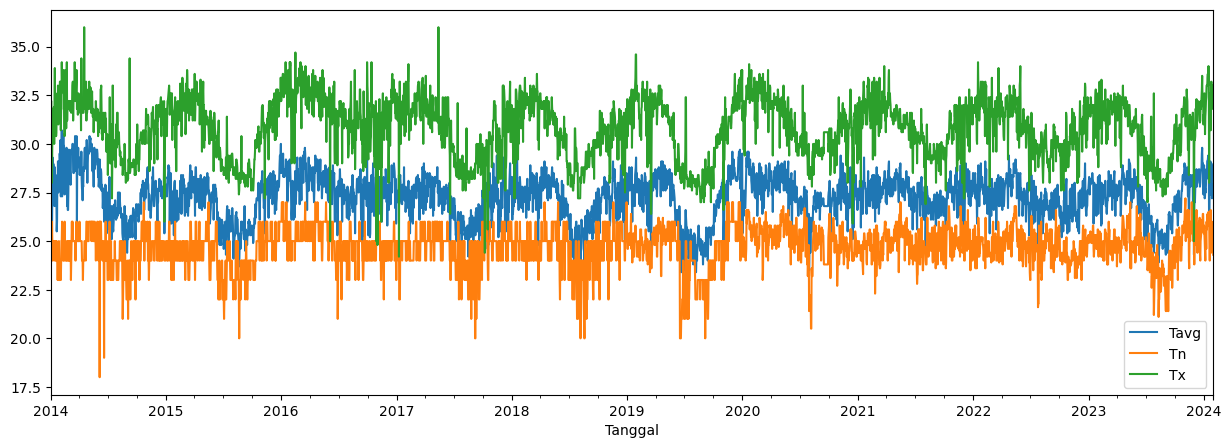

In [ ]:
Wulung_met_copy['Tavg'].plot(figsize=(15,5))
Wulung_met_copy['Tn'].plot(figsize=(15,5))
Wulung_met_copy['Tx'].plot(figsize=(15,5))
plt.legend()

<Axes: xlabel='Tanggal'>

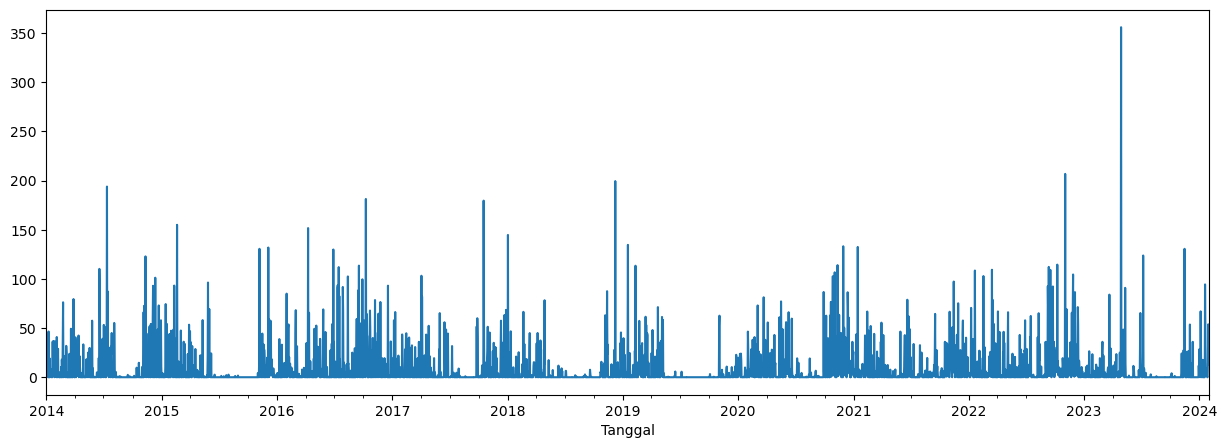

In [ ]:
Wulung_met_copy['RR'].plot(figsize=(15,5))

## IOT

- Air pressure are measured in hPa
- Temperature are measured in Celcius degree
- rainfall are measured in mm

### Cikajang

In [ ]:
Cikajang_met.isnull().mean()*100

Timestamp        0.000000
Air Pressure     0.000000
Rain Fall ml    92.653673
Temperature      0.000000
Humidity         0.000000
dtype: float64

rainfall will not be used for this analysis

### Sirnajaya

In [ ]:
Sirnajaya_met.isnull().mean()*100

Timestamp        0.000000
Air Pressure     0.000000
Rain Fall ml    90.707071
Temperature      0.000000
Humidity         0.000000
dtype: float64

### Chili Farm E

In [ ]:
Chilly_Farm_E_met.isnull().mean()*100

Timestamp       0.000000
Air Pressure    0.070796
Rain Fall ml    0.000000
Temperature     0.000000
Humidity        0.000000
dtype: float64

<Axes: xlabel='Timestamp'>

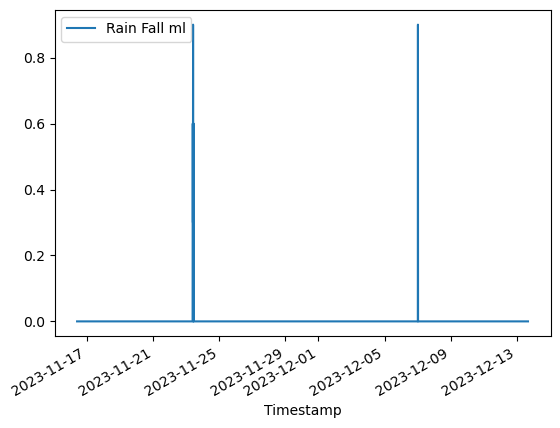

In [ ]:
Chilly_Farm_E_met.plot(x='Timestamp', y='Rain Fall ml')

### Chili Farm N

In [ ]:
Chilly_Farm_N_met.isnull().mean()*100

Timestamp       0.0
Air Pressure    0.0
Rain Fall ml    0.0
Temperature     0.0
Humidity        0.0
dtype: float64

<Axes: xlabel='Timestamp'>

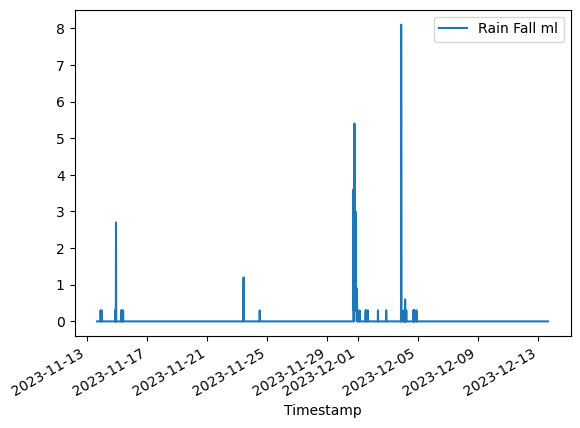

In [ ]:
Chilly_Farm_N_met.plot(x='Timestamp', y='Rain Fall ml')

### Tasik

In [ ]:
Tasik_met.isnull().mean()*100

Timestamp        0.000000
Air Pressure     0.000000
Rain Fall ml    93.665158
Temperature      0.000000
Humidity         0.000000
dtype: float64

# Trend Analysis

## BMKG

### Using linear regression

#### Process

Penggung

In [ ]:
# Mencari fitting model regresi menggunakan sklearn untuk mendapatkan trend grafik
Penggung_rev=Penggung_met_copy.reset_index()
Penggung_rev['DateNum']=(Penggung_rev.Tanggal - pd.Timestamp("2016-09-01")) // pd.Timedelta("1d")

# Inisiasi LinearRegression model
model = LinearRegression()

# Independent variable
X = Penggung_rev["DateNum"].values.reshape(-1,1)

# Dependent variable
Y = Penggung_rev["Tavg"]

# Fit the model
model.fit(X, Y)

# Mencari trend data dan disimpan ke dalam kolom Revenue_pred
Penggung_rev["Tavg_pred"]= model.predict(X)

# Menghitung regression parameters

intercept = model.intercept_
slope = model.coef_[0]
r_squared =  model.score(X,Y)
std_err = np.sqrt((1 - r_squared) * np.var(Y, ddof=1) / Penggung_rev.shape[0])

# Menghitung the t-value dengan 95% confidence level
t = stats.t.ppf(0.975, Penggung_rev.shape[0]-2)

# Menghitung the margin of error
me = std_err * t

# Menghitung error margin lines for linear regression
lower_Penggung = (intercept + slope * Penggung_rev["DateNum"]) - me
upper_Penggung = (intercept + slope * Penggung_rev["DateNum"]) + me

Bandung

In [ ]:
# Mencari fitting model regresi menggunakan sklearn untuk mendapatkan trend grafik
Bandung_rev=Bandung_met_copy.reset_index()
Bandung_rev['DateNum']=(Bandung_rev.Tanggal - pd.Timestamp("2016-09-01")) // pd.Timedelta("1d")

# Inisiasi LinearRegression model
model = LinearRegression()

# Independent variable
X = Bandung_rev["DateNum"].values.reshape(-1,1)

# Dependent variable
Y = Bandung_rev["Tavg"]

# Fit the model
model.fit(X, Y)

# Mencari trend data dan disimpan ke dalam kolom Revenue_pred
Bandung_rev["Tavg_pred"]= model.predict(X)

# Menghitung regression parameters

intercept = model.intercept_
slope = model.coef_[0]
r_squared =  model.score(X,Y)
std_err = np.sqrt((1 - r_squared) * np.var(Y, ddof=1) / Bandung_rev.shape[0])

# Menghitung the t-value dengan 95% confidence level
t = stats.t.ppf(0.975, Bandung_rev.shape[0]-2)

# Menghitung the margin of error
me = std_err * t

# Menghitung error margin lines for linear regression
lower_Bandung = (intercept + slope * Bandung_rev["DateNum"]) - me
upper_Bandung = (intercept + slope * Bandung_rev["DateNum"]) + me

Kertajati

In [ ]:
# Mencari fitting model regresi menggunakan sklearn untuk mendapatkan trend grafik
Kertajati_rev=Kertajati_met_copy.reset_index()
Kertajati_rev['DateNum']=(Kertajati_rev.Tanggal - pd.Timestamp("2014-01-01")) // pd.Timedelta("1d")

# Inisiasi LinearRegression model
model = LinearRegression()

# Independent variable
X = Kertajati_rev["DateNum"].values.reshape(-1,1)

# Dependent variable
Y = Kertajati_rev["Tavg"]

# Fit the model
model.fit(X, Y)

# Mencari trend data dan disimpan ke dalam kolom Revenue_pred
Kertajati_rev["Tavg_pred"]= model.predict(X)

# Menghitung regression parameters

intercept = model.intercept_
slope = model.coef_[0]
r_squared =  model.score(X,Y)
std_err = np.sqrt((1 - r_squared) * np.var(Y, ddof=1) / Kertajati_rev.shape[0])

# Menghitung the t-value dengan 95% confidence level
t = stats.t.ppf(0.975, Kertajati_rev.shape[0]-2)

# Menghitung the margin of error
me = std_err * t

# Menghitung error margin lines for linear regression
lower_Kertajati = (intercept + slope * Kertajati_rev["DateNum"]) - me
upper_Kertajati = (intercept + slope * Kertajati_rev["DateNum"]) + me

Wulung

In [ ]:
# Mencari fitting model regresi menggunakan sklearn untuk mendapatkan trend grafik
Wulung_rev=Wulung_met_copy.reset_index()
Wulung_rev['DateNum']=(Wulung_rev.Tanggal - pd.Timestamp("2014-01-01")) // pd.Timedelta("1d")

# Inisiasi LinearRegression model
model = LinearRegression()

# Independent variable
X = Wulung_rev["DateNum"].values.reshape(-1,1)

# Dependent variable
Y = Wulung_rev["Tavg"]

# Fit the model
model.fit(X, Y)

# Mencari trend data dan disimpan ke dalam kolom Revenue_pred
Wulung_rev["Tavg_pred"]= model.predict(X)

# Menghitung regression parameters

intercept = model.intercept_
slope = model.coef_[0]
r_squared =  model.score(X,Y)
std_err = np.sqrt((1 - r_squared) * np.var(Y, ddof=1) / Wulung_rev.shape[0])

# Menghitung the t-value dengan 95% confidence level
t = stats.t.ppf(0.975, Wulung_rev.shape[0]-2)

# Menghitung the margin of error
me = std_err * t

# Menghitung error margin lines for linear regression
lower_Wulung = (intercept + slope * Wulung_rev["DateNum"]) - me
upper_Wulung = (intercept + slope * Wulung_rev["DateNum"]) + me

#### Trend

In [ ]:
Bandung_rev2=Bandung_rev.loc[Bandung_rev['Tanggal'].between('01-01-2014','31-01-2024')]

C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

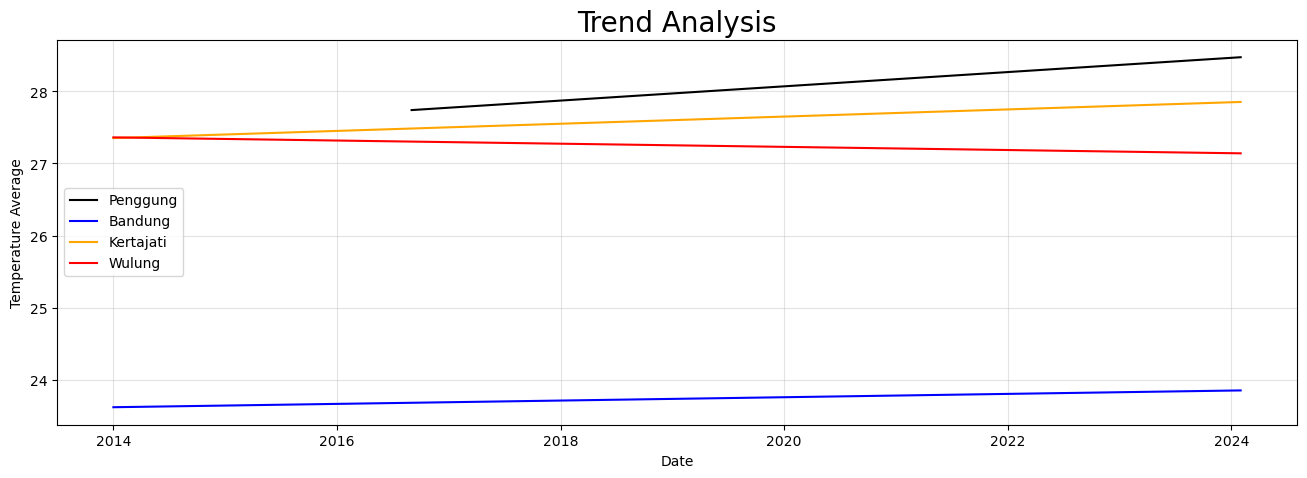

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
sns.lineplot(data=Penggung_rev, x=Penggung_rev.Tanggal, y="Tavg_pred",label='Penggung', color="black")
sns.lineplot(data=Bandung_rev2, x=Bandung_rev.Tanggal, y="Tavg_pred", label='Bandung',color="blue")
sns.lineplot(data=Kertajati_rev, x=Kertajati_rev.Tanggal, y="Tavg_pred",label='Kertajati', color="orange")
sns.lineplot(data=Wulung_rev, x=Wulung_rev.Tanggal, y="Tavg_pred",label='Wulung', color="red")
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

##### Trend per station

C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

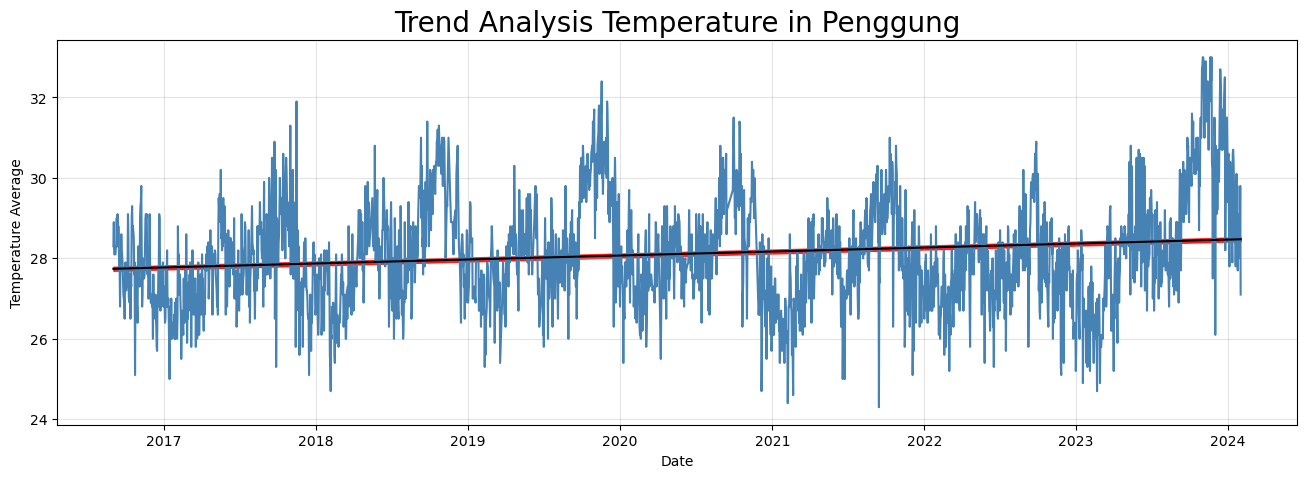

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
sns.lineplot(data=Penggung_rev, x=Penggung_rev.Tanggal, y="Tavg", color="steelblue")
sns.lineplot( data=Penggung_rev, x=Penggung_rev.Tanggal, y="Tavg_pred", color="black")
plt.fill_between(Penggung_rev.Tanggal, lower_Penggung, upper_Penggung, color="red", alpha=0.8)
plt.title("Trend Analysis Temperature in Penggung", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
#plt.legend(["Temperature Average Daily", "Linear regression"])
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

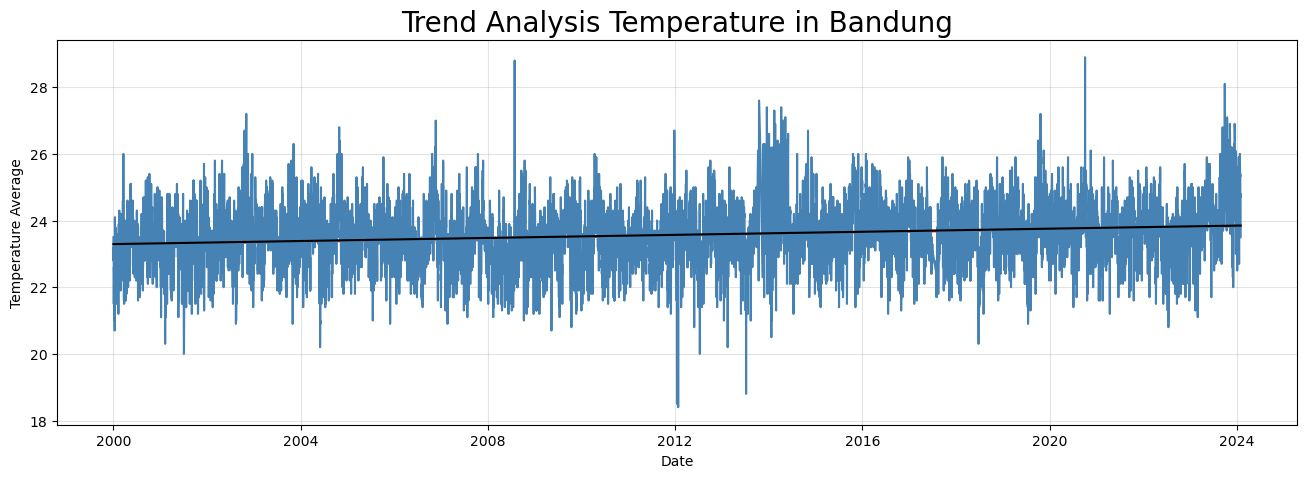

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
sns.lineplot(data=Bandung_rev, x=Bandung_rev.Tanggal, y="Tavg", color="steelblue")
sns.lineplot( data=Bandung_rev, x=Bandung_rev.Tanggal, y="Tavg_pred", color="black")
plt.fill_between(Bandung_rev.Tanggal, lower_Bandung, upper_Bandung, color="red", alpha=0.8)
plt.title("Trend Analysis Temperature in Bandung", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
#plt.legend(["Temperature Average Daily", "Linear regression"])
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

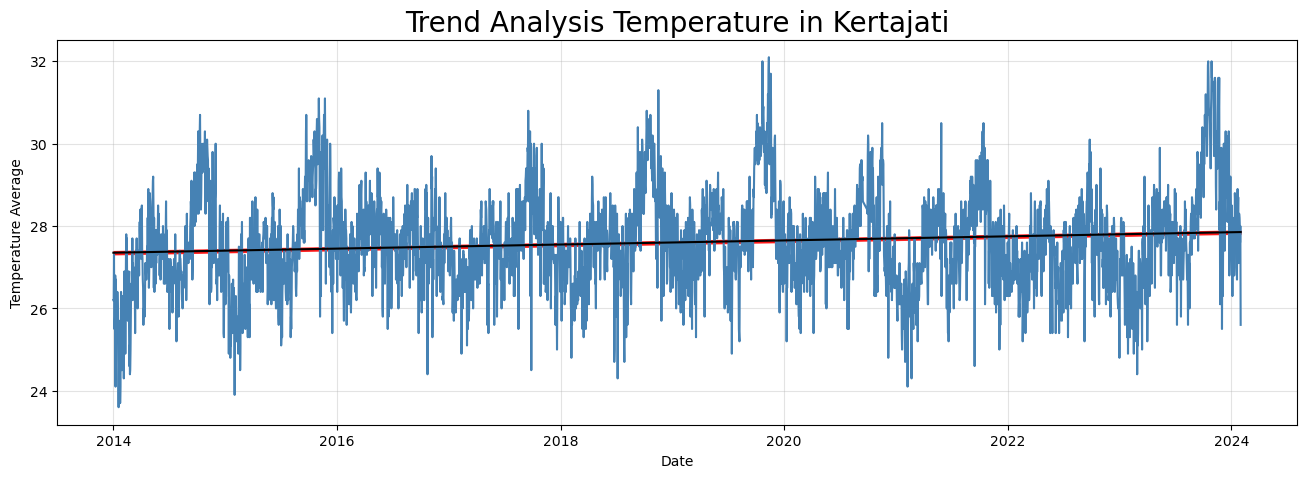

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
sns.lineplot(data=Kertajati_rev, x=Kertajati_rev.Tanggal, y="Tavg", color="steelblue")
sns.lineplot( data=Kertajati_rev, x=Kertajati_rev.Tanggal, y="Tavg_pred", color="black")
plt.fill_between(Kertajati_rev.Tanggal, lower_Kertajati, upper_Kertajati, color="red", alpha=0.8)
plt.title("Trend Analysis Temperature in Kertajati", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
#plt.legend(["Temperature Average Daily", "Linear regression"])
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sashu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

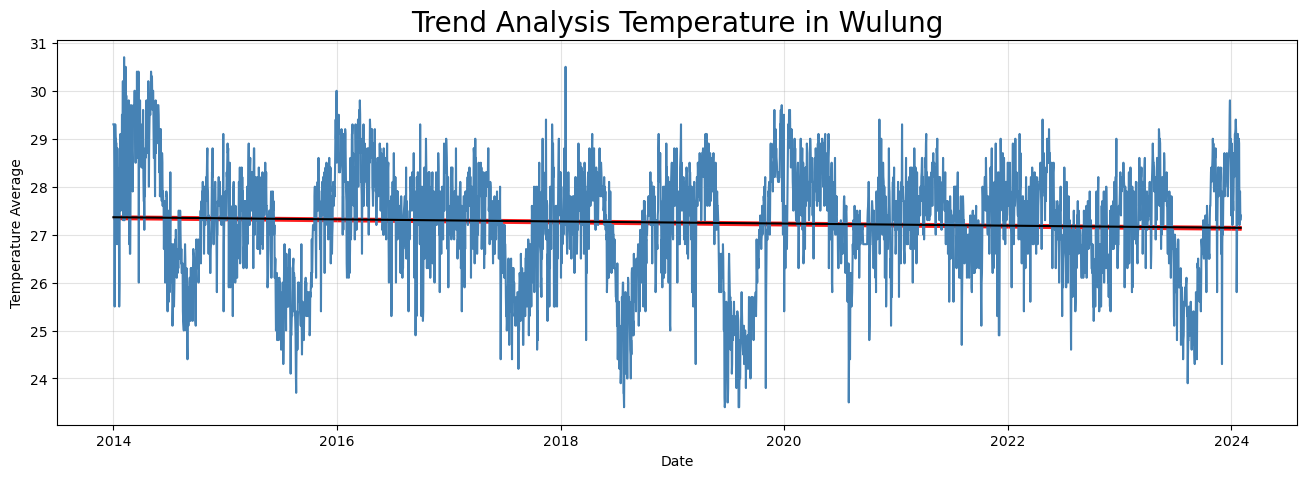

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
sns.lineplot(data=Wulung_rev, x=Wulung_rev.Tanggal, y="Tavg", color="steelblue")
sns.lineplot( data=Wulung_rev, x=Wulung_rev.Tanggal, y="Tavg_pred", color="black")
plt.fill_between(Wulung_rev.Tanggal, lower_Wulung, upper_Wulung, color="red", alpha=0.8)
plt.title("Trend Analysis Temperature in Wulung", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
#plt.legend(["Temperature Average Daily", "Linear regression"])
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

### Using statistical decompose

for decomposing the series, we need to find period first (in this term, period (not T), is the number of steps in 1 period (T)
- period can be found by using trial and error and check the coherency between the graph
- period can be found using fft and find the most dominan period after fft

please make sure to find the best fit period in order to decompose the time series.

period=int(T/dt) <br>
dt = steps

#### Temperature

##### Process

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\468417360.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


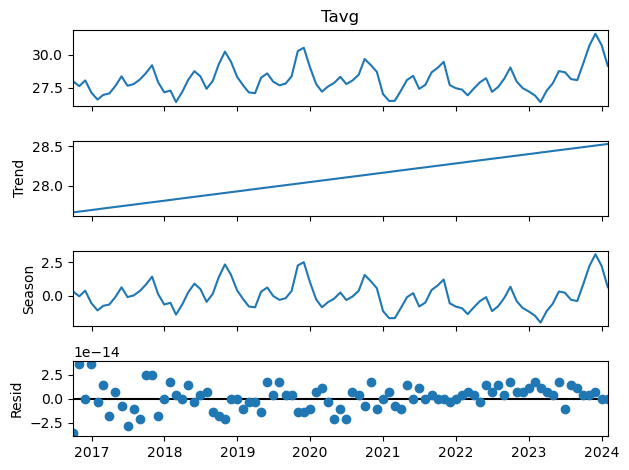

In [ ]:
data = Penggung_met_copy['Tavg']
data = data.resample('M').mean().ffill()

res_Penggung = STL(data, period=70).fit()
res_Penggung.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1093804107.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


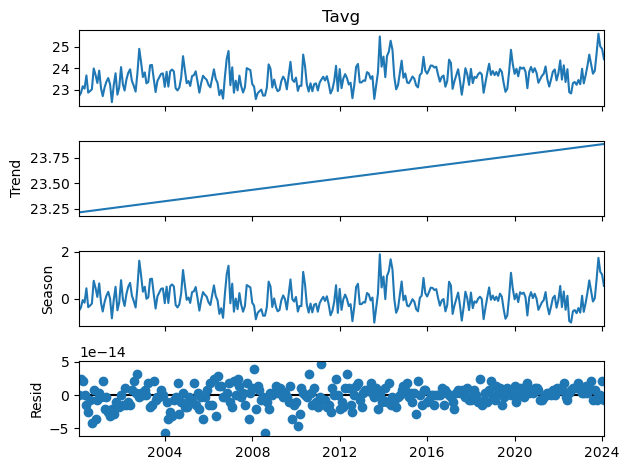

In [ ]:
data = Bandung_met_copy['Tavg']
data = data.resample('M').mean().ffill()

res_Bandung = STL(data, period=150).fit()
res_Bandung.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3909752423.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


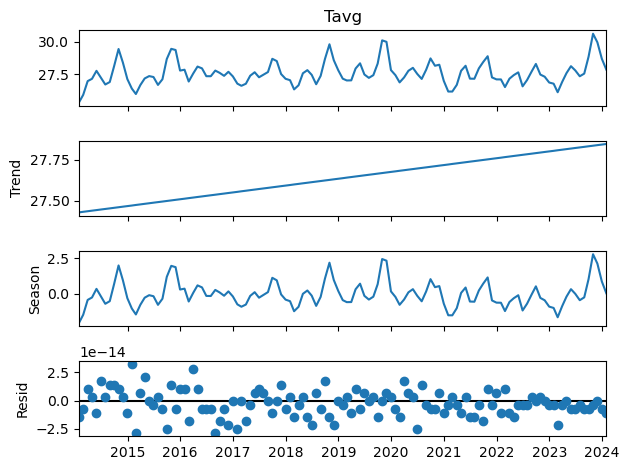

In [ ]:
data = Kertajati_met_copy['Tavg']
data = data.resample('M').mean().ffill()

res_Kertajati = STL(data, period=70).fit()
res_Kertajati.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2680636839.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


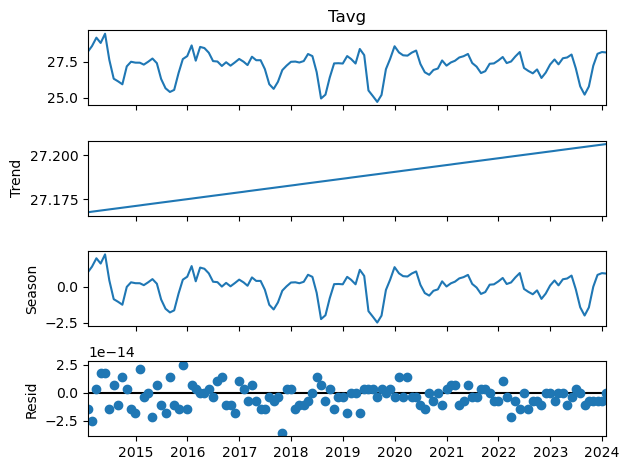

In [ ]:
data = Wulung_met_copy['Tavg']
data = data.resample('M').mean().ffill()

res_Wulung = STL(data, period=70).fit()
res_Wulung.plot()
plt.show()

Now we will check all the trend from all station over the year.

##### Temperature trend

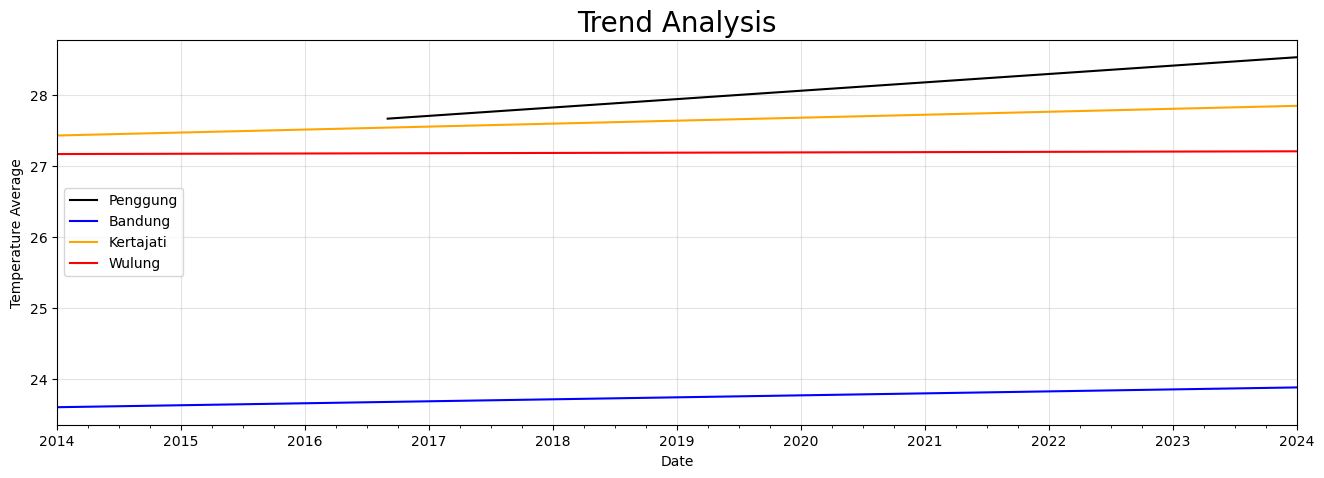

In [ ]:
tmp2=res_Bandung.trend.reset_index()
res_BandungTrend2=tmp2.loc[tmp2['Tanggal'].between('01-01-2014','31-01-2024')]
res_BandungTrend2.set_index(['Tanggal'], inplace=True)

#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
res_Penggung.trend.plot(label='Penggung', color='black')
res_BandungTrend2.trend.plot(label='Bandung', color='blue')
res_Kertajati.trend.plot(label='Kertajati', color='orange')
res_Wulung.trend.plot(label='Wulung', color='red')
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

#### Humidity

##### Process

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1666600393.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


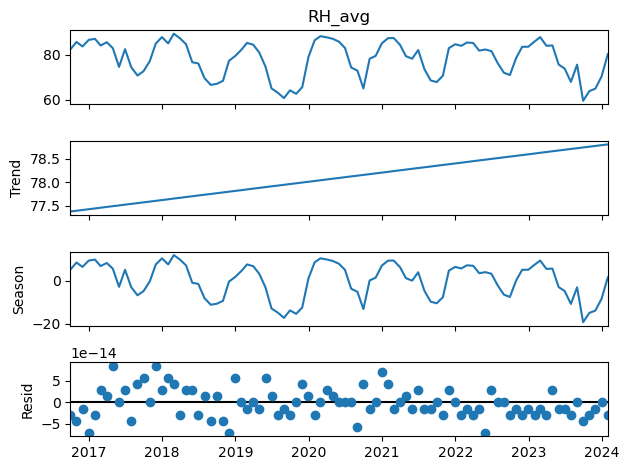

In [ ]:
data = Penggung_met_copy['RH_avg']
data = data.resample('M').mean().ffill()

res_hum_Penggung = STL(data, period=50).fit()
res_hum_Penggung.plot()
plt.show()

In [ ]:
Bandung_met_copy[Bandung_met_copy['RH_avg']<60]

Empty DataFrame
Columns: [Tn, Tx, Tavg, RH_avg, RR, ss, ff_x, ddd_x, ff_avg, ddd_car]
Index: []

77.76652161884775

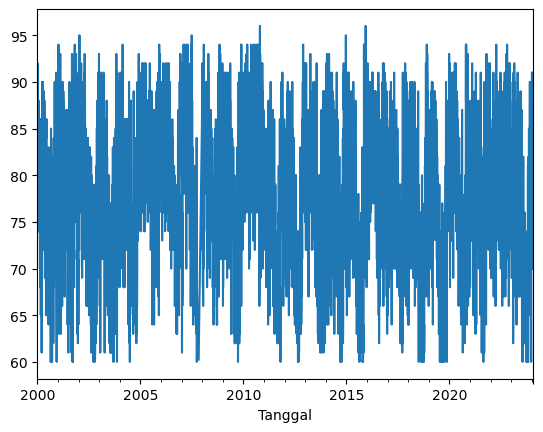

In [ ]:
Bandung_met_copy['RH_avg'].plot()
Bandung_met_copy['RH_avg'].mean()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2768051900.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


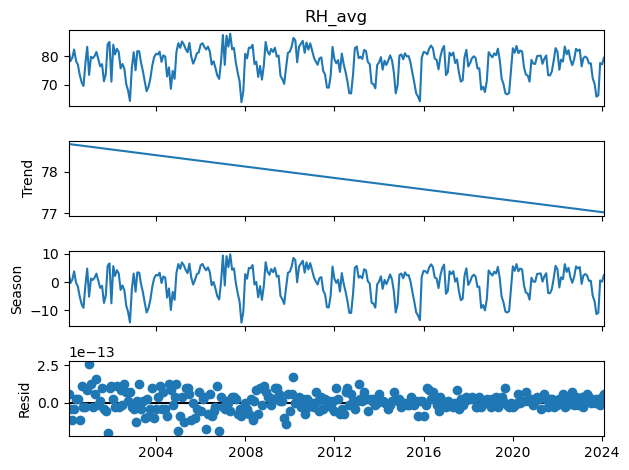

In [ ]:
data = Bandung_met_copy['RH_avg']
data = data.resample('M').mean().ffill()

res_hum_Bandung = STL(data, period=200).fit()
res_hum_Bandung.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\575977387.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


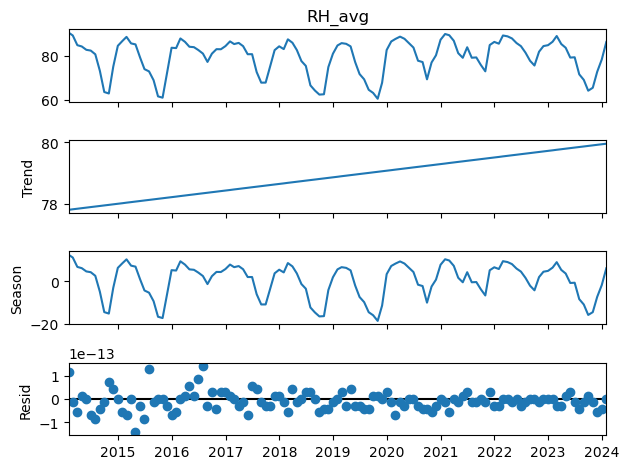

In [ ]:
data = Kertajati_met_copy['RH_avg']
data = data.resample('M').mean().ffill()

res_hum_Kertajati = STL(data, period=70).fit()
res_hum_Kertajati.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\681856235.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


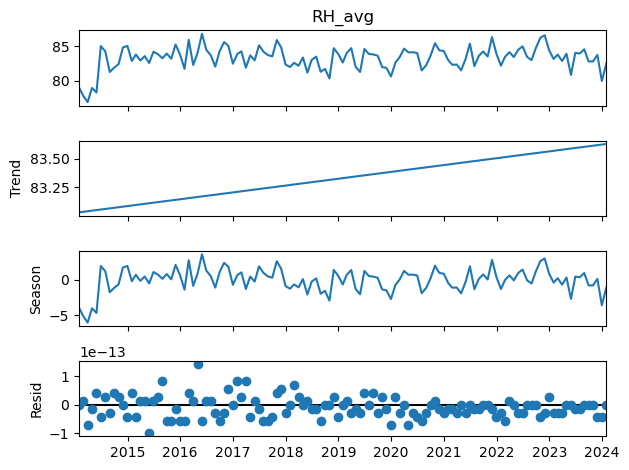

In [ ]:
data = Wulung_met_copy['RH_avg']
data = data.resample('M').mean().ffill()

res_hum_Wulung = STL(data, period=70).fit()
res_hum_Wulung.plot()
plt.show()

##### Humidity Trend

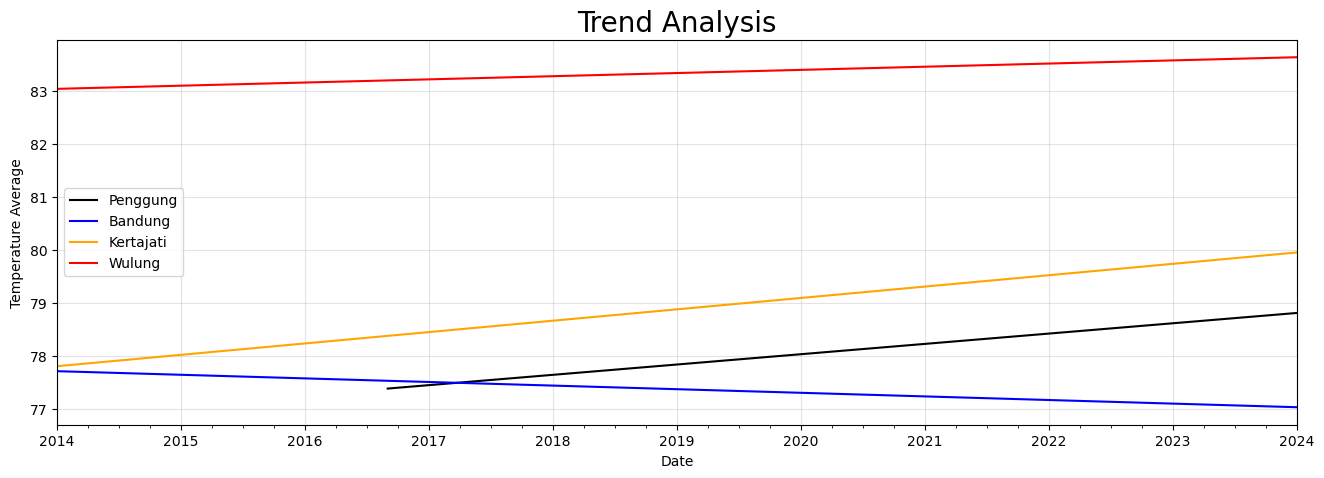

In [ ]:
tmp2=res_hum_Bandung.trend.reset_index()
res_hum_BandungTrend2=tmp2.loc[tmp2['Tanggal'].between('01-01-2014','31-01-2024')]
res_hum_BandungTrend2.set_index(['Tanggal'], inplace=True)

#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
res_hum_Penggung.trend.plot(label='Penggung', color='black')
res_hum_BandungTrend2.trend.plot(label='Bandung', color='blue')
res_hum_Kertajati.trend.plot(label='Kertajati', color='orange')
res_hum_Wulung.trend.plot(label='Wulung', color='red')
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

#### Rainfall

##### Process

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4231516569.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


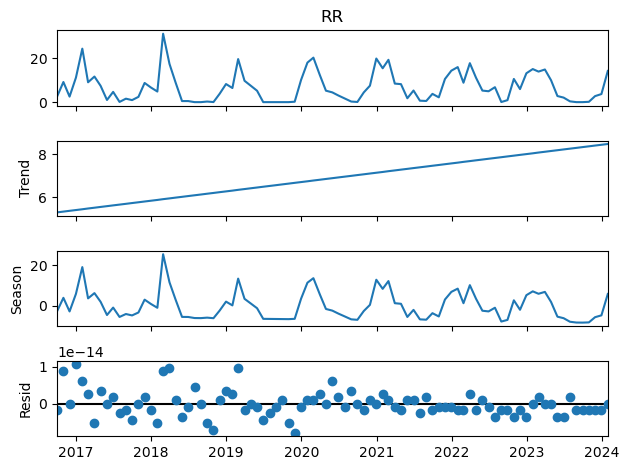

6.803469915097821

In [ ]:
data = Penggung_met_copy['RR']
data = data.resample('M').mean().ffill()

res_rr_Penggung = STL(data, period=50).fit()
res_rr_Penggung.plot()
plt.show()
Penggung_met_copy['RR'].mean()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\156690564.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


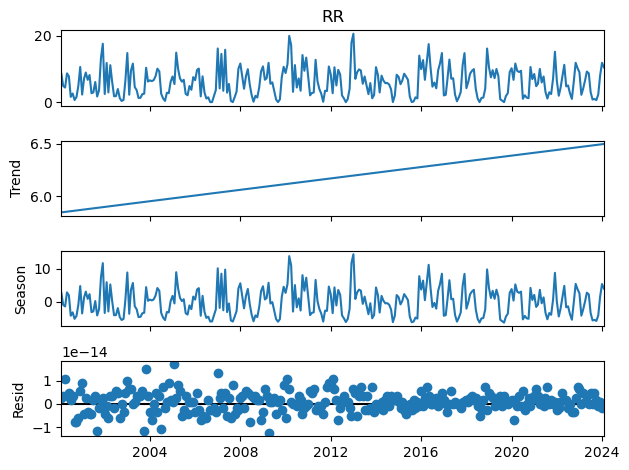

In [ ]:
data = Bandung_met_copy['RR']
data = data.resample('M').mean().ffill()

res_rr_Bandung = STL(data, period=200).fit()
res_rr_Bandung.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4282559285.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


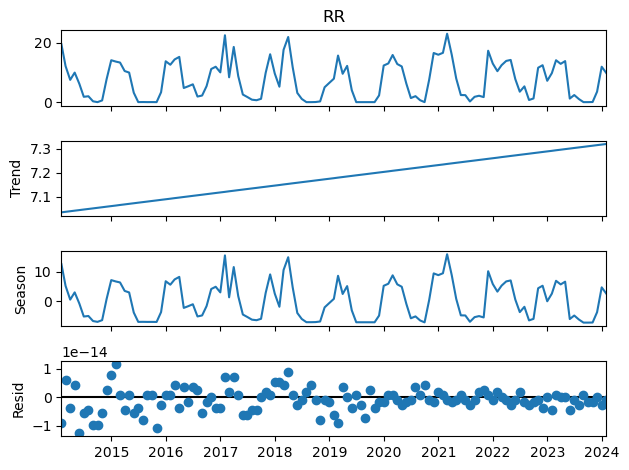

In [ ]:
data = Kertajati_met_copy['RR']
data = data.resample('M').mean().ffill()

res_rr_Kertajati = STL(data, period=70).fit()
res_rr_Kertajati.plot()
plt.show()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\473956674.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


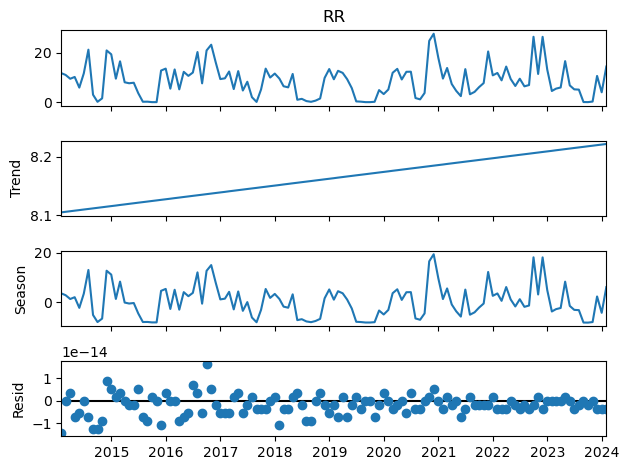

In [ ]:
data = Wulung_met_copy['RR']
data = data.resample('M').mean().ffill()

res_rr_Wulung = STL(data, period=70).fit()
res_rr_Wulung.plot()
plt.show()

##### Rainfall Trend

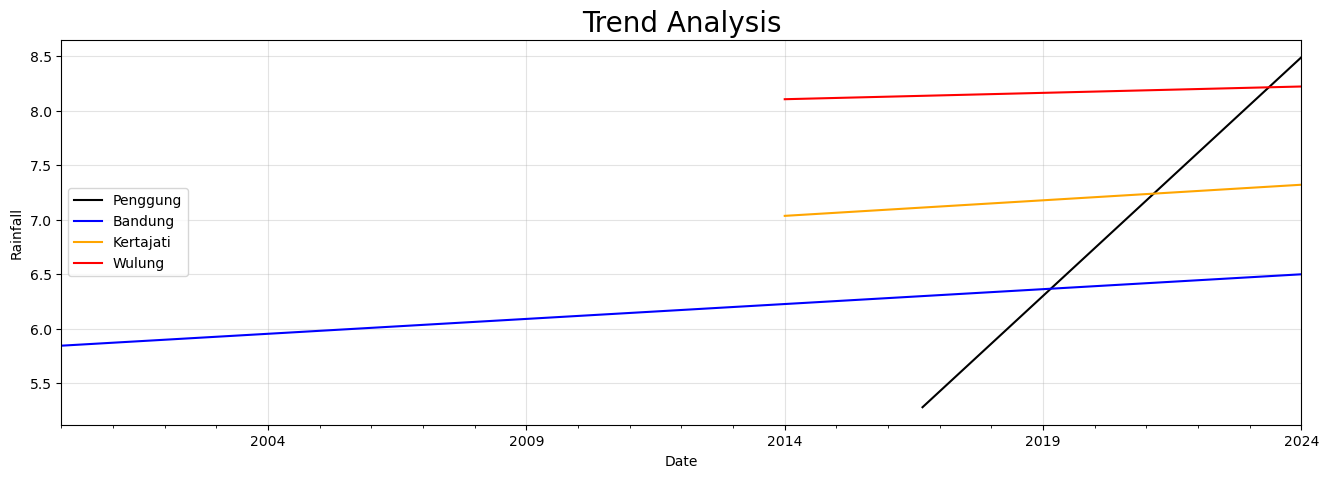

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
res_rr_Penggung.trend.plot(label='Penggung', color='black')
res_rr_Bandung.trend.plot(label='Bandung', color='blue')
res_rr_Kertajati.trend.plot(label='Kertajati', color='orange')
res_rr_Wulung.trend.plot(label='Wulung', color='red')
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Rainfall")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

## IOT

In [ ]:
Sirnajaya_met_copy=Sirnajaya_met.set_index('Timestamp')
Cikajang_met_copy=Cikajang_met.set_index('Timestamp')
Tasik_met_copy=Tasik_met.set_index('Timestamp')
Chilly_Farm_E_met_copy=Chilly_Farm_E_met.set_index('Timestamp')
Chilly_Farm_N_met_copy=Chilly_Farm_N_met.set_index('Timestamp')

### Using Statistical Decompose

#### Temperature

##### Process

In [ ]:
Cikajang_met_copy['Temperature'].mean()

22.496821589205396

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4141617299.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


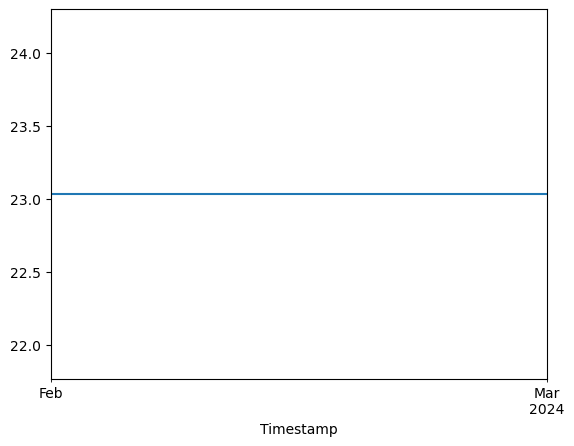

In [ ]:
data = Cikajang_met_copy['Temperature']
data = data.resample('M').mean().ffill()

res_Cikajang = STL(data, period=7).fit()
res_Cikajang.trend.plot()
plt.show()

In [ ]:
Sirnajaya_met_copy['Temperature'].mean()

22.71210101010101

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\521056507.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


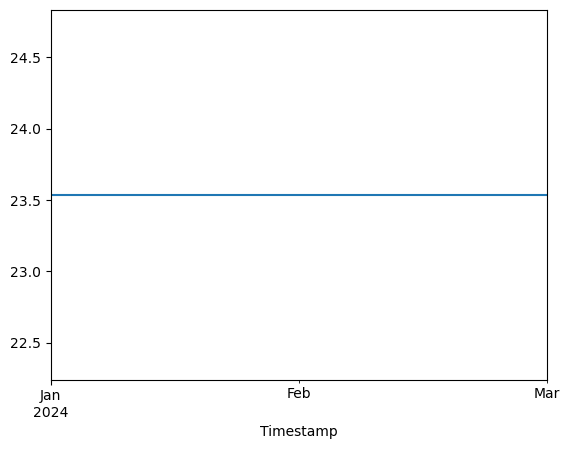

In [ ]:
data = Sirnajaya_met_copy['Temperature']
data = data.resample('M').mean().ffill()

res_Sirnajaya = STL(data, period=5).fit()
res_Sirnajaya.trend.plot()
plt.show()

In [ ]:
Chilly_Farm_E_met_copy['Temperature'].mean()

23.413702654867258

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\4261115398.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


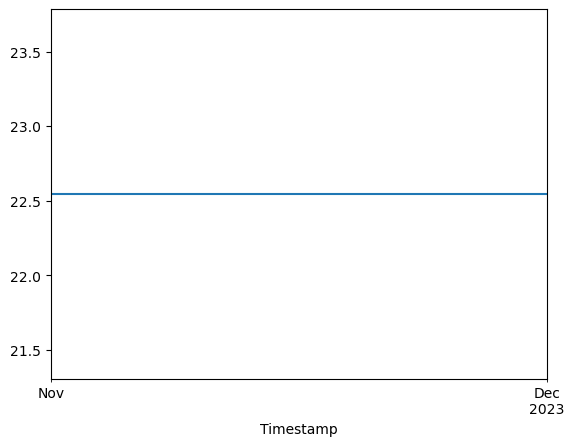

In [ ]:
data = Chilly_Farm_E_met_copy['Temperature']
data = data.resample('M').mean().ffill()

res_Chilly_Farm_E = STL(data, period=7).fit()
res_Chilly_Farm_E.trend.plot()
plt.show()

In [ ]:
Chilly_Farm_N_met_copy['Temperature'].mean()

23.32638216255095

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3019829169.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


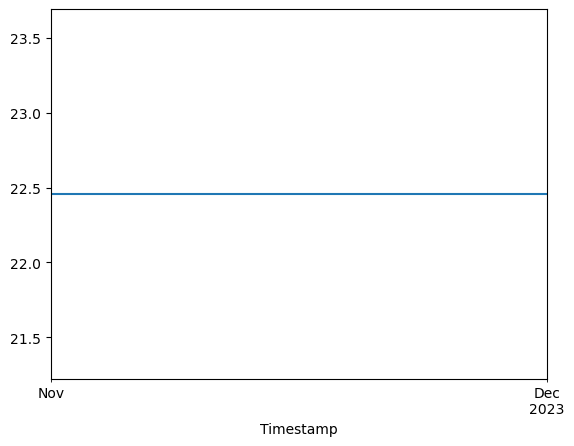

In [ ]:
data = Chilly_Farm_N_met_copy['Temperature']
data = data.resample('M').mean().ffill()

res_Chilly_Farm_N = STL(data, period=7).fit()
res_Chilly_Farm_N.trend.plot()
plt.show()

In [ ]:
Tasik_met_copy['Temperature'].mean()

27.05420814479638

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1864594328.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


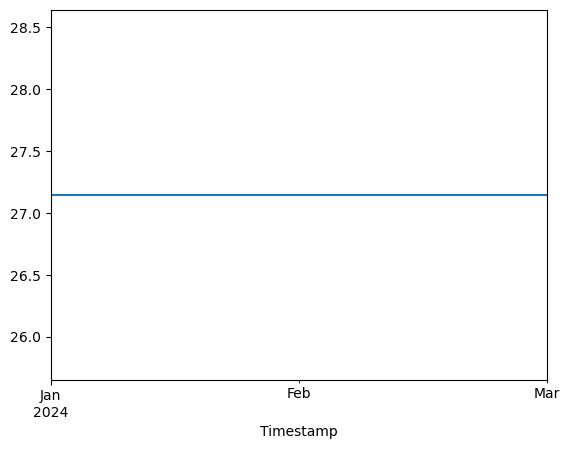

In [ ]:
data = Tasik_met_copy['Temperature']
data = data.resample('M').mean().ffill()

res_Tasik = STL(data, period=5).fit()
res_Tasik.trend.plot()
plt.show()

#### Temperature Trend

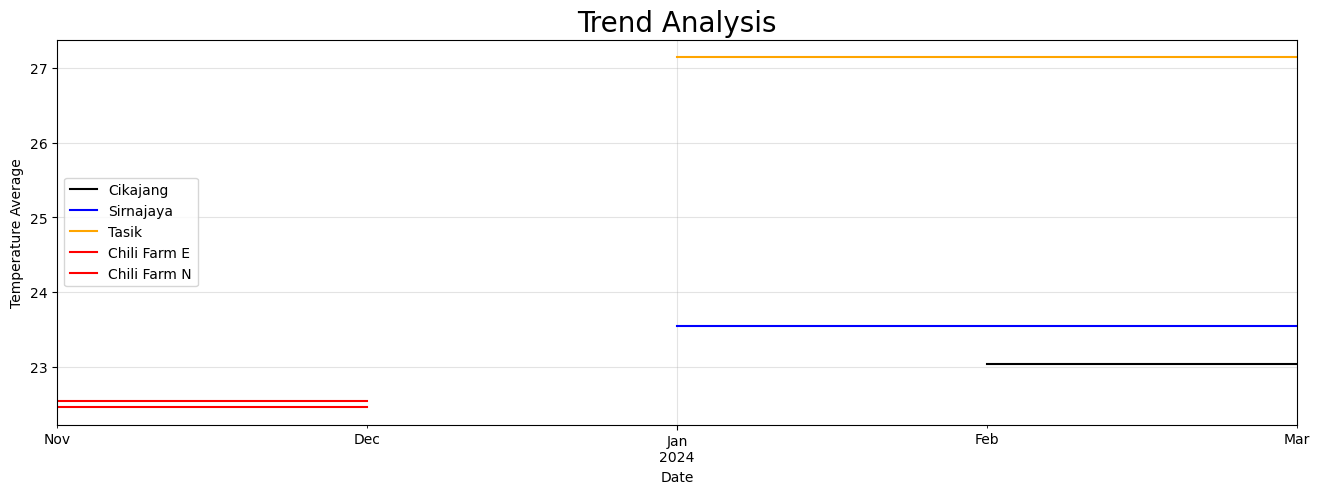

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
res_Cikajang.trend.plot(label='Cikajang', color='black')
res_Sirnajaya.trend.plot(label='Sirnajaya', color='blue')
res_Tasik.trend.plot(label='Tasik', color='orange')
res_Chilly_Farm_E.trend.plot(label='Chili Farm E', color='red')
res_Chilly_Farm_N.trend.plot(label='Chili Farm N', color='red')
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Temperature Average")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

#### Humidity

##### Process

In [ ]:
Cikajang_met_copy['Humidity'].mean()

74.32233883058471

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1006932358.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


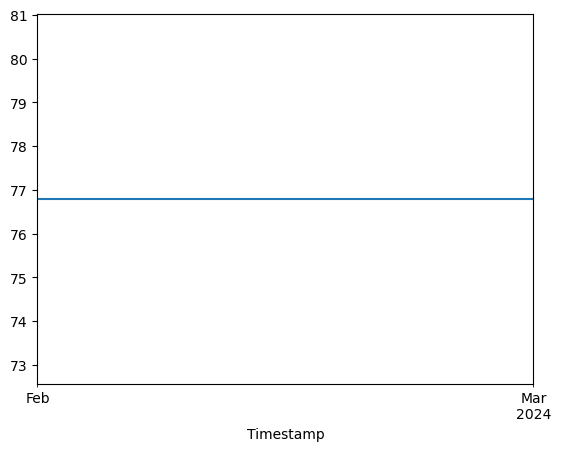

In [ ]:
data = Cikajang_met_copy['Humidity']
data = data.resample('M').mean().ffill()

res_hum_Cikajang = STL(data, period=5).fit()
res_hum_Cikajang.trend.plot()
plt.show()

In [ ]:
Sirnajaya_met_copy['Humidity'].mean()

70.15757575757576

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1496809159.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


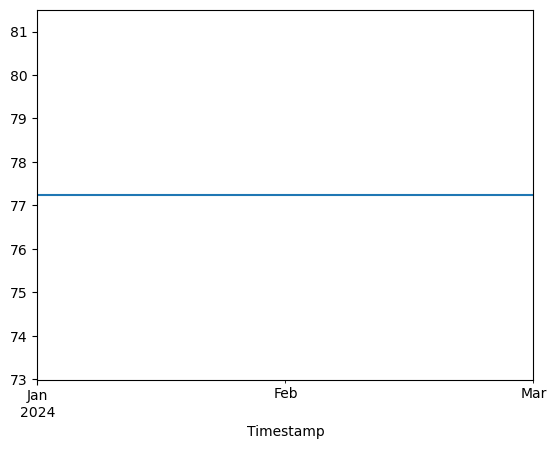

In [ ]:
data = Sirnajaya_met_copy['Humidity']
data = data.resample('M').mean().ffill()

res_hum_Sirnajaya = STL(data, period=5).fit()
res_hum_Sirnajaya.trend.plot()
plt.show()

In [ ]:
Chilly_Farm_E_met_copy['Humidity'].mean()

126.39858407079646

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\159677741.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


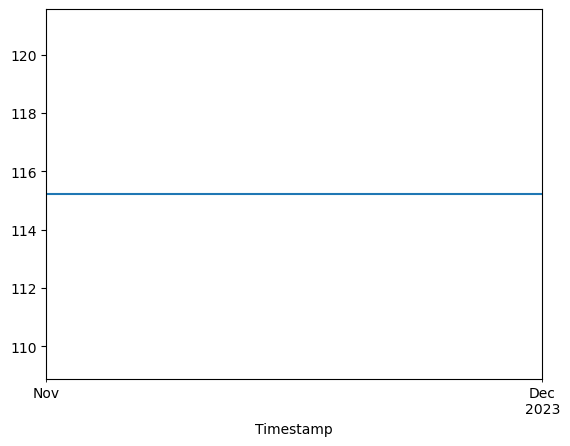

In [ ]:
data = Chilly_Farm_E_met_copy['Humidity']
data = data.resample('M').mean().ffill()

res_hum_Chilly_Farm_E = STL(data, period=7).fit()
res_hum_Chilly_Farm_E.trend.plot()
plt.show()

In [ ]:
Chilly_Farm_N_met_copy['Humidity'].mean()

77.18053224646368

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3774046795.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


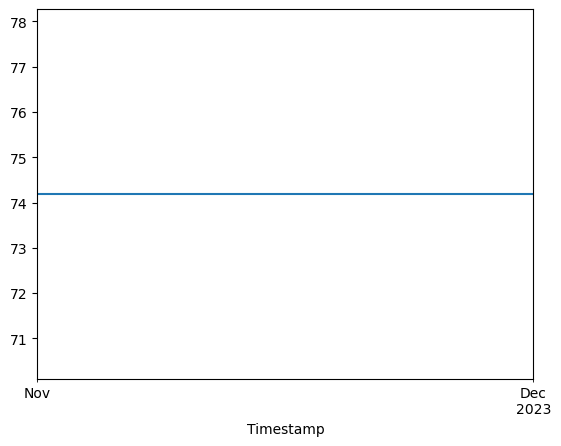

In [ ]:
data = Chilly_Farm_N_met_copy['Humidity']
data = data.resample('M').mean().ffill()

res_hum_Chilly_Farm_N = STL(data, period=7).fit()
res_hum_Chilly_Farm_N.trend.plot()
plt.show()

In [ ]:
Tasik_met_copy['Humidity'].mean()

94.4579185520362

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1788115906.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean().ffill()


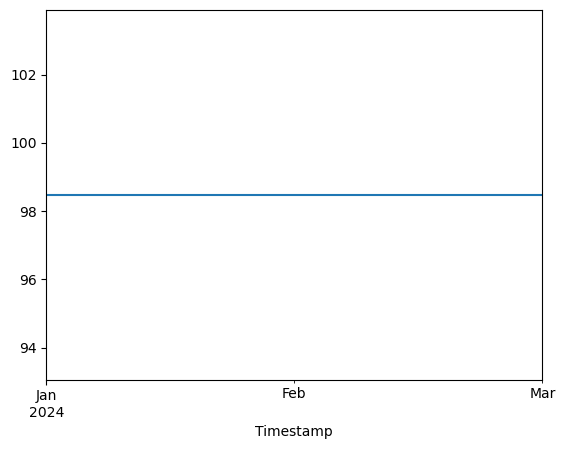

In [ ]:
data = Tasik_met_copy['Humidity']
data = data.resample('M').mean().ffill()

res_hum_Tasik = STL(data, period=5).fit()
res_hum_Tasik.trend.plot()
plt.show()

#### Humidity Trend

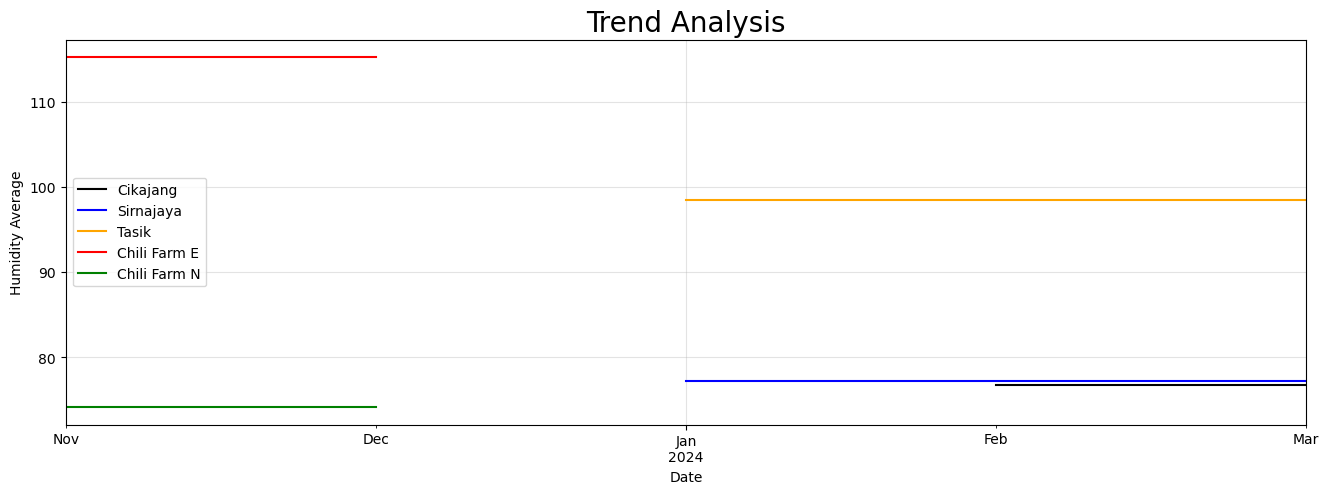

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
res_hum_Cikajang.trend.plot(label='Cikajang', color='black')
res_hum_Sirnajaya.trend.plot(label='Sirnajaya', color='blue')
res_hum_Tasik.trend.plot(label='Tasik', color='orange')
res_hum_Chilly_Farm_E.trend.plot(label='Chili Farm E', color='red')
res_hum_Chilly_Farm_N.trend.plot(label='Chili Farm N', color='green')
plt.legend(loc='center left')
plt.title("Trend Analysis", fontsize=20)
plt.ylabel("Humidity Average")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()
#fig.savefig('trend_UK.png', dpi=300, orientation='landscape',bbox_inches='tight',frameon=None, transparent=True)

## Analysis of Compasion between BMKG and IOT

Now I will check the similarity of the BMKG data with IOT data. IOT data has only recorded data since the end of January 2024, hence we will approach the similarity with average of all data, average of rainy season, and average per month only.<br>
<br>
It'll be easier this way since we don't have long enough data to check the trend and seasonal of IOT data.

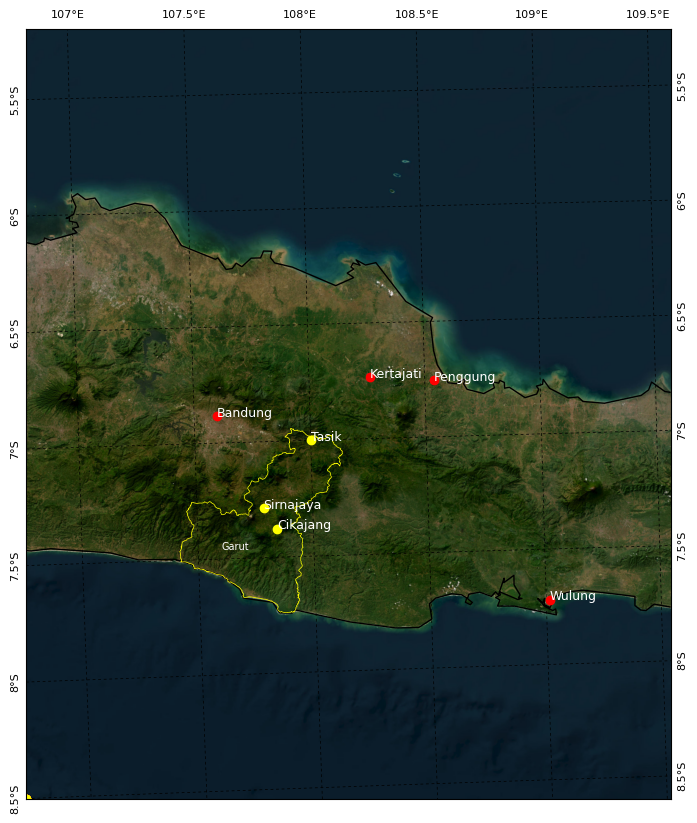

In [ ]:
m = Basemap(llcrnrlon = 106.721, llcrnrlat = -8.5, urcrnrlon = 109.6, urcrnrlat = -5.255,\
            projection='merc',resolution='i', epsg=23839)

fig = plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=1.0)
parallels = np.arange(-15,10,0.5) # make latitude lines ever 5 degrees
meridians = np.arange(90,150,.5) # make longitude lines every 5 degrees
m.drawparallels(parallels,labels=[1, 1, 0, 0],linewidth=0.5, dashes=[4, 4],fontsize=8, rotation=90) #lat
m.drawmeridians(meridians,labels=[0, 0, 1, 0],linewidth=0.5, dashes=[4, 4],fontsize=8) #lon
m.readshapefile('D:/dayatani/SHP/SHP_Garut','SHP_Garut', color= 'yellow')
m.arcgisimage(service='World_Imagery', xpixels = 2000, verbose= False)

# Plot text garut
x,y=m(107.6025, -7.4605)
plt.text(x,y,'Garut',color='white', fontsize=7)

'''# Plot basecamp dayatani
x,y=m(107.78394236931925, -7.285305801049848)
plt.plot(x,y,'3',marker='o',color='yellow')
plt.text(x,y,'Basecamp Dayatani',color='white', fontsize=7)'''

for i in range (len(meta_data)):
    x, y = m(meta_data['Longitude'][i], meta_data['Latitude'][i])
    plt.plot(x,y,3,marker='o',color='Red')
    plt.text(x,y,lastWord(meta_data['Station'][i]),color='white', fontsize=9)

for i in range (len(coor_IOT)):
    x, y = m(coor_IOT['Longitude'][i], coor_IOT['Latitude'][i])
    plt.plot(x,y,3,marker='o',color='yellow')
    plt.text(x,y,firstWord(coor_IOT['Station'][i]),color='white', fontsize=9)

fig.savefig('D:/dayatani/data/spatial_coor.png', dpi='figure',
        metadata=None, pad_inches=0.1,bbox_inches='tight')

- Red dots are location of BMKG stations
- Yellow dots are location of IOT stations

Elevation Basecamp Dayatani Garut =~ 1200m (near to Cikajang and Sinarjaya)

In [ ]:
# print location information of IOT stations
coor_IOT

Station  Latitude   Longitude  Elevation
0  Sirnajaya #1 - Device 15 -7.286354  107.787659     1206.0
1   Cikajang #1 - Device 19 -7.376867  107.844459     1374.8
2      Tasik #1 - Device 21 -7.000000  108.000000      652.0

In [ ]:
# Print location information of BMKG stations
meta_data

Station  Latitude  Longitude  Elevation
0            Pos Meteorologi Penggung  -6.75530  108.53904       23.0
1           Stasiun Geofisika Bandung  -6.88356  107.59733      791.0
2       Stasiun Meteorologi Kertajati  -6.73440  108.26300       85.0
3  Stasiun Meteorologi Tunggul Wulung  -7.71890  109.01490        8.0

We can see that the closest location of BMKG station from our basecamp is Stasiun Geofisika Ckajang.

Tavg in iot data
- old ver chili farm E =~ 23
- Old Ver, Chilly Farm N =~ 23
- Cikajang =~ 22.5
- Sinarjaya =~22.7
- Tasik =~ 27

Considering the data is collected in rainy season (January-February), the temperature average must be higher than in dry season. It seems that these data mean are close to Ckajang data. But still it is needed to check the monthly mean to check the correlation of IOT data and BMKG data.

#### Check Monthly Mean (especially January, February, and March)

In [ ]:
%who

ALLOW_THREADS	 AbstractContextManager	 Annotation	 Arrow	 Artist	 AutoLocator	 Axes	 AxisError	 BUFSIZE	 
Bandung_met	 Bandung_met_copy	 Bandung_rev	 Bandung_rev2	 Basemap	 BitGenerator	 Button	 CLIP	 Chilly_Farm_E_met	 
Chilly_Farm_E_met_copy	 Chilly_Farm_N_met	 Chilly_Farm_N_met_copy	 Cikajang_met	 Cikajang_met_copy	 Circle	 ComplexWarning	 DAILY	 DataSource	 
DateFormatter	 DateLocator	 DayLocator	 ERR_CALL	 ERR_DEFAULT	 ERR_IGNORE	 ERR_LOG	 ERR_PRINT	 ERR_RAISE	 
ERR_WARN	 Enum	 ExitStack	 FLOATING_POINT_SUPPORT	 FPE_DIVIDEBYZERO	 FPE_INVALID	 FPE_OVERFLOW	 FPE_UNDERFLOW	 FR	 
False_	 Figure	 FigureBase	 FigureCanvasBase	 FigureManagerBase	 FixedFormatter	 FixedLocator	 FormatStrFormatter	 Formatter	 
FuncFormatter	 Generator	 GridSpec	 HOURLY	 HourLocator	 IndexLocator	 Inf	 Infinity	 Kertajati_met	 
Kertajati_met_copy	 Kertajati_rev	 LinAlgError	 Line2D	 LinearLocator	 LinearRegression	 Locator	 LogFormatter	 LogFormatterExponent	 
LogFormatterMathtext	 LogLocator	 MAXDIMS	 MAY_S

##### BMKG
- Bandung_met_copy
- Kertajati_met_copy
- Penggung_met_copy
- Wulung_met_copy

In [ ]:
Bandung_mon_mean=Bandung_met_copy['Tavg'].groupby([Bandung_met_copy.index.month]).mean()
Penggung_mon_mean=Kertajati_met_copy['Tavg'].groupby([Kertajati_met_copy.index.month]).mean()
Kertajati_mon_mean=Penggung_met_copy['Tavg'].groupby([Penggung_met_copy.index.month]).mean()
Wulung_mon_mean=Wulung_met_copy['Tavg'].groupby([Wulung_met_copy.index.month]).mean()

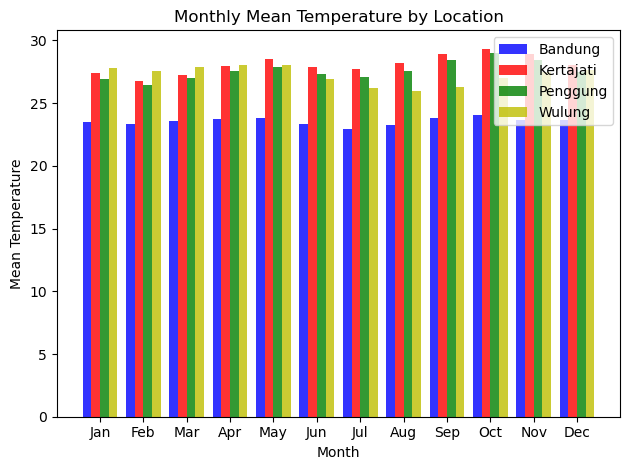

In [ ]:
# Number of groups and bar width
n_groups = 12
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(n_groups)
bar_positions = [index + bar_width*i for i in range(4)] # contains 4 stations

# Plotting the bars
fig, ax = plt.subplots()
for i, (mon_mean, color, label) in enumerate(zip([Bandung_mon_mean, Kertajati_mon_mean,
                                                   Penggung_mon_mean, Wulung_mon_mean],
                                                  ['b', 'r', 'g', 'y'],
                                                  ['Bandung', 'Kertajati', 'Penggung', 'Wulung'])):
    ax.bar(bar_positions[i], mon_mean, bar_width, alpha=0.8, color=color, label=label)

# Adding labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Mean Temperature')
ax.set_title('Monthly Mean Temperature by Location')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
Bandung_mon_mean=Bandung_met_copy['RH_avg'].groupby([Bandung_met_copy.index.month]).mean()
Penggung_mon_mean=Kertajati_met_copy['RH_avg'].groupby([Kertajati_met_copy.index.month]).mean()
Kertajati_mon_mean=Penggung_met_copy['RH_avg'].groupby([Penggung_met_copy.index.month]).mean()
Wulung_mon_mean=Wulung_met_copy['RH_avg'].groupby([Wulung_met_copy.index.month]).mean()

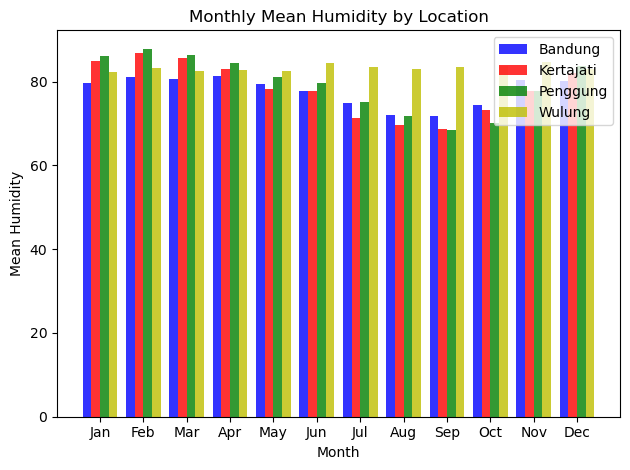

In [ ]:
# Number of groups and bar width
n_groups = 12
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(n_groups)
bar_positions = [index + bar_width*i for i in range(4)] # contains 4 stations

# Plotting the bars
fig, ax = plt.subplots()
for i, (mon_mean, color, label) in enumerate(zip([Bandung_mon_mean, Kertajati_mon_mean,
                                                   Penggung_mon_mean, Wulung_mon_mean],
                                                  ['b', 'r', 'g', 'y'],
                                                  ['Bandung', 'Kertajati', 'Penggung', 'Wulung'])):
    ax.bar(bar_positions[i], mon_mean, bar_width, alpha=0.8, color=color, label=label)

# Adding labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Mean Humidity')
ax.set_title('Monthly Mean Humidity by Location')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
Bandung_mon_mean=Bandung_met_copy['RR'].groupby([Bandung_met_copy.index.month]).mean()
Penggung_mon_mean=Kertajati_met_copy['RR'].groupby([Kertajati_met_copy.index.month]).mean()
Kertajati_mon_mean=Penggung_met_copy['RR'].groupby([Penggung_met_copy.index.month]).mean()
Wulung_mon_mean=Wulung_met_copy['RR'].groupby([Wulung_met_copy.index.month]).mean()

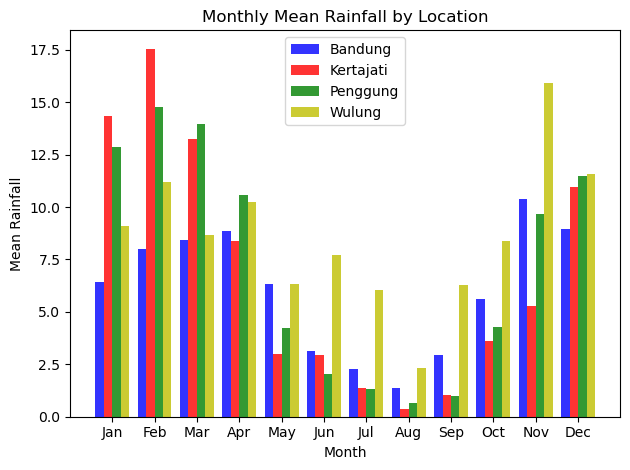

In [ ]:
# Number of groups and bar width
n_groups = 12
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(n_groups)
bar_positions = [index + bar_width*i for i in range(4)] # contains 4 stations

# Plotting the bars
fig, ax = plt.subplots()
for i, (mon_mean, color, label) in enumerate(zip([Bandung_mon_mean, Kertajati_mon_mean,
                                                   Penggung_mon_mean, Wulung_mon_mean],
                                                  ['b', 'r', 'g', 'y'],
                                                  ['Bandung', 'Kertajati', 'Penggung', 'Wulung'])):
    ax.bar(bar_positions[i], mon_mean, bar_width, alpha=0.8, color=color, label=label)

# Adding labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Mean Rainfall')
ax.set_title('Monthly Mean Rainfall by Location')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### IOT
- Chilly_Farm_E_met_copy
- Chilly_Farm_N_met_copy
- Cikajang_met_copy
- Sirnajaya_met_copy
- Tasik_met_copy

##### Temperature

In [ ]:
Chilly_Farm_E_mon_mean=Chilly_Farm_E_met_copy['Temperature'].resample('M').mean()
Chilly_Farm_N_mon_mean=Chilly_Farm_N_met_copy['Temperature'].resample('M').mean()
Cikajang_mon_mean=Cikajang_met_copy['Temperature'].resample('M').mean()
Sirnajaya_mon_mean=Sirnajaya_met_copy['Temperature'].resample('M').mean()
Tasik_met_mon_mean=Tasik_met_copy['Temperature'].resample('M').mean()

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3789634546.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Chilly_Farm_E_mon_mean=Chilly_Farm_E_met_copy['Temperature'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3789634546.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Chilly_Farm_N_mon_mean=Chilly_Farm_N_met_copy['Temperature'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3789634546.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Cikajang_mon_mean=Cikajang_met_copy['Temperature'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\3789634546.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Sirnajaya_mon_mean=Sirnajaya_met_copy['Temperature'].resample('M').mean()
C:\Users\sashu\AppData

In [ ]:
# Convert timestamp index to only month
Chilly_Farm_E_mon_mean.index = Chilly_Farm_E_mon_mean.index.month
Chilly_Farm_N_mon_mean.index = Chilly_Farm_N_mon_mean.index.month
Cikajang_mon_mean.index = Cikajang_mon_mean.index.month
Sirnajaya_mon_mean.index = Sirnajaya_mon_mean.index.month
Tasik_met_mon_mean.index = Tasik_met_mon_mean.index.month

# Create a new DataFrame with all months and NaN temperatures
all_months = range(1, 13)
Chilly_Farm_E_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Temperature'])
Chilly_Farm_N_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Temperature'])
Cikajang_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Temperature'])
Sirnajaya_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Temperature'])
Tasik_met_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Temperature'])

# Update the Data Frame with the available temperatures
Chilly_Farm_E_mon_mean_12.update(Chilly_Farm_E_mon_mean)
Chilly_Farm_N_mon_mean_12.update(Chilly_Farm_N_mon_mean)
Cikajang_mon_mean_12.update(Cikajang_mon_mean)
Sirnajaya_mon_mean_12.update(Sirnajaya_mon_mean)
Tasik_met_mon_mean_12.update(Tasik_met_mon_mean)

# replace nan value with zero (to plot the monthly mean)
Chilly_Farm_E_mon_mean_12.fillna(0, inplace=True)
Chilly_Farm_N_mon_mean_12.fillna(0, inplace=True)
Cikajang_mon_mean_12.fillna(0, inplace=True)
Sirnajaya_mon_mean_12.fillna(0, inplace=True)
Tasik_met_mon_mean_12.fillna(0, inplace=True)

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2028800774.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chilly_Farm_E_mon_mean_12.fillna(0, inplace=True)
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2028800774.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chilly_Farm_N_mon_mean_12.fillna(0, inplace=True)
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\2028800774.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) inst

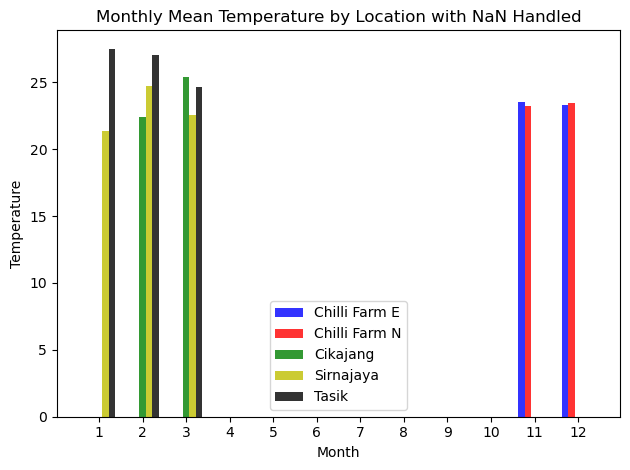

In [ ]:
# Now let's plot using the filled data
fig, ax = plt.subplots()

# Number of locations and bar width
n_locations = 5 # contains 5 stations
bar_width = 0.15

# Set the positions of the bars on the x-axis
all_months = range(1, 13)
index = np.arange(len(all_months))  # Assuming all_months is a list of month numbers
bar_positions = [index + bar_width * i for i in range(n_locations)]

colors = ['b', 'r', 'g', 'y', 'k']
labels = ['Chilli Farm E', 'Chilli Farm N', 'Cikajang', 'Sirnajaya', 'Tasik']

# Plotting the bars
for i, (df, color, label) in enumerate(zip([Chilly_Farm_E_mon_mean_12, Chilly_Farm_N_mon_mean_12,
                                            Cikajang_mon_mean_12, Sirnajaya_mon_mean_12, Tasik_met_mon_mean_12],
                                           colors, labels)):
    ax.bar(bar_positions[i], df['Temperature'], bar_width, alpha=0.8, color=color, label=label)

# Adding labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title('Monthly Mean Temperature by Location with NaN Handled')
ax.set_xticks(index + bar_width * (n_locations - 1) / 2)
ax.set_xticklabels(all_months)
ax.legend()

plt.tight_layout()
plt.show()

##### Humidity

In [ ]:
Chilly_Farm_E_mon_mean=Chilly_Farm_E_met_copy['Humidity'].resample('M').mean()
Chilly_Farm_N_mon_mean=Chilly_Farm_N_met_copy['Humidity'].resample('M').mean()
Cikajang_mon_mean=Cikajang_met_copy['Humidity'].resample('M').mean()
Sirnajaya_mon_mean=Sirnajaya_met_copy['Humidity'].resample('M').mean()
Tasik_met_mon_mean=Tasik_met_copy['Humidity'].resample('M').mean()

# Convert timestamp index to only month
Chilly_Farm_E_mon_mean.index = Chilly_Farm_E_mon_mean.index.month
Chilly_Farm_N_mon_mean.index = Chilly_Farm_N_mon_mean.index.month
Cikajang_mon_mean.index = Cikajang_mon_mean.index.month
Sirnajaya_mon_mean.index = Sirnajaya_mon_mean.index.month
Tasik_met_mon_mean.index = Tasik_met_mon_mean.index.month

# Create a new DataFrame with all months and NaN temperatures
all_months = range(1, 13)
Chilly_Farm_E_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Humidity'])
Chilly_Farm_N_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Humidity'])
Cikajang_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Humidity'])
Sirnajaya_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Humidity'])
Tasik_met_mon_mean_12 = pd.DataFrame(index=all_months, columns=['Humidity'])

# Update the Data Frame with the available temperatures
Chilly_Farm_E_mon_mean_12.update(Chilly_Farm_E_mon_mean)
Chilly_Farm_N_mon_mean_12.update(Chilly_Farm_N_mon_mean)
Cikajang_mon_mean_12.update(Cikajang_mon_mean)
Sirnajaya_mon_mean_12.update(Sirnajaya_mon_mean)
Tasik_met_mon_mean_12.update(Tasik_met_mon_mean)

# replace nan value with zero (to plot the monthly mean)
Chilly_Farm_E_mon_mean_12.fillna(0, inplace=True)
Chilly_Farm_N_mon_mean_12.fillna(0, inplace=True)
Cikajang_mon_mean_12.fillna(0, inplace=True)
Sirnajaya_mon_mean_12.fillna(0, inplace=True)
Tasik_met_mon_mean_12.fillna(0, inplace=True)

C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1667777386.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Chilly_Farm_E_mon_mean=Chilly_Farm_E_met_copy['Humidity'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1667777386.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Chilly_Farm_N_mon_mean=Chilly_Farm_N_met_copy['Humidity'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1667777386.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Cikajang_mon_mean=Cikajang_met_copy['Humidity'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\ipykernel_6924\1667777386.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Sirnajaya_mon_mean=Sirnajaya_met_copy['Humidity'].resample('M').mean()
C:\Users\sashu\AppData\Local\Temp\

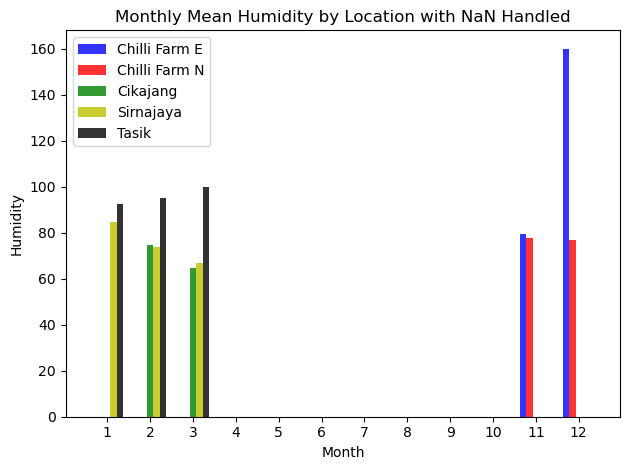

In [ ]:
# Now let's plot using the filled data
fig, ax = plt.subplots()

# Number of locations and bar width
n_locations = 5 # contains 5 stations
bar_width = 0.15

# Set the positions of the bars on the x-axis
all_months = range(1, 13)
index = np.arange(len(all_months))  # Assuming all_months is a list of month numbers
bar_positions = [index + bar_width * i for i in range(n_locations)]

colors = ['b', 'r', 'g', 'y', 'k']
labels = ['Chilli Farm E', 'Chilli Farm N', 'Cikajang', 'Sirnajaya', 'Tasik']

# Plotting the bars
for i, (df, color, label) in enumerate(zip([Chilly_Farm_E_mon_mean_12, Chilly_Farm_N_mon_mean_12,
                                            Cikajang_mon_mean_12, Sirnajaya_mon_mean_12, Tasik_met_mon_mean_12],
                                           colors, labels)):
    ax.bar(bar_positions[i], df['Humidity'], bar_width, alpha=0.8, color=color, label=label)

# Adding labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Humidity')
ax.set_title('Monthly Mean Humidity by Location with NaN Handled')
ax.set_xticks(index + bar_width * (n_locations - 1) / 2)
ax.set_xticklabels(all_months)
ax.legend()

plt.tight_layout()
plt.show()

# Seasonal Patterns

Using harmonic analysis and moving average

Harmonic analysis is a branch of mathematics, which includes theories of trigonometric series (Fourier Series), Fourier transformations, function approximation by trigonometric polynomials, almost periodic functions, and also a generalization of these notions in connection with general problems of the theory of functions and functional analysis.

Each periodic function f(t) having a period T and satisfying Dirichlet's conditions (a discontinuity of the first kind, a finite and a countable number of extremums in a period) can be represented (expanded) in the form of a sum of an infinite number of sinusoidal functio. (Source : Thermopedia)ns

A moving average is a statistic that captures the average change in a data series over time. (Source : investopedia)

In [ ]:
def harmonic_analysis(data):
    n=len(data)
    t = np.linspace(1, n, n)

    #Defining empty matrices A and B to find the values of C and theta.
    A=np.empty([int(n/2)])
    B=np.empty([int(n/2)])

    # Calculating the values of A and B for each wave number using the sine-cosine approach by summing over each time interval.
    for k in range(1,int(np.fix(n/2))+1):
        x2 = data*np.sin(2*np.pi*k*t/n)
        B[k-1]=(2/n)*sum(x2);

    for k in range(1,int(np.fix(n/2))+1):
        x1 = data*np.cos(2*np.pi*k*t/n)
        A[k-1]=(2/n)*sum(x1);

    # calculate the C and theta
    C=sqrt((A**2)+(B**2))
    k=np.arange(0,int(n/2))

    return k, C, n

In [ ]:
def movaverage(data, NF):  #fungsi moving average data T , periode 'NF'
    chlen = len(data)
    NF = 2*round(NF/2)
    B = np.ones(chlen-NF)

    for n in range(int(NF/2)+1,(chlen-int(NF/2))+1):
        B[(n-int(NF/2))-1] = np.nanmean(data[(n-int(NF/2))-1:(n+int(NF/2))-1])  #moving average dengan periode NF

    A = np.nan*data
    A[(int(NF/2)+1)-1:(chlen-int(NF/2))] = B
    return A

## BMKG

### Normalisation

In [ ]:
# Bandung
var_bar=np.nanmean(Bandung_met_copy['Tavg'])
stdev=np.std(Bandung_met_copy['Tavg'])
Tavg_norm_Bandung=(Bandung_met_copy['Tavg']-var_bar)/stdev

# Kertajati
var_bar=np.nanmean(Kertajati_met_copy['Tavg'])
stdev=np.std(Kertajati_met_copy['Tavg'])
Tavg_norm_Kertajati=(Kertajati_met_copy['Tavg']-var_bar)/stdev

# Penggung
var_bar=np.nanmean(Penggung_met_copy['Tavg'])
stdev=np.std(Penggung_met_copy['Tavg'])
Tavg_norm_Penggung=(Penggung_met_copy['Tavg']-var_bar)/stdev

# Wulung
var_bar=np.nanmean(Wulung_met_copy['Tavg'])
stdev=np.std(Wulung_met_copy['Tavg'])
Tavg_norm_Wulung=(Wulung_met_copy['Tavg']-var_bar)/stdev

Harmonic Analysis to find the most most dominant period from the signal.

### Harmonic Analysis

#### Temperature

Bandung

(-0.01, 100.0)

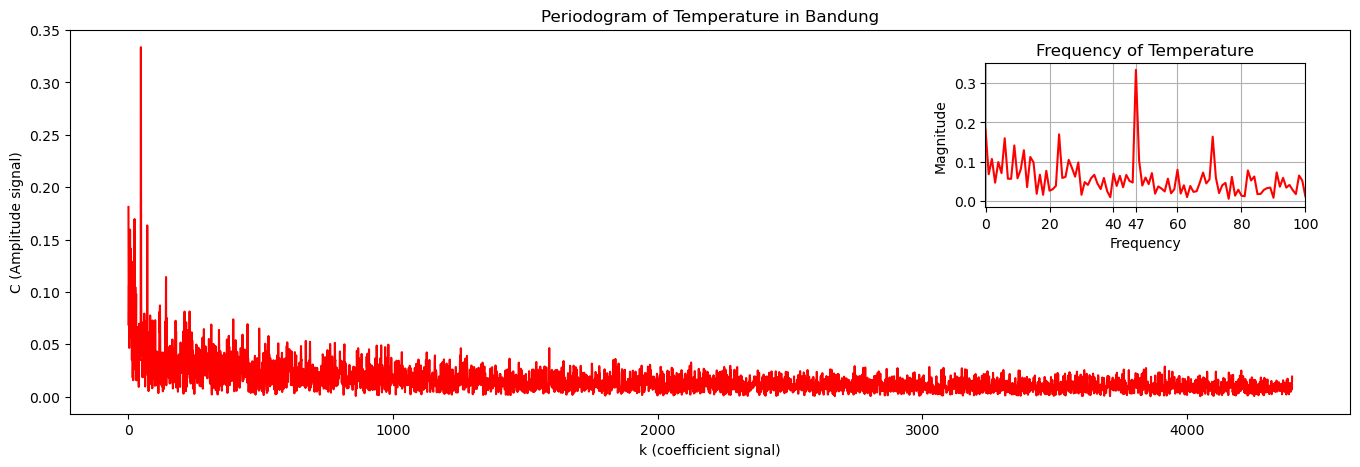

In [ ]:
k_Bandung, C_Bandung, n_Bandung = harmonic_analysis(Bandung_met_copy['Tavg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_Bandung,C_Bandung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Bandung')

ax2.plot(k_Bandung,C_Bandung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.set_xticks([0,20, 40, 47,60,80,100])
ax2.grid()
#label.set_rotation('vertical')
ax2.set_xlim([-0.01,100])

In [ ]:
#periode=n/k
period_Bandung=n_Bandung/np.where(C_Bandung>0.2)[0][0] #will be dropped using MA
period_Bandung

187.17021276595744

Kertajati

(-0.01, 100.0)

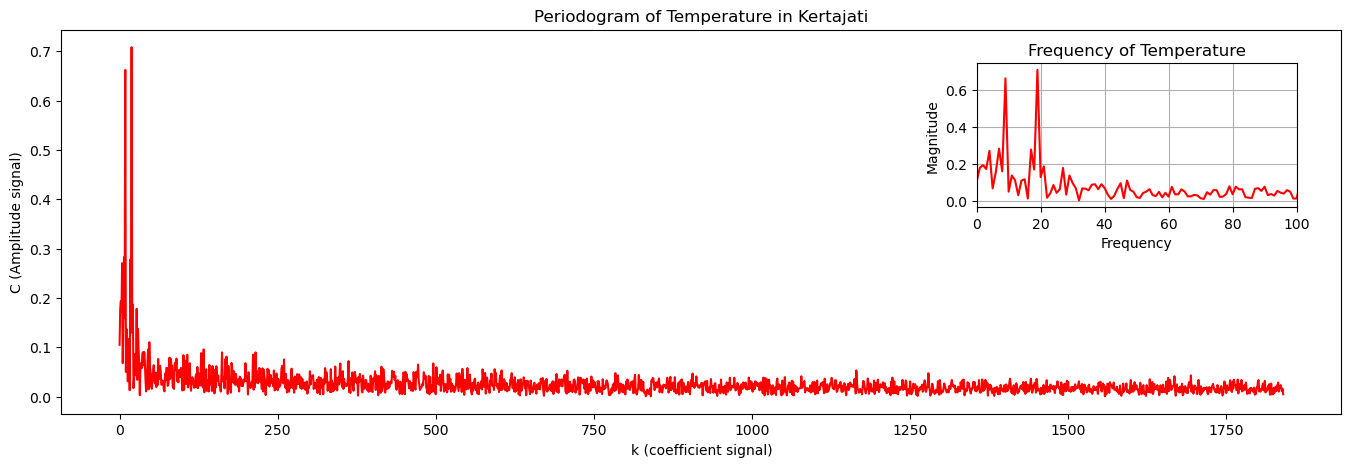

In [ ]:
k_Kertajati, C_Kertajati, n_Kertajati = harmonic_analysis(Kertajati_met_copy['Tavg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_Kertajati,C_Kertajati,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Kertajati')

ax2.plot(k_Kertajati,C_Kertajati,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,100])

In [ ]:
#periode=n/k
period_Kertajati=n_Kertajati/np.where(C_Kertajati>=C_Kertajati.max())[0][0] #will be dropped using MA
np.where(C_Kertajati>=C_Kertajati.max()), period_Kertajati

((array([19], dtype=int64),), 193.8421052631579)

Penggung

(-0.01, 30.0)

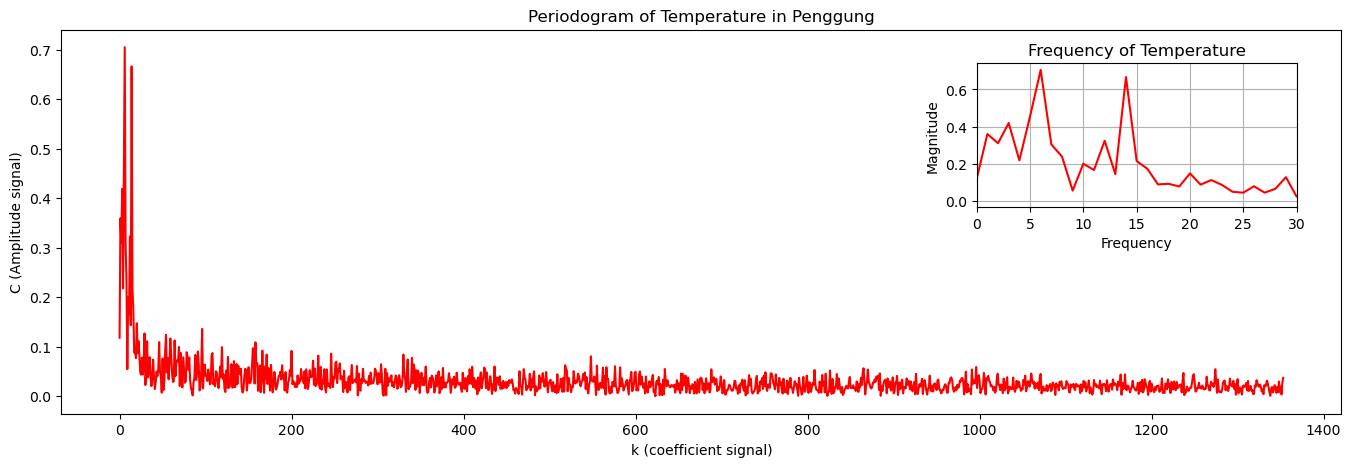

In [ ]:
k_Penggung, C_Penggung, n_Penggung = harmonic_analysis(Penggung_met_copy['Tavg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_Penggung,C_Penggung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Penggung')

ax2.plot(k_Penggung,C_Penggung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,30])

In [ ]:
np.where(C_Penggung>0.5)

(array([ 6, 14], dtype=int64),)

In [ ]:
n_Penggung/14

193.5

In [ ]:
#periode=n/k
period_Penggung=n_Penggung/np.where(C_Penggung>=C_Penggung.max())[0][0] #will be dropped using MA
np.where(C_Penggung>=C_Penggung.max())

(array([6], dtype=int64),)

Wulung

(-0.01, 30.0)

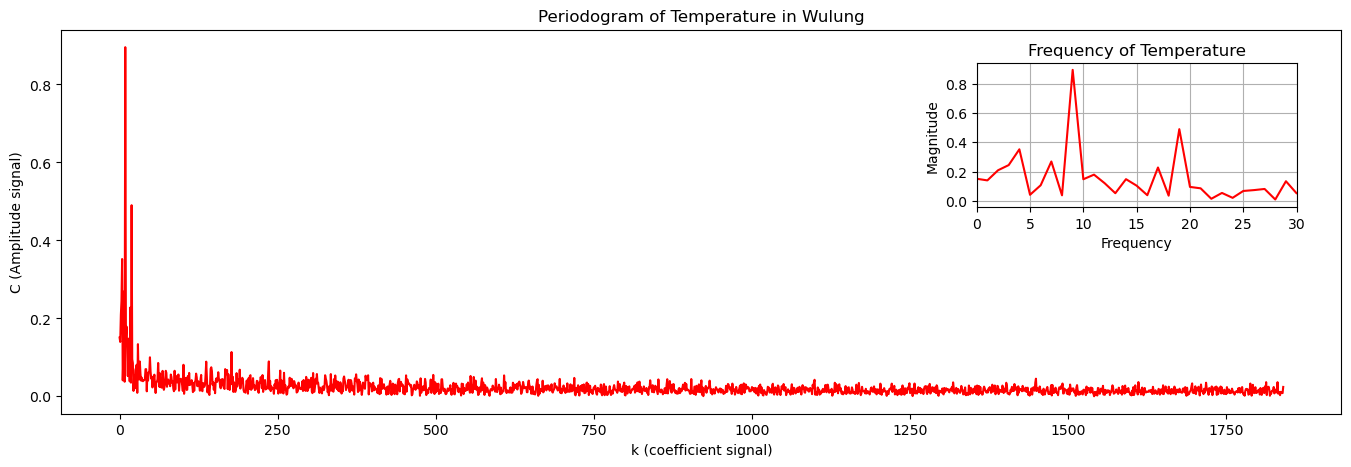

In [ ]:
k_Wulung, C_Wulung, n_Wulung = harmonic_analysis(Wulung_met_copy['Tavg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_Wulung,C_Wulung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Wulung')

ax2.plot(k_Wulung,C_Wulung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,30])

In [ ]:
np.where(C_Wulung>0.3)

(array([ 4,  9, 19], dtype=int64),)

In [ ]:
n_Wulung/19

193.8421052631579

In [ ]:
#periode=n/k
period_Wulung=n_Wulung/np.where(C_Wulung>=C_Wulung.max())[0][0] #will be dropped using MA
np.where(C_Wulung>=C_Wulung.max())

(array([9], dtype=int64),)

#### Humidity

Bandung


(-0.01, 100.0)

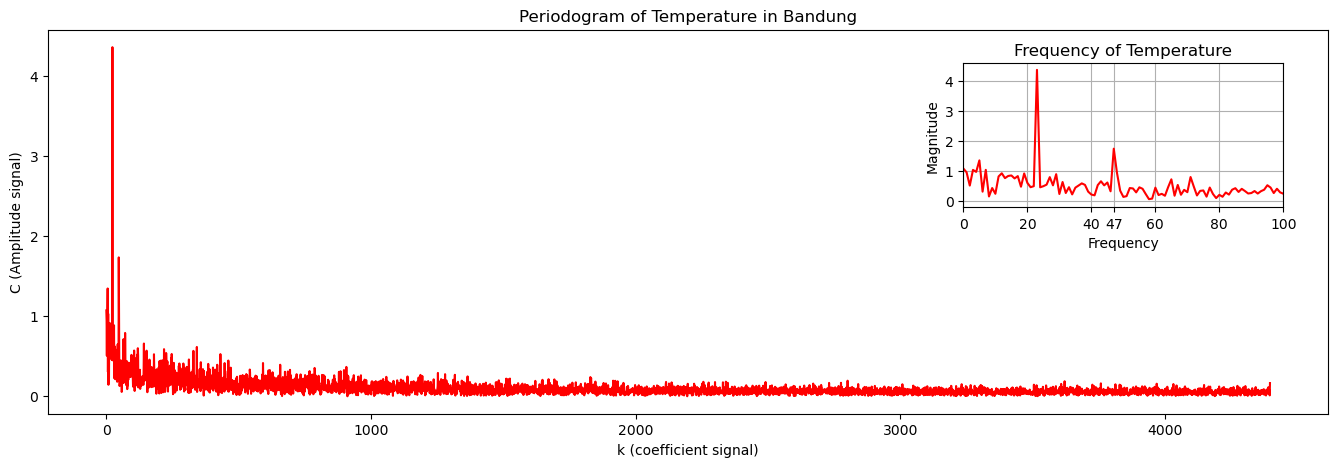

In [ ]:
k_hum_Bandung, C_hum_Bandung, n_hum_Bandung = harmonic_analysis(Bandung_met_copy['RH_avg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_hum_Bandung,C_hum_Bandung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Bandung')

ax2.plot(k_hum_Bandung,C_hum_Bandung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.set_xticks([0,20, 40, 47,60,80,100])
ax2.grid()
#label.set_rotation('vertical')
ax2.set_xlim([-0.01,100])

In [ ]:
#periode=n/k
period_hum_Bandung=n_hum_Bandung/np.where(C_hum_Bandung>2)[0][0] #will be dropped using MA
period_hum_Bandung

382.4782608695652

Kertajati

(-0.01, 100.0)

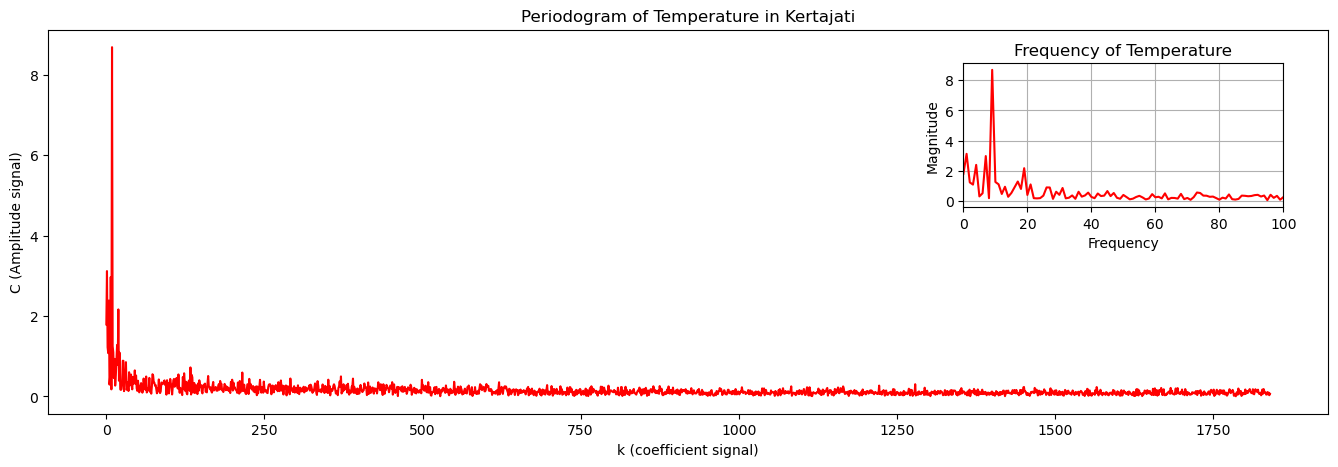

In [ ]:
k_hum_Kertajati, C_hum_Kertajati, n_hum_Kertajati = harmonic_analysis(Kertajati_met_copy['RH_avg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_hum_Kertajati,C_hum_Kertajati,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Kertajati')

ax2.plot(k_hum_Kertajati,C_hum_Kertajati,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,100])

In [ ]:
#periode=n/k
period_hum_Kertajati=n_hum_Kertajati/np.where(C_hum_Kertajati>=C_hum_Kertajati.max())[0][0] #will be dropped using MA
np.where(C_hum_Kertajati>=C_hum_Kertajati.max()), period_hum_Kertajati

((array([9], dtype=int64),), 409.22222222222223)

Penggung

(-0.01, 30.0)

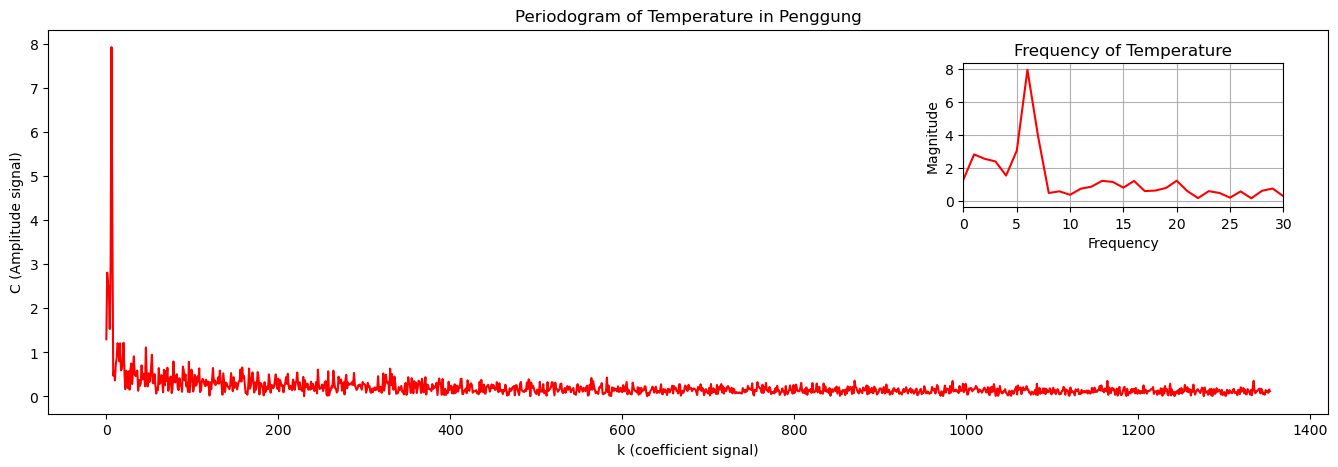

In [ ]:
k_hum_Penggung, C_hum_Penggung, n_hum_Penggung = harmonic_analysis(Penggung_met_copy['RH_avg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_hum_Penggung,C_hum_Penggung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Penggung')

ax2.plot(k_hum_Penggung,C_hum_Penggung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,30])

In [ ]:
np.where(C_hum_Penggung>0.5)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  23,  26,  28,  29,  31,  32,
         33,  35,  36,  41,  43,  44,  46,  49,  52,  53,  56,  61,  67,
         69,  71,  78,  82,  89,  90,  92,  96,  99, 108, 124, 132, 136,
        145, 156, 158, 166, 170, 176, 189, 197, 211, 222, 246, 258, 264,
        288, 322, 330, 332], dtype=int64),)

In [ ]:
n_hum_Penggung/14

193.5

In [ ]:
#periode=n/k
period_hum_Penggung=n_hum_Penggung/np.where(C_hum_Penggung>=C_hum_Penggung.max())[0][0] #will be dropped using MA
np.where(C_hum_Penggung>=C_hum_Penggung.max())

(array([6], dtype=int64),)

Wulung

(-0.01, 30.0)

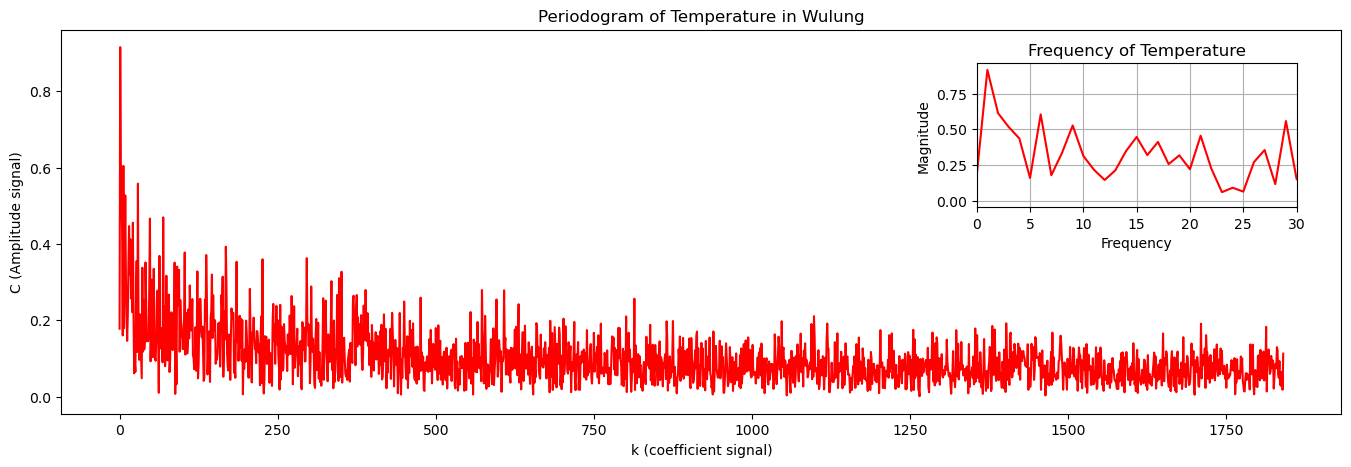

In [ ]:
k_hum_Wulung, C_hum_Wulung, n_hum_Wulung = harmonic_analysis(Wulung_met_copy['RH_avg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_hum_Wulung,C_hum_Wulung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Wulung')

ax2.plot(k_hum_Wulung,C_hum_Wulung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-0.01,30])

In [ ]:
np.where(C_hum_Wulung>0.3)

(array([  1,   2,   3,   4,   6,   8,   9,  10,  14,  15,  16,  17,  19,
         21,  27,  29,  36,  41,  48,  51,  54,  63,  69,  74,  87,  91,
         94, 103, 123, 137, 146, 163, 168, 185, 226, 296, 335, 347, 351],
       dtype=int64),)

In [ ]:
n_hum_Wulung/19

193.8421052631579

In [ ]:
#periode=n/k
period_hum_Wulung=n_hum_Wulung/np.where(C_hum_Wulung>=C_hum_Wulung.max())[0][0] #will be dropped using MA
np.where(C_hum_Wulung>=C_hum_Wulung.max())

(array([1], dtype=int64),)

#### Rainfall

(-0.01, 100.0)

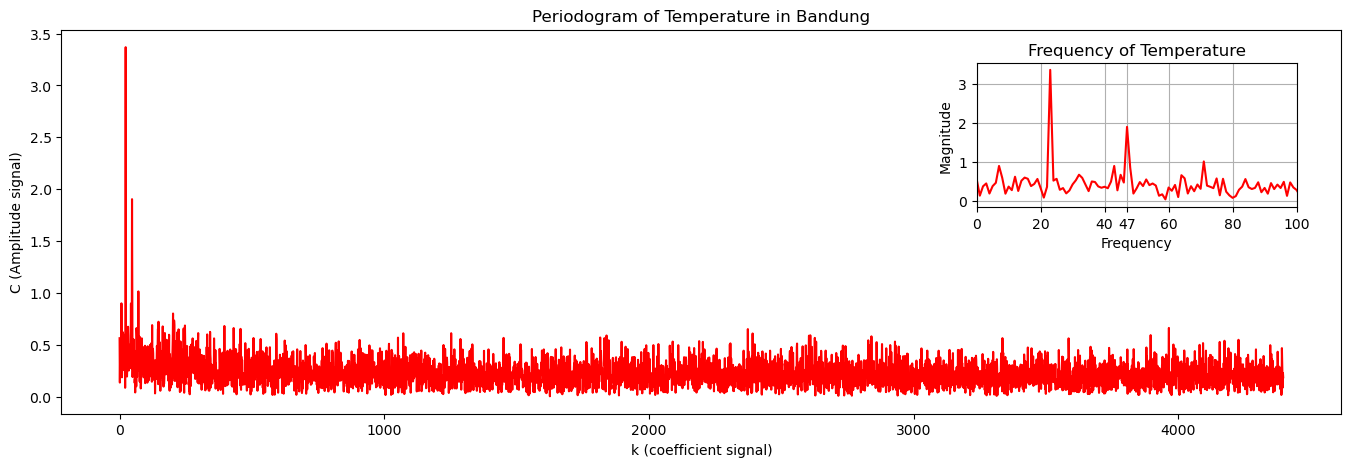

In [ ]:
k_rr_Bandung, C_rr_Bandung, n_rr_Bandung = harmonic_analysis(Bandung_met_copy['RR'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_rr_Bandung,C_rr_Bandung,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Bandung')

ax2.plot(k_rr_Bandung,C_rr_Bandung,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.set_xticks([0,20, 40, 47,60,80,100])
ax2.grid()
#label.set_rotation('vertical')
ax2.set_xlim([-0.01,100])

In [ ]:
#periode=n/k
period_rr_Bandung=n_rr_Bandung/np.where(C_rr_Bandung>=C_rr_Bandung.max())[0][0] #will be dropped using MA
np.where(C_rr_Bandung>=C_rr_Bandung.max()), period_rr_Bandung

((array([23], dtype=int64),), 382.4782608695652)

### Moving Average

#### Temperature

##### Process

In [ ]:
period_Bandung

187.17021276595744

In [ ]:
len(Bandung_met_copy)/4

2199.25

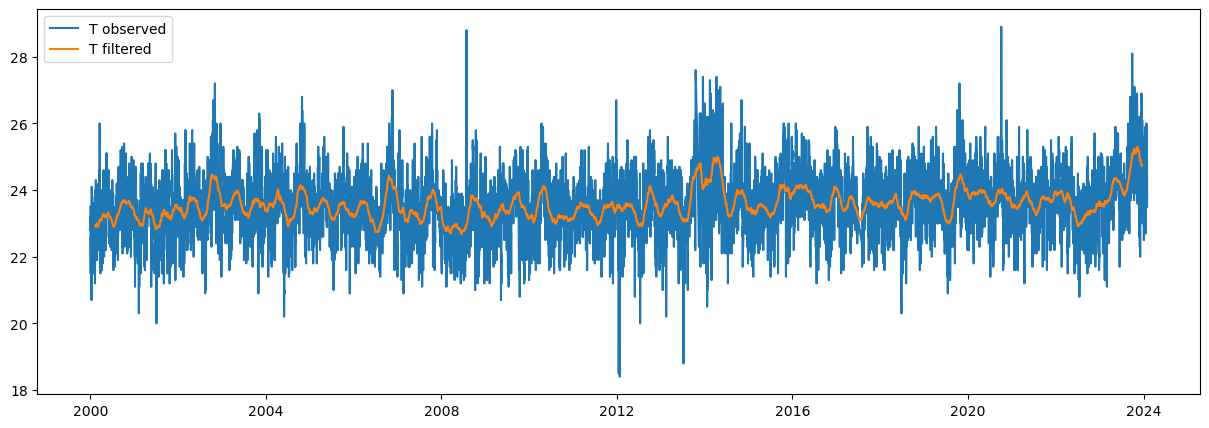

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Bandung=movaverage(Bandung_met_copy['Tavg'], 85)
var_filteranual=Bandung_met_copy['Tavg']-temp_ma_Bandung
plt.plot(Bandung_met_copy['Tavg'])
plt.plot(temp_ma_Bandung)
plt.legend(['T observed','T filtered'])

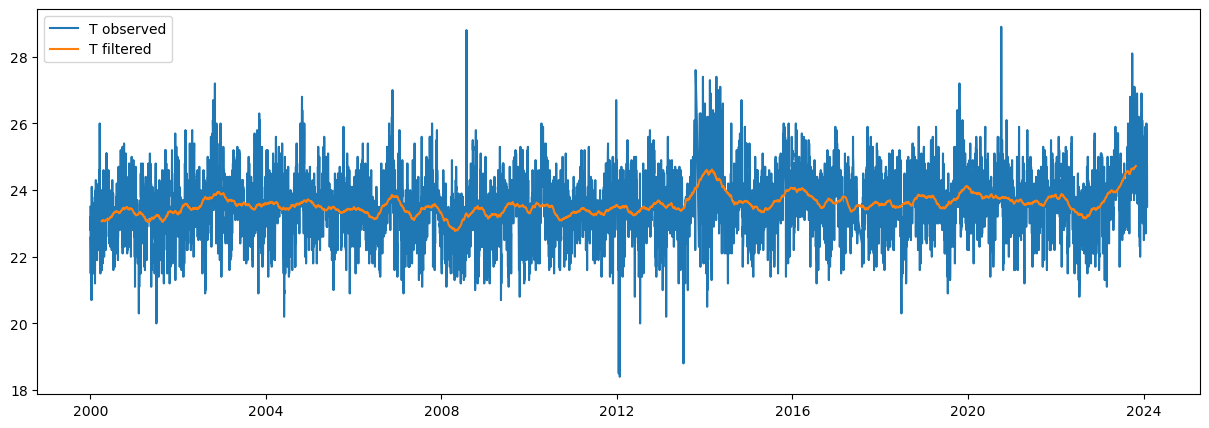

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Bandung=movaverage(Bandung_met_copy['Tavg'], period_Bandung)
var_filteranual=Bandung_met_copy['Tavg']-temp_ma_Bandung
plt.plot(Bandung_met_copy['Tavg'])
plt.plot(temp_ma_Bandung)
plt.legend(['T observed','T filtered'])

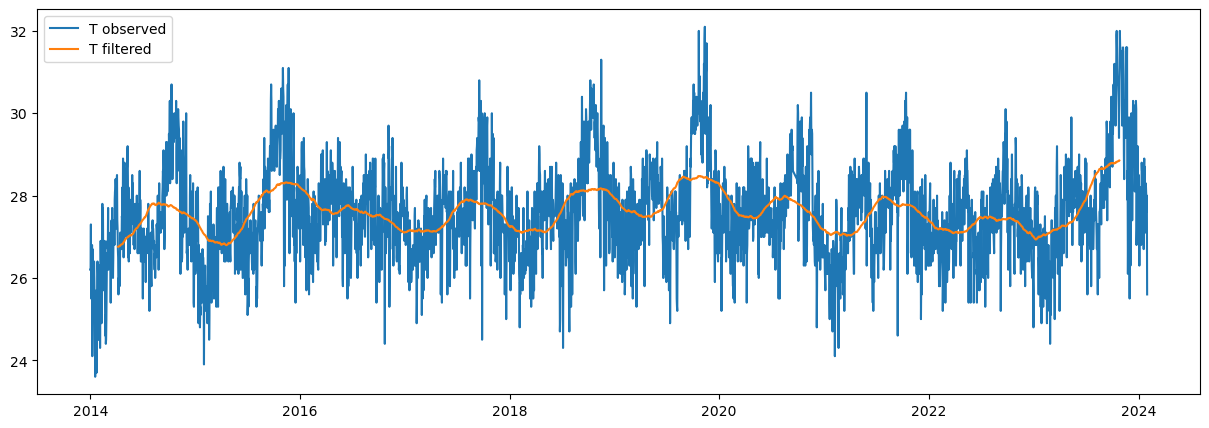

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Kertajati=movaverage(Kertajati_met_copy['Tavg'], period_Kertajati)
var_filteranual=Kertajati_met_copy['Tavg']-temp_ma_Kertajati
plt.plot(Kertajati_met_copy['Tavg'])
plt.plot(temp_ma_Kertajati)
plt.legend(['T observed','T filtered'])

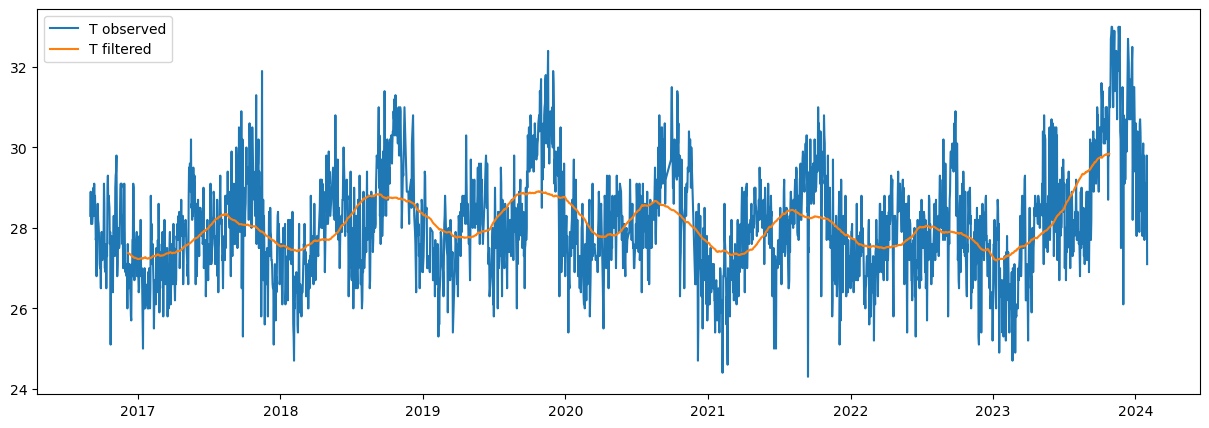

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Penggung=movaverage(Penggung_met_copy['Tavg'], 193.5)
var_filteranual=Penggung_met_copy['Tavg']-temp_ma_Penggung
plt.plot(Penggung_met_copy['Tavg'])
plt.plot(temp_ma_Penggung)
plt.legend(['T observed','T filtered'])

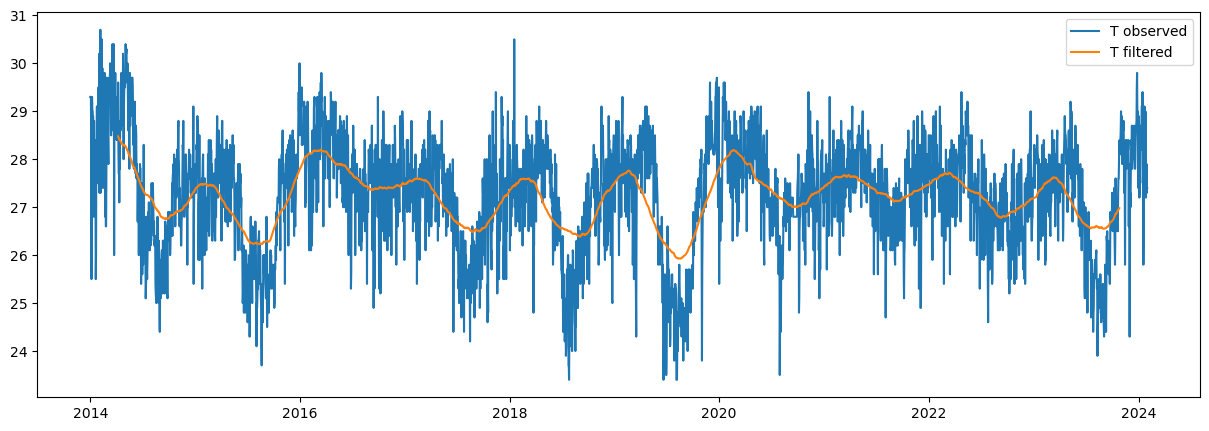

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Wulung=movaverage(Wulung_met_copy['Tavg'], 193.8421052631579)
var_filteranual=Wulung_met_copy['Tavg']-temp_ma_Wulung
plt.plot(Wulung_met_copy['Tavg'])
plt.plot(temp_ma_Wulung)
plt.legend(['T observed','T filtered'])

##### Seasonal All Stations

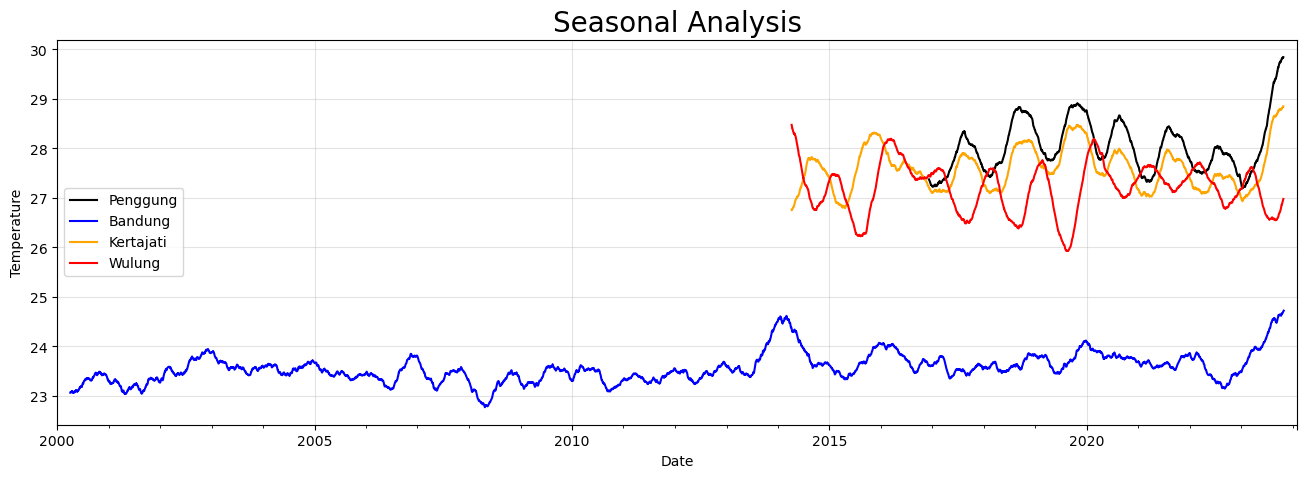

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
temp_ma_Penggung.plot(label='Penggung', color='black')
temp_ma_Bandung.plot(label='Bandung', color='blue')
temp_ma_Kertajati.plot(label='Kertajati', color='orange')
temp_ma_Wulung.plot(label='Wulung', color='red')
plt.legend(loc='center left')
plt.title("Seasonal Analysis", fontsize=20)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()

#### Humidity

##### Process

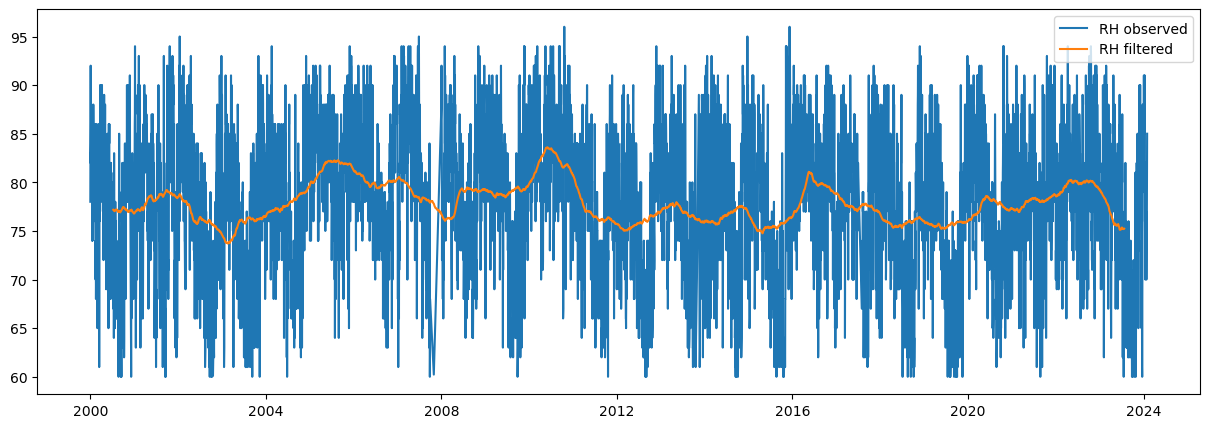

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
humidity_ma_Bandung=movaverage(Bandung_met_copy['RH_avg'], period_hum_Bandung)
var_filteranual=Bandung_met_copy['RH_avg']-humidity_ma_Bandung
plt.plot(Bandung_met_copy['RH_avg'])
plt.plot(humidity_ma_Bandung)
plt.legend(['RH observed','RH filtered'])

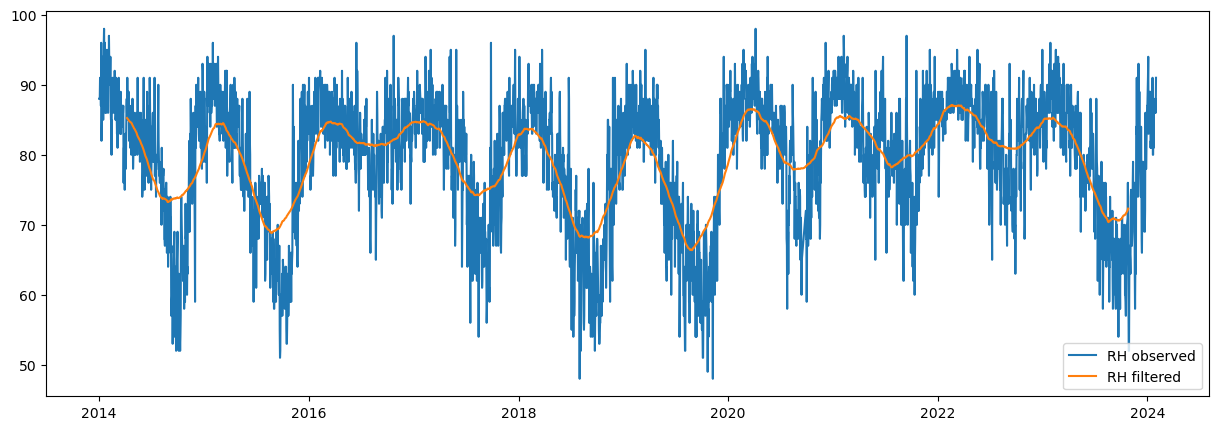

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
humidity_ma_Kertajati=movaverage(Kertajati_met_copy['RH_avg'], period_Kertajati)
var_filteranual=Kertajati_met_copy['RH_avg']-humidity_ma_Kertajati
plt.plot(Kertajati_met_copy['RH_avg'])
plt.plot(humidity_ma_Kertajati)
plt.legend(['RH observed','RH filtered'])

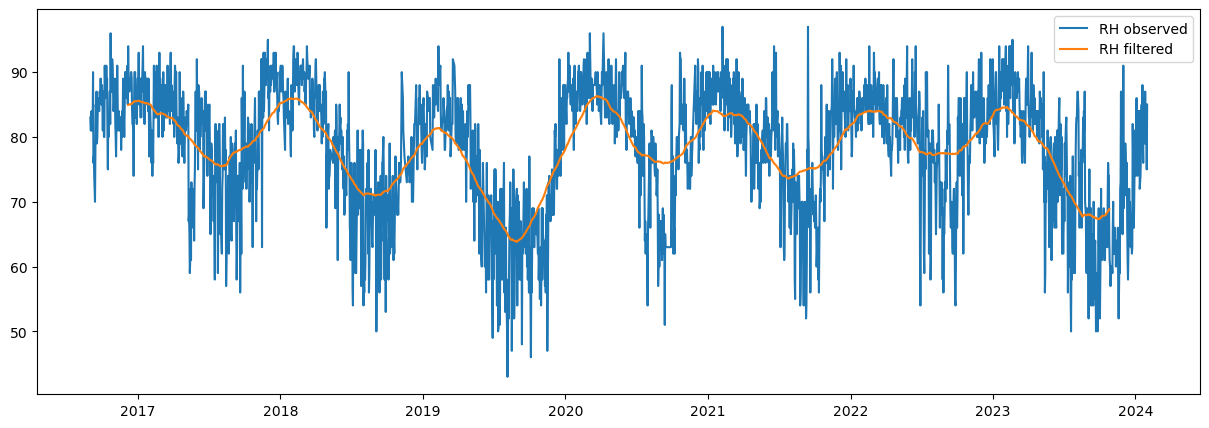

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
humidity_ma_Penggung=movaverage(Penggung_met_copy['RH_avg'], 193.5)
var_filteranual=Penggung_met_copy['RH_avg']-humidity_ma_Penggung
plt.plot(Penggung_met_copy['RH_avg'])
plt.plot(humidity_ma_Penggung)
plt.legend(['RH observed','RH filtered'])

(array([1], dtype=int64),)

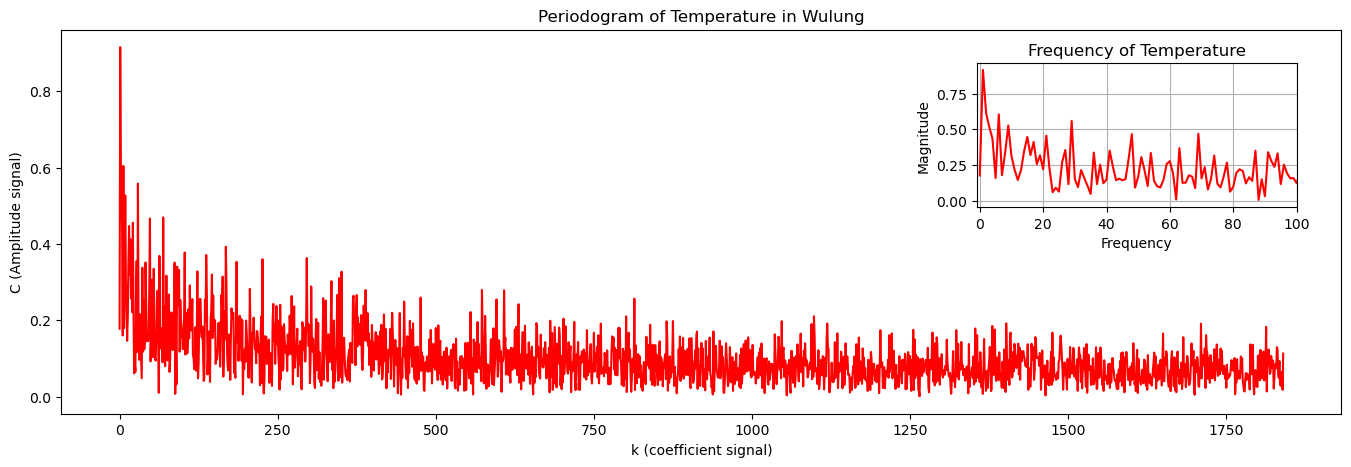

In [ ]:
k_Wulung_rh, C_Wulung_rh, n_Wulung_rh = harmonic_analysis(Wulung_met_copy['RH_avg'])

# Plot periodogram
fig1 = plt.figure()
ax = fig1.add_axes([0, 1, 2, 0.8])
ax2 = fig1.add_axes([1.43,1.43,0.5,0.3])

ax.plot(k_Wulung_rh,C_Wulung_rh,'r')
ax.set_xlabel('k (coefficient signal)')
ax.set_ylabel('C (Amplitude signal)')
ax.set_title('Periodogram of Temperature in Wulung')

ax2.plot(k_Wulung_rh,C_Wulung_rh,'r')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency of Temperature')
ax2.grid()
ax2.set_xlim([-1,100])

#periode=n/k
period_Wulung=n_Wulung_rh/np.where(C_Wulung_rh>=C_Wulung_rh.max())[0][0] #will be dropped using MA
np.where(C_Wulung_rh>=C_Wulung_rh.max())

In [ ]:
np.where(C_Wulung_rh>=0.5)

(array([ 1,  2,  3,  6,  9, 29], dtype=int64),)

In [ ]:
np.where(C_Wulung_rh>0.35)

(array([  1,   2,   3,   4,   6,   9,  15,  17,  21,  27,  29,  41,  48,
         63,  69,  87, 103, 137, 168, 185, 226, 296], dtype=int64),)

In [ ]:
n_Wulung_rh/29

127.0

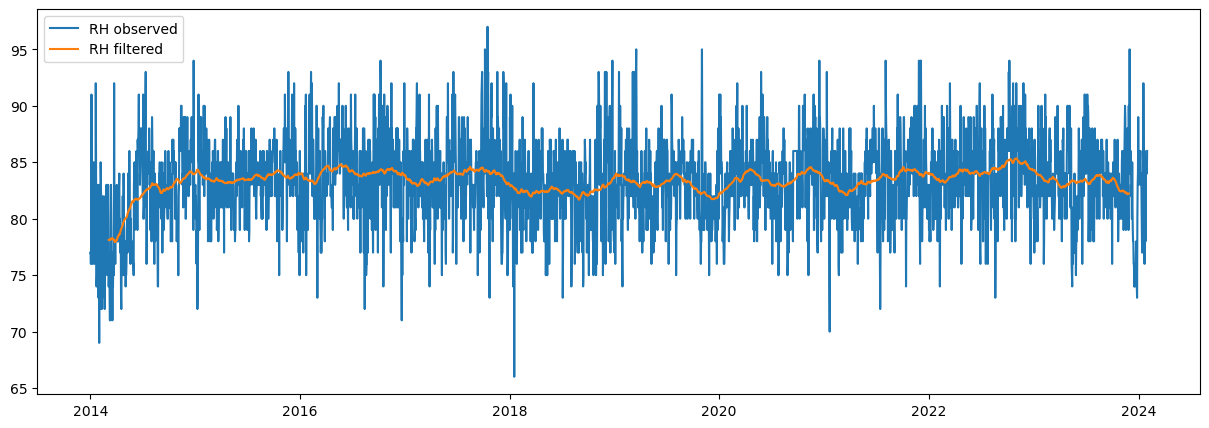

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
humidity_ma_Wulung=movaverage(Wulung_met_copy['RH_avg'], 127)
var_filteranual=Wulung_met_copy['RH_avg']-humidity_ma_Wulung
plt.plot(Wulung_met_copy['RH_avg'])
plt.plot(humidity_ma_Wulung)
plt.legend(['RH observed','RH filtered'])

In [ ]:
%whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
ALLOW_THREADS                int                           1
AbstractContextManager       ABCMeta                       <class 'contextlib.AbstractContextManager'>
Annotation                   type                          <class 'matplotlib.text.Annotation'>
Arrow                        type                          <class 'matplotlib.patches.Arrow'>
Artist                       type                          <class 'matplotlib.artist.Artist'>
AutoLocator                  type                          <class 'matplotlib.ticker.AutoLocator'>
Axes                         type                          <class 'matplotlib.axes._axes.Axes'>
AxisError                    type                          <class 'numpy.exceptions.AxisError'>
BUFSIZE                      int                           8192
Bandung_met                  DataFrame                     

##### Seasonal All Stations

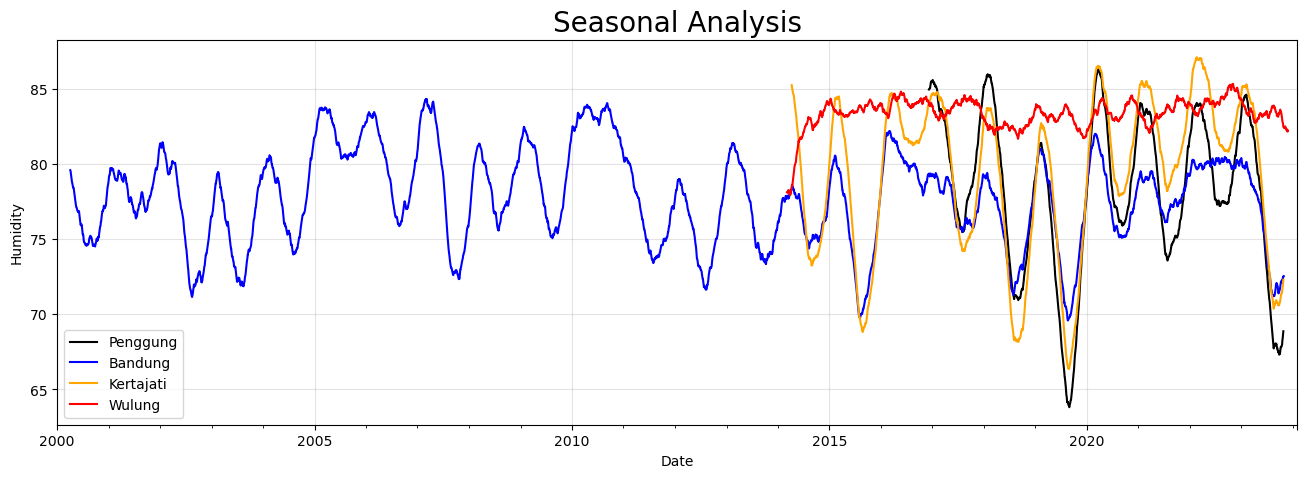

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
humidity_ma_Penggung.plot(label='Penggung', color='black')
humidity_ma_Bandung.plot(label='Bandung', color='blue')
humidity_ma_Kertajati.plot(label='Kertajati', color='orange')
humidity_ma_Wulung.plot(label='Wulung', color='red')
plt.legend(loc='lower left')
plt.title("Seasonal Analysis", fontsize=20)
plt.ylabel("Humidity")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()

#### Rainfall

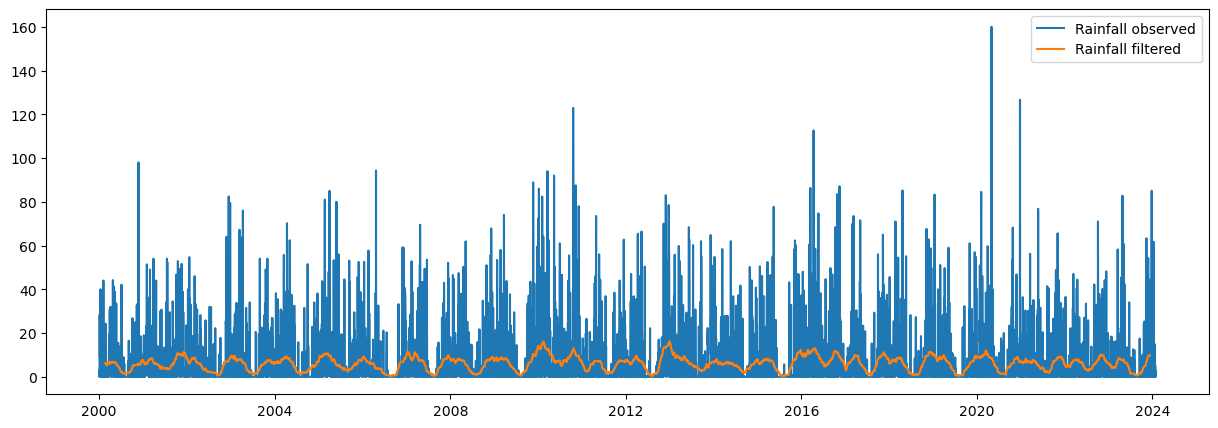

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
rainfall_ma_Bandung=movaverage(Bandung_met_copy['RR'], 100)
var_filteranual=Bandung_met_copy['RR']-rainfall_ma_Bandung
plt.plot(Bandung_met_copy['RR'])
plt.plot(rainfall_ma_Bandung)
plt.legend(['Rainfall observed','Rainfall filtered'])

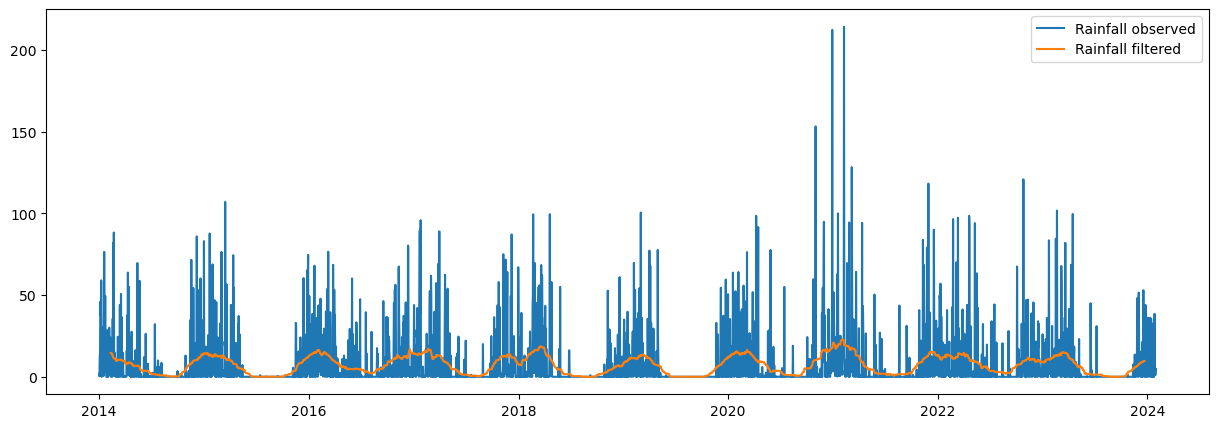

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
rainfall_ma_Kertajati=movaverage(Kertajati_met_copy['RR'], 80)
var_filteranual=Kertajati_met_copy['RR']-rainfall_ma_Kertajati
plt.plot(Kertajati_met_copy['RR'])
plt.plot(rainfall_ma_Kertajati)
plt.legend(['Rainfall observed','Rainfall filtered'])

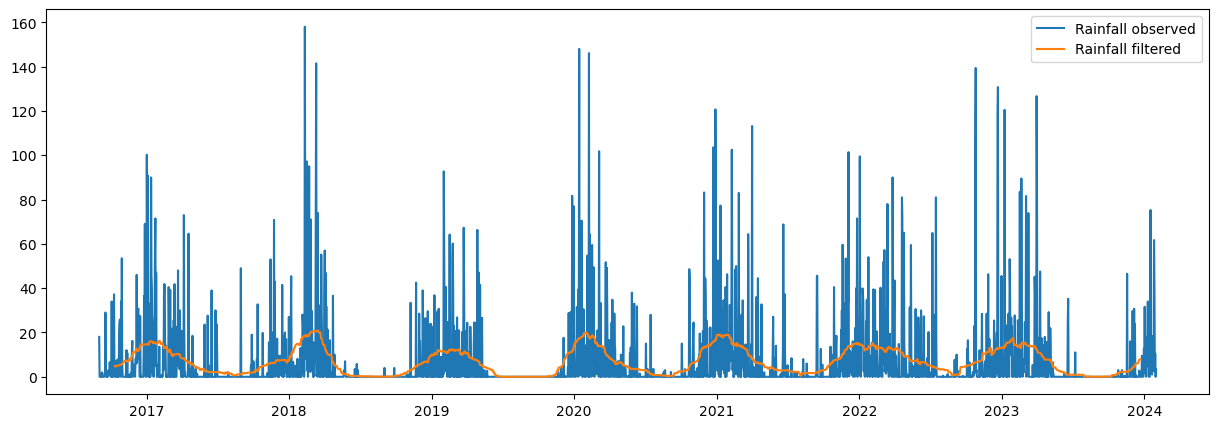

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
rainfall_ma_Penggung=movaverage(Penggung_met_copy['RR'], 80)
var_filteranual=Penggung_met_copy['RR']-rainfall_ma_Penggung
plt.plot(Penggung_met_copy['RR'])
plt.plot(rainfall_ma_Penggung)
plt.legend(['Rainfall observed','Rainfall filtered'])

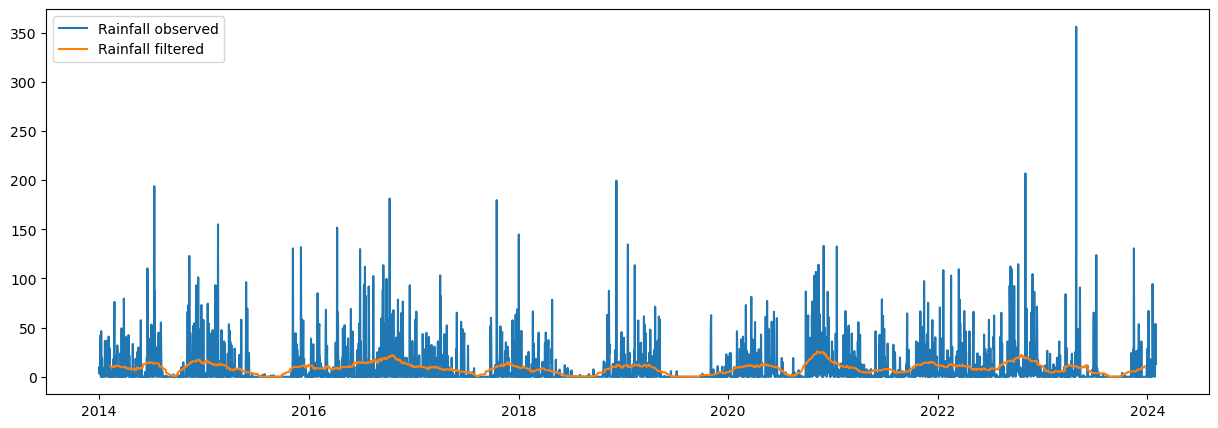

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
rainfall_ma_Wulung=movaverage(Wulung_met_copy['RR'], 80)
var_filteranual=Wulung_met_copy['RR']-rainfall_ma_Wulung
plt.plot(Wulung_met_copy['RR'])
plt.plot(rainfall_ma_Wulung)
plt.legend(['Rainfall observed','Rainfall filtered'])

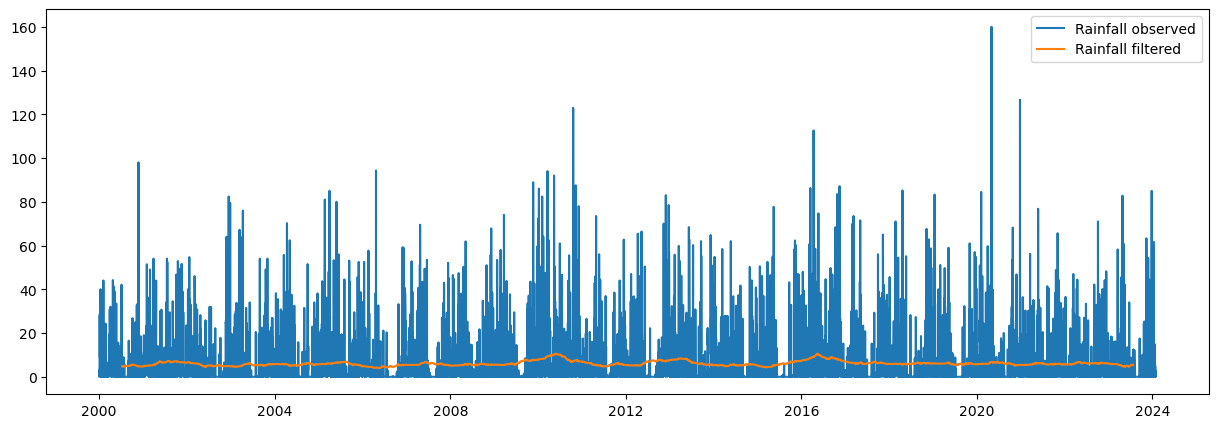

In [ ]:
#fungsi moving average data RH , periode 'NF'
plt.figure(figsize=(15,5))
rainfall_ma_Bandung=movaverage(Bandung_met_copy['RR'], period_rr_Bandung)
var_filteranual=Bandung_met_copy['RR']-rainfall_ma_Bandung
plt.plot(Bandung_met_copy['RR'])
plt.plot(rainfall_ma_Bandung)
plt.legend(['Rainfall observed','Rainfall filtered'])

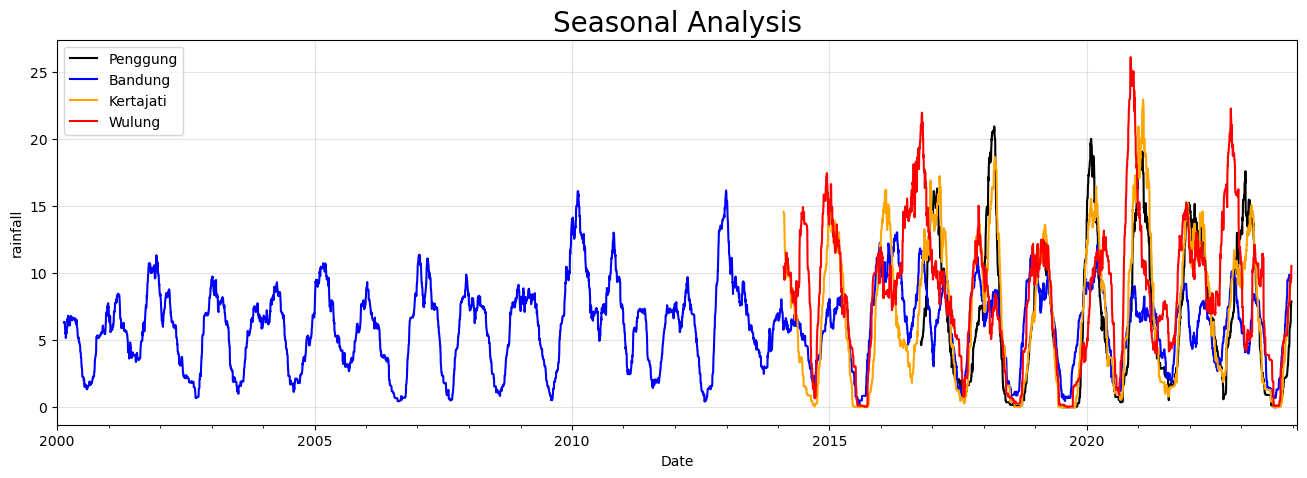

In [ ]:
#Plotting the linear regression of revenue from UK transactions
fig=plt.figure(figsize=[16,5])
rainfall_ma_Penggung.plot(label='Penggung', color='black')
rainfall_ma_Bandung.plot(label='Bandung', color='blue')
rainfall_ma_Kertajati.plot(label='Kertajati', color='orange')
rainfall_ma_Wulung.plot(label='Wulung', color='red')
plt.legend(loc='upper left')
plt.title("Seasonal Analysis", fontsize=20)
plt.ylabel("rainfall")
plt.xlabel("Date")
plt.grid(alpha=0.35)
plt.show()

## IOT

### Normalisation

In [ ]:
# Farm E
var_bar=np.nanmean(Chilly_Farm_E_met_copy['Temperature'])
stdev=np.std(Chilly_Farm_E_met_copy['Temperature'])
Tavg_norm_Farm_E=(Chilly_Farm_E_met_copy['Temperature']-var_bar)/stdev

# Farm N
var_bar=np.nanmean(Chilly_Farm_N_met_copy['Temperature'])
stdev=np.std(Chilly_Farm_N_met_copy['Temperature'])
Tavg_norm_Farm_N=(Chilly_Farm_N_met_copy['Temperature']-var_bar)/stdev

# CIkajang
var_bar=np.nanmean(Cikajang_met_copy['Temperature'])
stdev=np.std(Cikajang_met_copy['Temperature'])
Tavg_norm_Cikajang=(Cikajang_met_copy['Temperature']-var_bar)/stdev

# Sirnajaya
var_bar=np.nanmean(Sirnajaya_met_copy['Temperature'])
stdev=np.std(Sirnajaya_met_copy['Temperature'])
Tavg_norm_Sirnajaya=(Sirnajaya_met_copy['Temperature']-var_bar)/stdev

# Tasik
var_bar=np.nanmean(Tasik_met_copy['Temperature'])
stdev=np.std(Tasik_met_copy['Temperature'])
Tavg_norm_Tasik=(Tasik_met_copy['Temperature']-var_bar)/stdev

### Harmonic Analysis

### Moving Average

#### Temperature

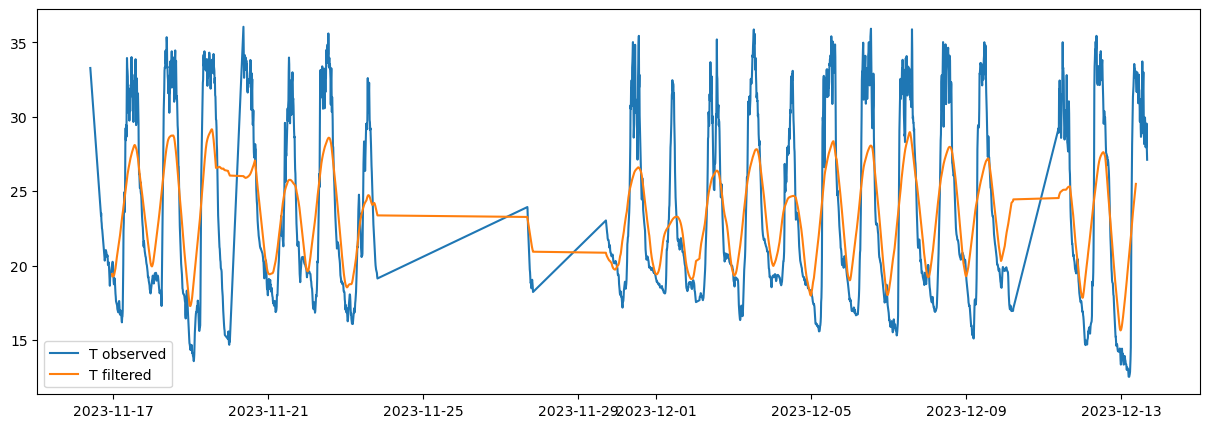

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Chilly_Farm_E=movaverage(Chilly_Farm_E_met_copy['Temperature'], 85)
var_filteranual=Chilly_Farm_E_met_copy['Temperature']-temp_ma_Chilly_Farm_E
plt.plot(Chilly_Farm_E_met_copy['Temperature'])
plt.plot(temp_ma_Chilly_Farm_E)
plt.legend(['T observed','T filtered'])

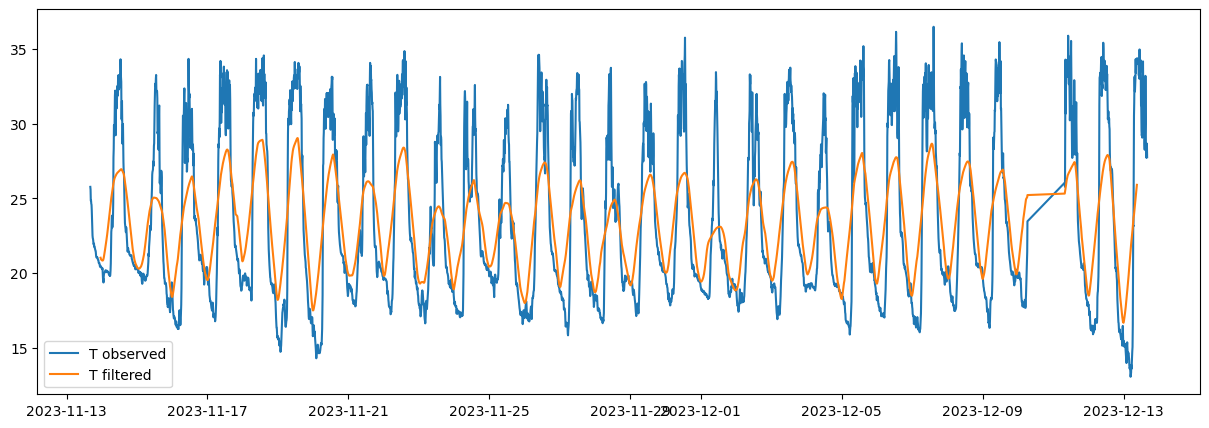

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Chilly_Farm_N=movaverage(Chilly_Farm_N_met_copy['Temperature'], 85)
var_filteranual=Chilly_Farm_N_met_copy['Temperature']-temp_ma_Chilly_Farm_N
plt.plot(Chilly_Farm_N_met_copy['Temperature'])
plt.plot(temp_ma_Chilly_Farm_N)
plt.legend(['T observed','T filtered'])

<Axes: xlabel='Timestamp'>

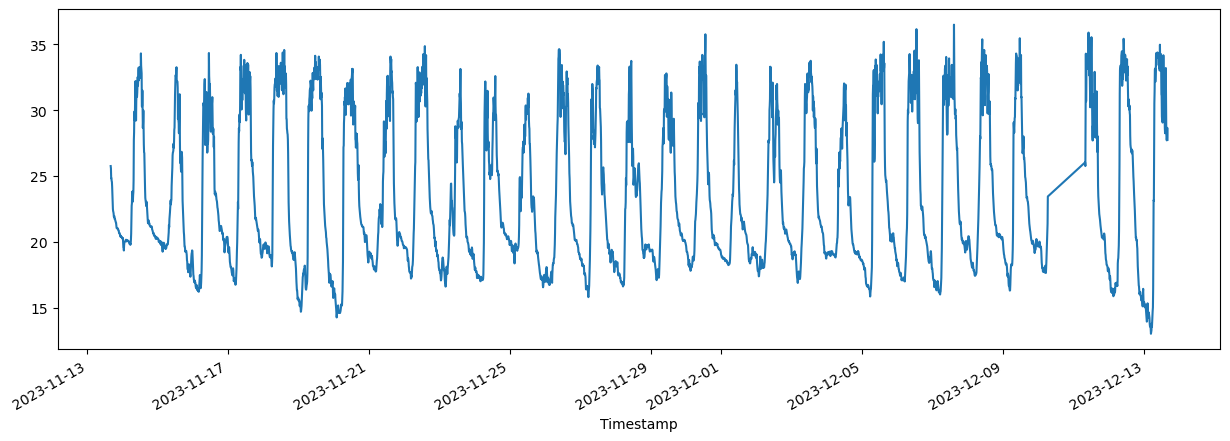

In [ ]:
plt.figure(figsize=(15,5))
Chilly_Farm_N_met_copy['Temperature'].plot()

(1334, 4)

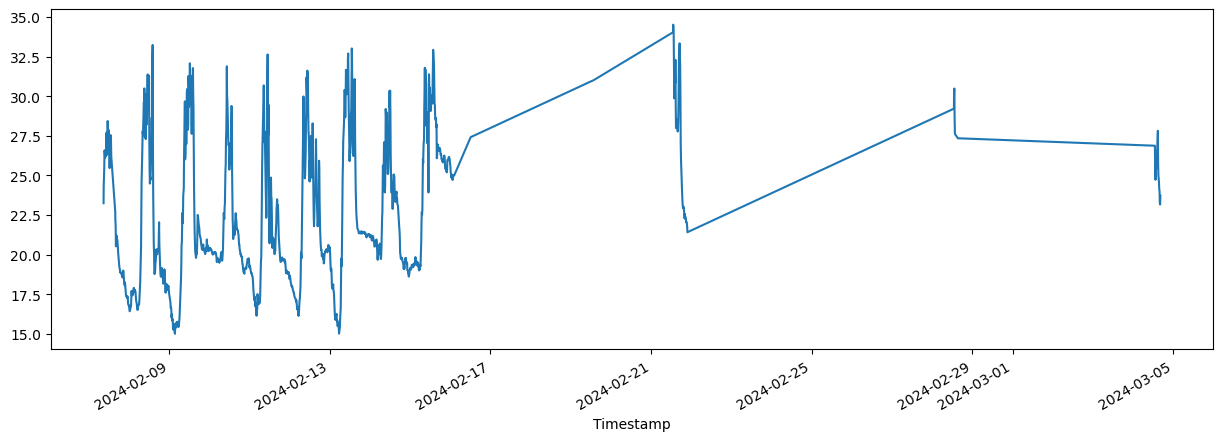

In [ ]:
plt.figure(figsize=(15,5))
Cikajang_met_copy['Temperature'].plot()
Cikajang_met_copy.shape

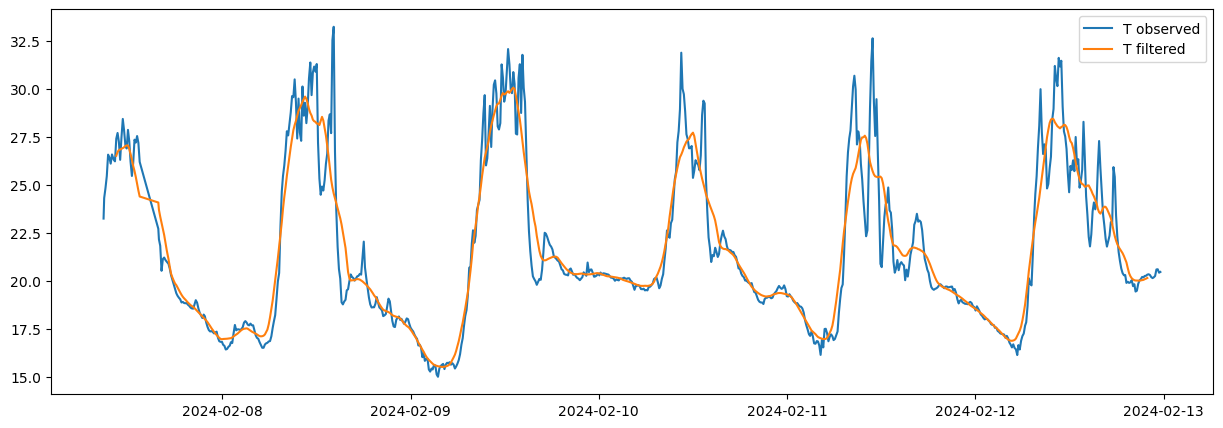

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Cikajang=movaverage(Cikajang_met_copy['Temperature'][:800], 20)
var_filteranual=Cikajang_met_copy['Temperature'][:800]-temp_ma_Cikajang
plt.plot(Cikajang_met_copy['Temperature'][:800])
plt.plot(temp_ma_Cikajang)
plt.legend(['T observed','T filtered'])

495

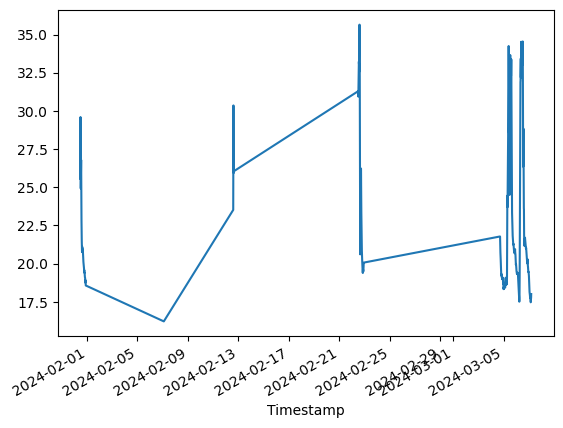

In [ ]:
Sirnajaya_met_copy['Temperature'][:].plot()
len(Sirnajaya_met_copy['Temperature'])

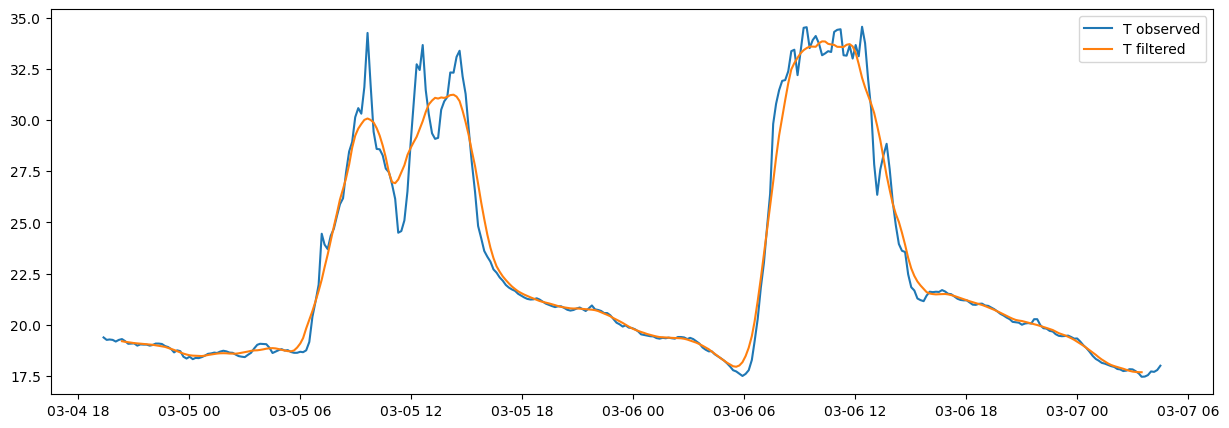

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Sirnajaya=movaverage(Sirnajaya_met_copy['Temperature'][150:], 11)
var_filteranual=Sirnajaya_met_copy['Temperature'][150:]-temp_ma_Sirnajaya
plt.plot(Sirnajaya_met_copy['Temperature'][150:])
plt.plot(temp_ma_Sirnajaya)
plt.legend(['T observed','T filtered'])

<Axes: xlabel='Timestamp'>

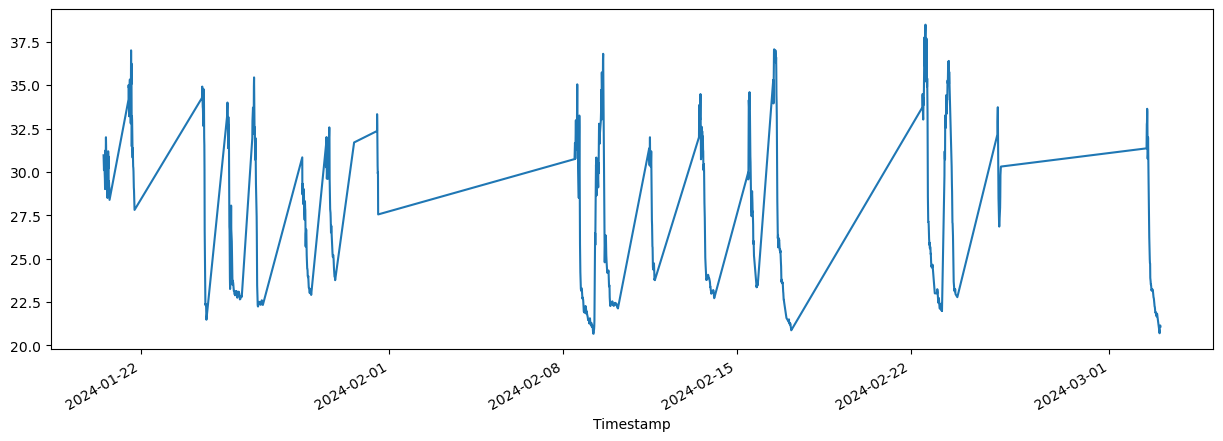

In [ ]:
plt.figure(figsize=(15,5))
Tasik_met_copy['Temperature'].plot()

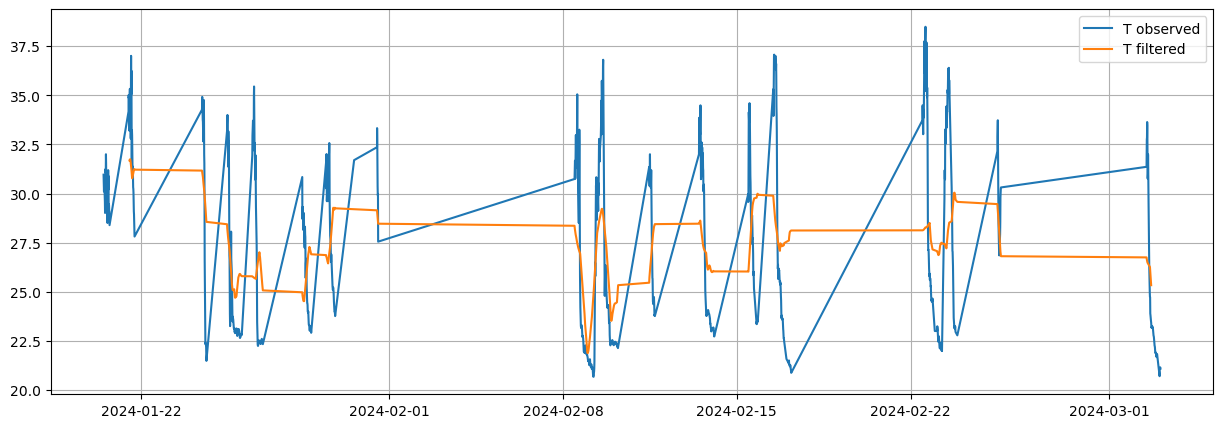

In [ ]:
#fungsi moving average data T , periode 'NF'
plt.figure(figsize=(15,5))
temp_ma_Tasik=movaverage(Tasik_met_copy['Temperature'], 85)
var_filteranual=Tasik_met_copy['Temperature']-temp_ma_Tasik
plt.plot(Tasik_met_copy['Temperature'])
plt.plot(temp_ma_Tasik)
plt.grid()
plt.legend(['T observed','T filtered'])

In [ ]:
Bandung_met_copy.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-27', '2024-01-28', '2024-01-29',
               '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', name='Tanggal', length=8797, freq=None)

#### Humidity

# Correlation Analysis

- temp_ma_Ckajang
- temp_ma_Kertajati
- temp_ma_Penggung
- temp_ma_Wulung
<br><br>
vs
<br><br>
- humidity_ma_Ckajang
- humidity_ma_Kertajati
- humidity_ma_Penggung
- humidity_ma_Wulung

In [ ]:
len(temp_ma_Bandung.dropna()), len(humidity_ma_Bandung.dropna())

(8609, 8609)

In [ ]:
# Step 1: Concatenate the dataframes along the column axis
combined_df_Bandung = pd.concat([temp_ma_Bandung, humidity_ma_Bandung], axis=1)

# Step 2: Remove rows containing NaN values
combined_df_cleaned_Bandung = combined_df_Bandung.dropna()

stats.pearsonr(combined_df_cleaned_Bandung['Tavg'], combined_df_cleaned_Bandung['RH_avg'])[0]

-0.26122722012044086

In [ ]:
stats.pearsonr(temp_ma_Bandung.dropna(), humidity_ma_Bandung.dropna())[0]

-0.26122722012044086

In [ ]:
stats.pearsonr(temp_ma_Bandung[2000:7000].dropna(), humidity_ma_Bandung[2000:7000].dropna())[0]

-0.2133290238995381

In [ ]:
stats.pearsonr(temp_ma_Kertajati.dropna(), humidity_ma_Kertajati.dropna())[0]

-0.7478965874925231

In [ ]:
stats.pearsonr(temp_ma_Penggung.dropna(), humidity_ma_Penggung.dropna())[0]

-0.8232426025579436

In [ ]:
# Step 1: Concatenate the dataframes along the column axis
combined_df = pd.concat([temp_ma_Wulung, humidity_ma_Wulung], axis=1)

# Step 2: Remove rows containing NaN values
combined_df_cleaned = combined_df.dropna()

In [ ]:
len(temp_ma_Wulung), len(humidity_ma_Wulung)

(3683, 3683)

In [ ]:
temp_ma_Wulung.isnull().mean()*100, humidity_ma_Wulung.isnull().mean()*100

(5.267445017648656, 3.4754276405104534)

In [ ]:
combined_df_cleaned.isnull().mean()*100

Tavg      0.0
RH_avg    0.0
dtype: float64

In [ ]:
stats.pearsonr(combined_df_cleaned['Tavg'], combined_df_cleaned['RH_avg'])[0]

-0.10004859934085888

In [ ]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

#
temp_ma_Bandung2=temp_ma_Bandung.dropna().values.reshape(-1, 1)
temp_ma_Wulung2=combined_df_cleaned['Tavg'].values.reshape(-1, 1)

# Fit and transform the DataFrame using MinMaxScaler
normalized_temp_ma_Bandung = pd.DataFrame(scaler.fit_transform(temp_ma_Bandung2), columns=['Tavg'])
#normalized_temp_ma_Kertajati = pd.DataFrame(scaler.fit_transform(temp_ma_Kertajati.dropna()), columns=temp_ma_Kertajati.columns)
#normalized_temp_ma_Penggung = pd.DataFrame(scaler.fit_transform(temp_ma_Penggung.dropna()), columns=temp_ma_Penggung.columns)
normalized_temp_ma_Wulung = pd.DataFrame(scaler.fit_transform(temp_ma_Wulung2), columns=['Tavg'])

In [ ]:
humidity_ma_Bandung2=humidity_ma_Bandung.dropna().values.reshape(-1,1)
humidity_ma_Wulung2=combined_df_cleaned['RH_avg'].values.reshape(-1, 1)

# Fit and transform the DataFrame using MinMaxScaler
normalized_humidity_ma_Bandung = pd.DataFrame(scaler.fit_transform(humidity_ma_Bandung2), columns=['RH_avg'])
#normalized_humidity_ma_Kertajati = pd.DataFrame(scaler.fit_transform(humidity_ma_Kertajati.dropna()), columns=humidity_ma_Kertajati.columns)
#normalized_humidity_ma_Penggung = pd.DataFrame(scaler.fit_transform(humidity_ma_Penggung.dropna()), columns=humidity_ma_Penggung.columns)
normalized_humidity_ma_Wulung = pd.DataFrame(scaler.fit_transform(humidity_ma_Wulung2), columns=['RH_avg'])

In [ ]:
stats.pearsonr(normalized_temp_ma_Bandung.values.ravel(), normalized_humidity_ma_Bandung.values.ravel())[0]

-0.2612272201204409

In [ ]:
stats.pearsonr(normalized_temp_ma_Wulung.values.ravel(), normalized_humidity_ma_Wulung.values.ravel())[0]

-0.10004859934085894

In [ ]:
pathpath='D:/dayatani/data/bmkg data/'
df1 = pd.read_excel(pathpath+'/scrap/Stasiun Geofisika Bandung 2000-2024_scrap2.xlsx')
df2 = pd.read_excel(pathpath+'Stasiun Geofisika Bandung 2000-2024.xlsx')

if df1.equals(df2):
    print("The two DataFrames are equal")
else:
    print("The two DataFrames are not equal")

The two DataFrames are equal


In [ ]:
pd.read_excel(pathpath+'/scrap/Stasiun Geofisika Bandung 2000-2024_scrap.xlsx')[:-20]

Unnamed: 0        ID WMO                      :  96783 Unnamed: 3  \
0            NaN  Nama Stasiun  :  Stasiun Geofisika Bandung        NaN   
1            NaN       Lintang                   :  -6.88356        NaN   
2            NaN         Bujur                  :  107.59733        NaN   
3            NaN       Elevasi                        :  791        NaN   
4            NaN           NaN                           NaN        NaN   
...          ...           ...                           ...        ...   
8863  30-03-2024            21                          32.6       25.9   
8864  31-03-2024          20.6                            32       26.1   
8865  01-04-2024          20.4                          30.4       24.8   
8866  02-04-2024          21.8                          30.4       25.9   
8867  03-04-2024          21.4                          30.8       25.4   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0           NaN        NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN        NaN   
2           NaN        NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN        NaN   
4           NaN        NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
8863         76        8.2        4.2          3        230          0   
8864         73       8888        6.1          2         10          0   
8865         81        0.4        6.8          3        300          0   
8866         81       11.6        5.9          3        250          1   
8867         81        5.6          6          3         90          0   

     Unnamed: 10  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
8863          C   
8864          C   
8865          C   
8866          C   
8867          C   

[8868 rows x 11 columns]

# Comparative Analysis